In [1]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
options(repr.plot.width=7, repr.plot.height=4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
# filtered version of paired positions
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'Absent')

colors = c('A'='gray20', 'C'='gray20', 'G'='gray20', 'U'='gray20', 'Absent'='gray20', 'Purine'='gray20', 'Pyrimidine'='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired'='gray20', 'Bulge'='gray20', 'Mismatched'='gray20')
fills = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8', 'Purine'='#ff8300', 'Pyrimidine'='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B'='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'Absent'='gray60', 'Mismatched'='gray30', 'Paired'='#ffffcc')

# simple codes for reviewer #3
simple_identities = c('A' = 'A', 'C' = 'C', 'G' = 'G', 'U' = 'U', 'Purine' = 'Purine', 'Pyrimidine' = 'Pyrimidine', 
                      'Weak' = 'A/U', 'Strong' = 'G/C', 'Amino' = 'A/C', 'Keto' = 'G/U', 
                      'B' = 'C/G/U', 'D' = 'A/G/U', 'H' = 'A/C/U', 'V' = 'A/C/G', 'Absent' = 'Absent')
colors = c(colors, 'A/U' = 'gray20', 'G/C' = 'gray20', 'A/C' ='gray20', 'G/U' = 'gray20', 'C/G/U' = 'gray50', 'A/G/U' = 'gray50', 'A/C/U' = 'gray50', 'A/C/G' = 'gray50')
fills = c(fills, 'A/U' = '#b3de69', 'G/C' = '#fb72b2', 'A/C' ='#c1764a', 'G/U' = '#b26cbd', 'C/G/U' = '#e5c494', 'A/G/U' = '#ccebd5', 'A/C/U' = '#ffa79d', 'A/C/G' = '#a6cdea')

In [104]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(isotype %in% isotypes)

In [94]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-specific-freqs.RData')

## Quality set stats

In [4]:
df = identities %>% group_by(isotype, clade, quality) %>% 
  summarize(count=n()) %>%
  ungroup()
df = rbind(df, cbind(expand.grid(isotype=unique(df$isotype), clade=unique(df$clade), quality=unique(df$quality)), count=0))
df %>% group_by(isotype, clade, quality) %>% 
  summarize(count=sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(rev(quality)) %>%
  summarize(count=paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade 
 Ala 
 Arg 
 Asn 
 Asp 
 Cys 
 Gln 
 Glu 
 Gly 
 His 
 Ile 
 iMet 
 Leu 
 Lys 
 Met 
 Phe 
 Pro 
 Ser 
 Thr 
 Trp 
 Tyr 
 Val 
 
 
 
 
 Fungi 
 766 (13) 
 824 (54) 
 413 (5) 
 529 (0) 
 198 (5) 
 434 (2) 
 551 (24) 
 848 (7) 
 213 (4) 
 575 (25) 
 185 (0) 
 855 (11) 
 737 (105) 
 213 (31) 
 413 (0) 
 519 (0) 
 864 (7) 
 698 (9) 
 220 (3) 
 217 (89) 
 784 (6) 
 
 
 Insecta 
 281 (30) 
 333 (24) 
 129 (12) 
 194 (24) 
 108 (7) 
 184 (15) 
 274 (26) 
 325 (27) 
 94 (21) 
 181 (17) 
 86 (10) 
 327 (27) 
 280 (26) 
 98 (9) 
 122 (11) 
 242 (32) 
 283 (22) 
 268 (16) 
 103 (11) 
 145 (23) 
 253 (65) 
 
 
 Mammalia 
 2347 (657) 
 1226 (13) 
 673 (6) 
 503 (8) 
 1141 (15) 
 647 (0) 
 920 (1) 
 1240 (3) 
 368 (0) 
 692 (31) 
 405 (0) 
 1144 (1) 
 1448 (0) 
 379 (0) 
 473 (2) 
 777 (1) 
 1185 (6) 
 876 (1) 
 337 (0) 
 495 (6) 
 1588 (12) 
 
 
 Nematoda 
 382 (0) 
 411 (15) 
 200 (0) 
 241 (0) 
 128 (0) 
 243 (0) 
 407 (0) 
 449 (0) 
 162 (0) 
 244 (18) 
 96 (0) 
 419 (4) 
 435 (3) 
 112 (0) 
 151 (0) 
 414 (0) 
 370 (57) 
 353 (0) 
 124 (0) 
 172 (1) 
 316 (7) 
 
 
 Spermatophyta 
 767 (4) 
 696 (23) 
 391 (9) 
 478 (14) 
 256 (4) 
 368 (0) 
 596 (3) 
 804 (7) 
 217 (1) 
 510 (1) 
 204 (0) 
 832 (18) 
 639 (7) 
 262 (15) 
 314 (17) 
 679 (9) 
 807 (26) 
 458 (27) 
 251 (21) 
 342 (4) 
 625 (2) 
 
 
 Vertebrata 
 841 (0) 
 1158 (1) 
 1075 (7) 
 483 (3) 
 452 (10) 
 709 (0) 
 926 (0) 
 1117 (3) 
 379 (3) 
 678 (0) 
 450 (0) 
 1580 (2) 
 1637 (0) 
 548 (0) 
 421 (8) 
 946 (3) 
 1717 (16) 
 906 (13) 
 280 (0) 
 526 (8) 
 1025 (7)

### Restricted set stats

In [5]:
df = identities %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", clade = "Total", count = sum(count)) %>% ungroup)

df %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade 
 Ala 
 Arg 
 Asn 
 Asp 
 Cys 
 Gln 
 Glu 
 Gly 
 His 
 Ile 
 iMet 
 Leu 
 Lys 
 Met 
 Phe 
 Pro 
 Ser 
 Thr 
 Trp 
 Tyr 
 Val 
 Total 
 
 
 
 
 Fungi 
 259 (520) 
 394 (484) 
 144 (274) 
 88 (441) 
 108 (95) 
 197 (239) 
 148 (427) 
 235 (620) 
 83 (134) 
 172 (428) 
 76 (109) 
 379 (487) 
 224 (618) 
 116 (128) 
 139 (274) 
 190 (329) 
 383 (488) 
 316 (391) 
 87 (136) 
 110 (196) 
 319 (471) 
 4167 (7289) 
 
 
 Insecta 
 91 (220) 
 160 (197) 
 32 (109) 
 36 (182) 
 53 (62) 
 89 (110) 
 75 (225) 
 84 (268) 
 23 (92) 
 83 (115) 
 28 (68) 
 154 (200) 
 68 (238) 
 40 (67) 
 33 (100) 
 87 (187) 
 131 (174) 
 109 (175) 
 36 (78) 
 103 (65) 
 117 (201) 
 1632 (3133) 
 
 
 Mammalia 
 982 (2022) 
 867 (372) 
 287 (392) 
 158 (353) 
 593 (563) 
 350 (297) 
 465 (456) 
 515 (728) 
 76 (292) 
 362 (361) 
 88 (317) 
 714 (431) 
 739 (709) 
 275 (104) 
 228 (247) 
 220 (558) 
 688 (503) 
 670 (207) 
 234 (103) 
 307 (194) 
 572 (1028) 
 9390 (10237) 
 
 
 Nematoda 
 95 (287) 
 142 (284) 
 36 (164) 
 30 (211) 
 26 (102) 
 66 (177) 
 81 (326) 
 99 (350) 
 28 (134) 
 61 (201) 
 18 (78) 
 152 (271) 
 71 (367) 
 28 (84) 
 35 (116) 
 86 (328) 
 151 (276) 
 113 (240) 
 29 (95) 
 46 (127) 
 108 (215) 
 1501 (4433) 
 
 
 Spermatophyta 
 201 (570) 
 321 (398) 
 166 (234) 
 107 (385) 
 107 (153) 
 160 (208) 
 155 (444) 
 180 (631) 
 39 (179) 
 178 (333) 
 45 (159) 
 294 (556) 
 213 (433) 
 85 (192) 
 82 (249) 
 181 (507) 
 302 (531) 
 241 (244) 
 69 (203) 
 142 (204) 
 211 (416) 
 3479 (7229) 
 
 
 Vertebrata 
 306 (535) 
 371 (788) 
 187 (895) 
 75 (411) 
 186 (276) 
 216 (493) 
 277 (649) 
 250 (870) 
 85 (297) 
 211 (467) 
 71 (379) 
 458 (1124) 
 294 (1343) 
 139 (409) 
 179 (250) 
 185 (764) 
 415 (1318) 
 370 (549) 
 134 (146) 
 187 (347) 
 301 (731) 
 4897 (13041) 
 
 
 Total 
 1934 (4154) 
 2255 (2523) 
 852 (2068) 
 494 (1983) 
 1073 (1251) 
 1078 (1524) 
 1201 (2527) 
 1363 (3467) 
 334 (1128) 
 1067 (1905) 
 326 (1110) 
 2151 (3069) 
 1609 (3708) 
 683 (984) 
 696 (1236) 
 949 (2673) 
 2070 (3290) 
 1819 (1806) 
 589 (761) 
 895 (1133) 
 1628 (3062) 
 25066 (45362)

In [32]:
df = identities %>% group_by(isotype, species_long, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 species_long = unique(df$species_long),
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, species_long, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", species_long = clade[1], count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", species_long = "", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", species_long = "", clade = "Total", count = sum(count)) %>% ungroup)

df = df %>% group_by(isotype, clade, species_long, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade, species_long) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  na.omit

df %>% head %>% kable %>% paste0(collapse = '\n') %>% display_markdown

write.table(df, file = 'table-s2.tsv', sep = '\t', quote = FALSE, row.names = FALSE)

|clade |species_long                 |Ala    |Arg    |Asn   |Asp    |Cys   |Gln   |Glu   |Gly    |His   |Ile   |iMet  |Leu   |Lys    |Met   |Phe   |Pro   |Ser    |Thr   |Trp   |Tyr   |Val   |Total     |
|:-----|:----------------------------|:------|:------|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:-----|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:-----|:-----|:---------|
|Fungi |Aspergillus fumigatus Af293  |6 (7)  |9 (7)  |4 (1) |2 (7)  |3 (0) |4 (4) |2 (0) |3 (12) |1 (1) |3 (5) |1 (3) |6 (7) |2 (7)  |3 (1) |3 (2) |3 (4) |5 (7)  |6 (5) |1 (2) |1 (4) |6 (4) |74 (90)   |
|Fungi |Aspergillus nidulans FGSC A4 |4 (9)  |8 (8)  |5 (1) |1 (7)  |1 (2) |4 (3) |2 (5) |4 (11) |2 (3) |5 (3) |1 (2) |6 (5) |2 (8)  |2 (1) |2 (3) |8 (2) |6 (6)  |5 (5) |1 (2) |5 (1) |4 (7) |78 (94)   |
|Fungi |Aspergillus oryzae RIB40     |6 (10) |9 (12) |4 (4) |3 (10) |3 (0) |7 (4) |5 (8) |4 (15) |4 (1) |7 (5) |2 (0) |3 (3) |4 (10) |2 (1) |2 (5) |5 (5) |11 (6) |5 (9) |1 (3) |8 (2) |5 (8) |100 (121) |
|Fungi |Botrytis cinerea B05.10      |2 (7)  |12 (5) |5 (1) |0 (0)  |4 (0) |4 (2) |3 (2) |1 (0)  |0 (0) |3 (5) |1 (3) |7 (6) |8 (5)  |3 (1) |4 (3) |2 (9) |6 (8)  |6 (3) |1 (4) |1 (0) |3 (8) |76 (72)   |
|Fungi |Candida albicans WO-1        |3 (5)  |4 (5)  |2 (1) |1 (5)  |2 (0) |2 (0) |1 (0) |3 (5)  |0 (0) |3 (4) |1 (1) |6 (6) |4 (3)  |1 (1) |0 (0) |1 (2) |5 (5)  |4 (3) |1 (1) |3 (1) |5 (3) |52 (51)   |
|Fungi |Candida dubliniensis CD36    |3 (5)  |4 (5)  |4 (0) |1 (5)  |2 (0) |1 (0) |1 (0) |4 (5)  |0 (0) |2 (5) |1 (1) |5 (6) |4 (4)  |1 (1) |0 (0) |1 (4) |4 (5)  |4 (4) |1 (1) |4 (0) |5 (5) |52 (56)   |

## Consensus elements by cutoff table

In [7]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [8]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_ac_freqs %>%
    group_by(isotype, clade, positions, variable) %>%
    summarize(count=sum(value), freq=sum(value)/sum(total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff=as.character(cutoff)) %>%
    select(isotype, clade, positions, variable, freq, cutoff) %>%
    group_by(isotype, clade, positions) %>%
    arrange(code_groups[variable], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}
cutoff_freqs = cutoff_freqs %>% 
  group_by(positions, cutoff) %>%
  summarize(identity = get_consensus_IDE(positions, variable)) %>%
  select(positions, cutoff, identity) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, identity)

In [47]:
cutoff_freqs %>% filter(`0.5` != "N/A")

positions        0.5        0.6        0.7        0.8        0.9       0.95
1      X1.72     Paired     Paired     Paired     Paired        N/A        N/A
2     X10.25     Paired     Paired     Paired     Paired     Paired     Paired
3     X11.24     Paired     Paired     Paired     Paired     Paired     Paired
4        X14          A          A          A          A          A          A
5        X18          V          V          V          V          V          V
6        X19          G          G          G          G          G          G
7     X19.56         GC         GC         GC         GC         GC        N/A
8      X2.71     Paired     Paired     Paired     Paired     Paired        N/A
9     X28.42     Paired     Paired     Paired     Paired     Paired        N/A
10    X29.41     Paired     Paired     Paired     Paired     Paired        N/A
11    X30.40     Paired     Paired     Paired     Paired        N/A        N/A
12       X32 Pyrimidine Pyrimidine Pyrimidine Pyrimidine Pyrimidine          H
13       X33 Pyrimidine Pyrimidine Pyrimidine Pyrimidine Pyrimidine          B
14       X37          V          V          V          V          V        N/A
15       X38          H          H          H          H          H        N/A
16       X46     Purine     Purine     Purine     Purine          V        N/A
17       X48          H          H          H          H          H        N/A
18    X53.61  KetoAmino  KetoAmino  KetoAmino  KetoAmino     Paired        N/A
19       X54          H          H          H          H          H          H
20       X55 Pyrimidine Pyrimidine Pyrimidine Pyrimidine Pyrimidine Pyrimidine
21       X56          C          C          C          C          C          B
22       X57     Purine     Purine     Purine     Purine     Purine     Purine
23       X58       Weak       Weak       Weak       Weak          D        N/A
24     X7.66     Paired     Paired     Paired     Paired     Paired        N/A
25        X8          U          U          U          U          U          U
26     X8.14         UA         UA         UA         UA         UA        N/A
   0.99   1
1   N/A N/A
2   N/A N/A
3   N/A N/A
4   N/A N/A
5   N/A N/A
6   N/A N/A
7   N/A N/A
8   N/A N/A
9   N/A N/A
10  N/A N/A
11  N/A N/A
12  N/A N/A
13  N/A N/A
14  N/A N/A
15  N/A N/A
16  N/A N/A
17  N/A N/A
18  N/A N/A
19  N/A N/A
20  N/A N/A
21  N/A N/A
22  N/A N/A
23  N/A N/A
24  N/A N/A
25  N/A N/A
26  N/A N/A

# Isotype-specific heatmaps

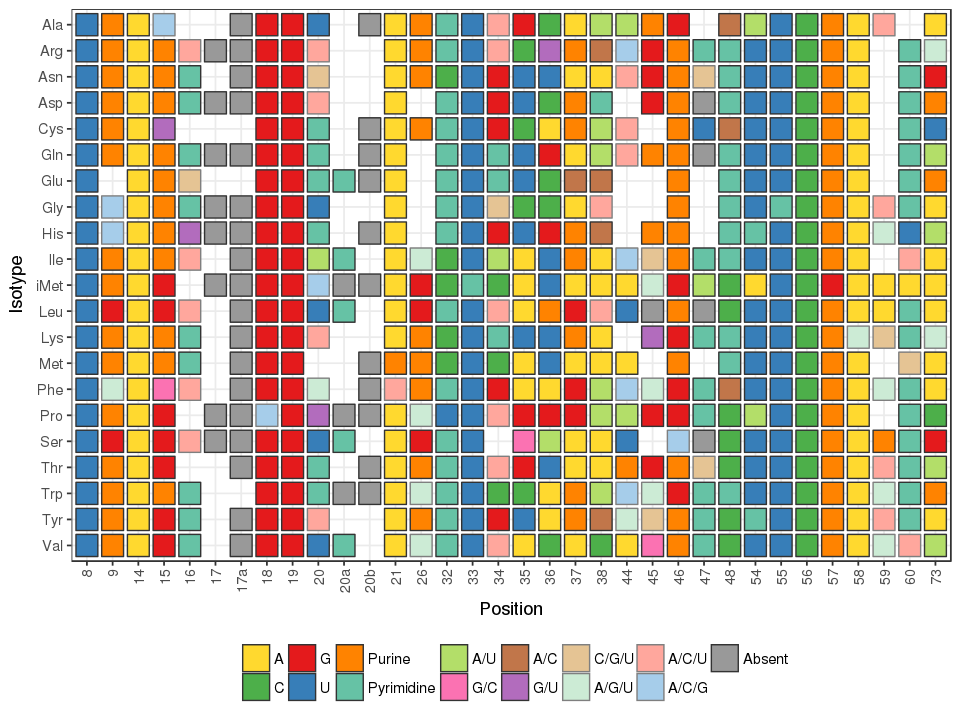

In [92]:
options(repr.plot.width=8, repr.plot.height=6)
isotype_specific %>% 
  filter(!str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.4) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    xlab('Position') + ylab('Isotype')

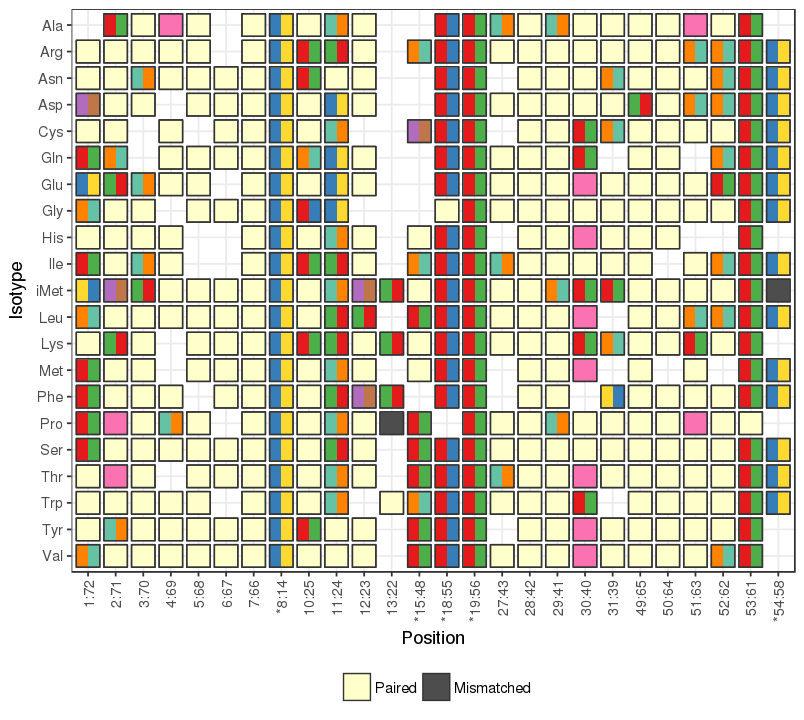

In [91]:
options(repr.plot.width=6.7, repr.plot.height=6)
get_5prime = Vectorize(function(identity) c("GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])
get_3prime = Vectorize(function(identity) c("GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])

isotype_specific %>% 
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) +
    scale_x_discrete(labels=paired_positions, drop=FALSE) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),          
      legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

# Clade-isotype-specific heatmaps

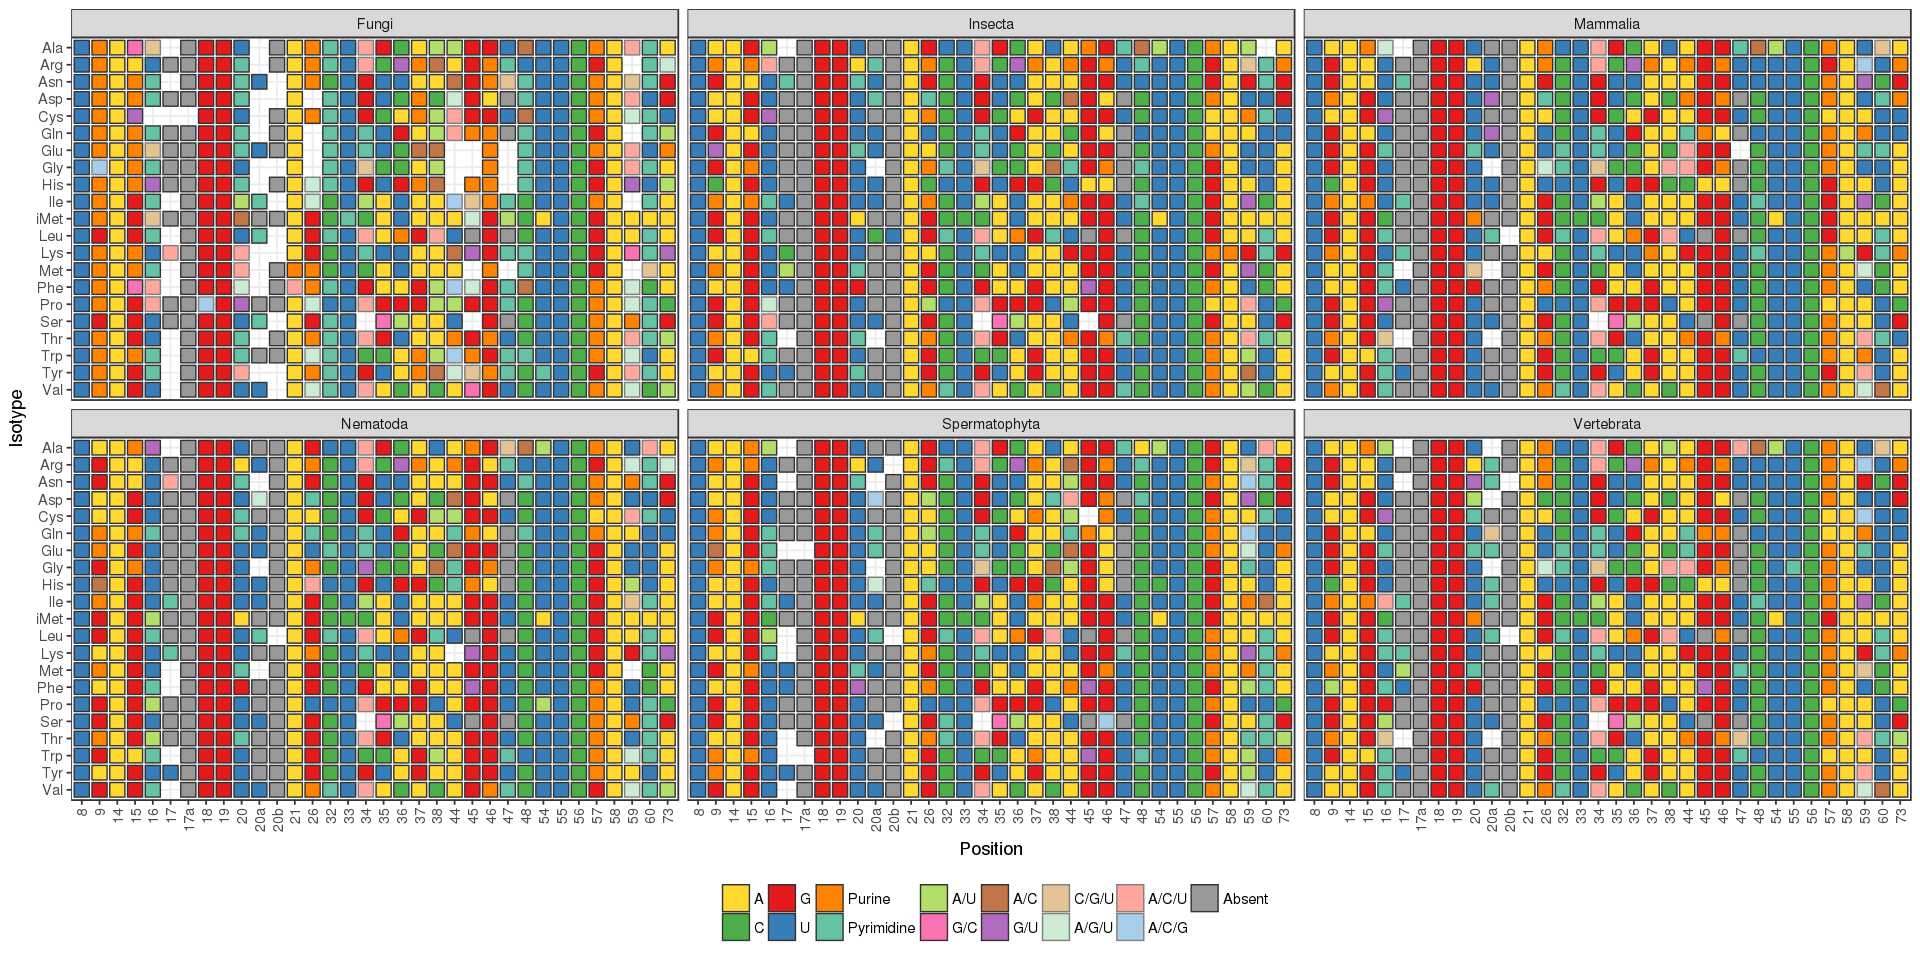

In [12]:
options(repr.plot.width=16, repr.plot.height=8)
clade_isotype_specific %>%
  filter(!(str_detect(positions, '\\.')) & positions %in% names(single_positions)) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ungroup() %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

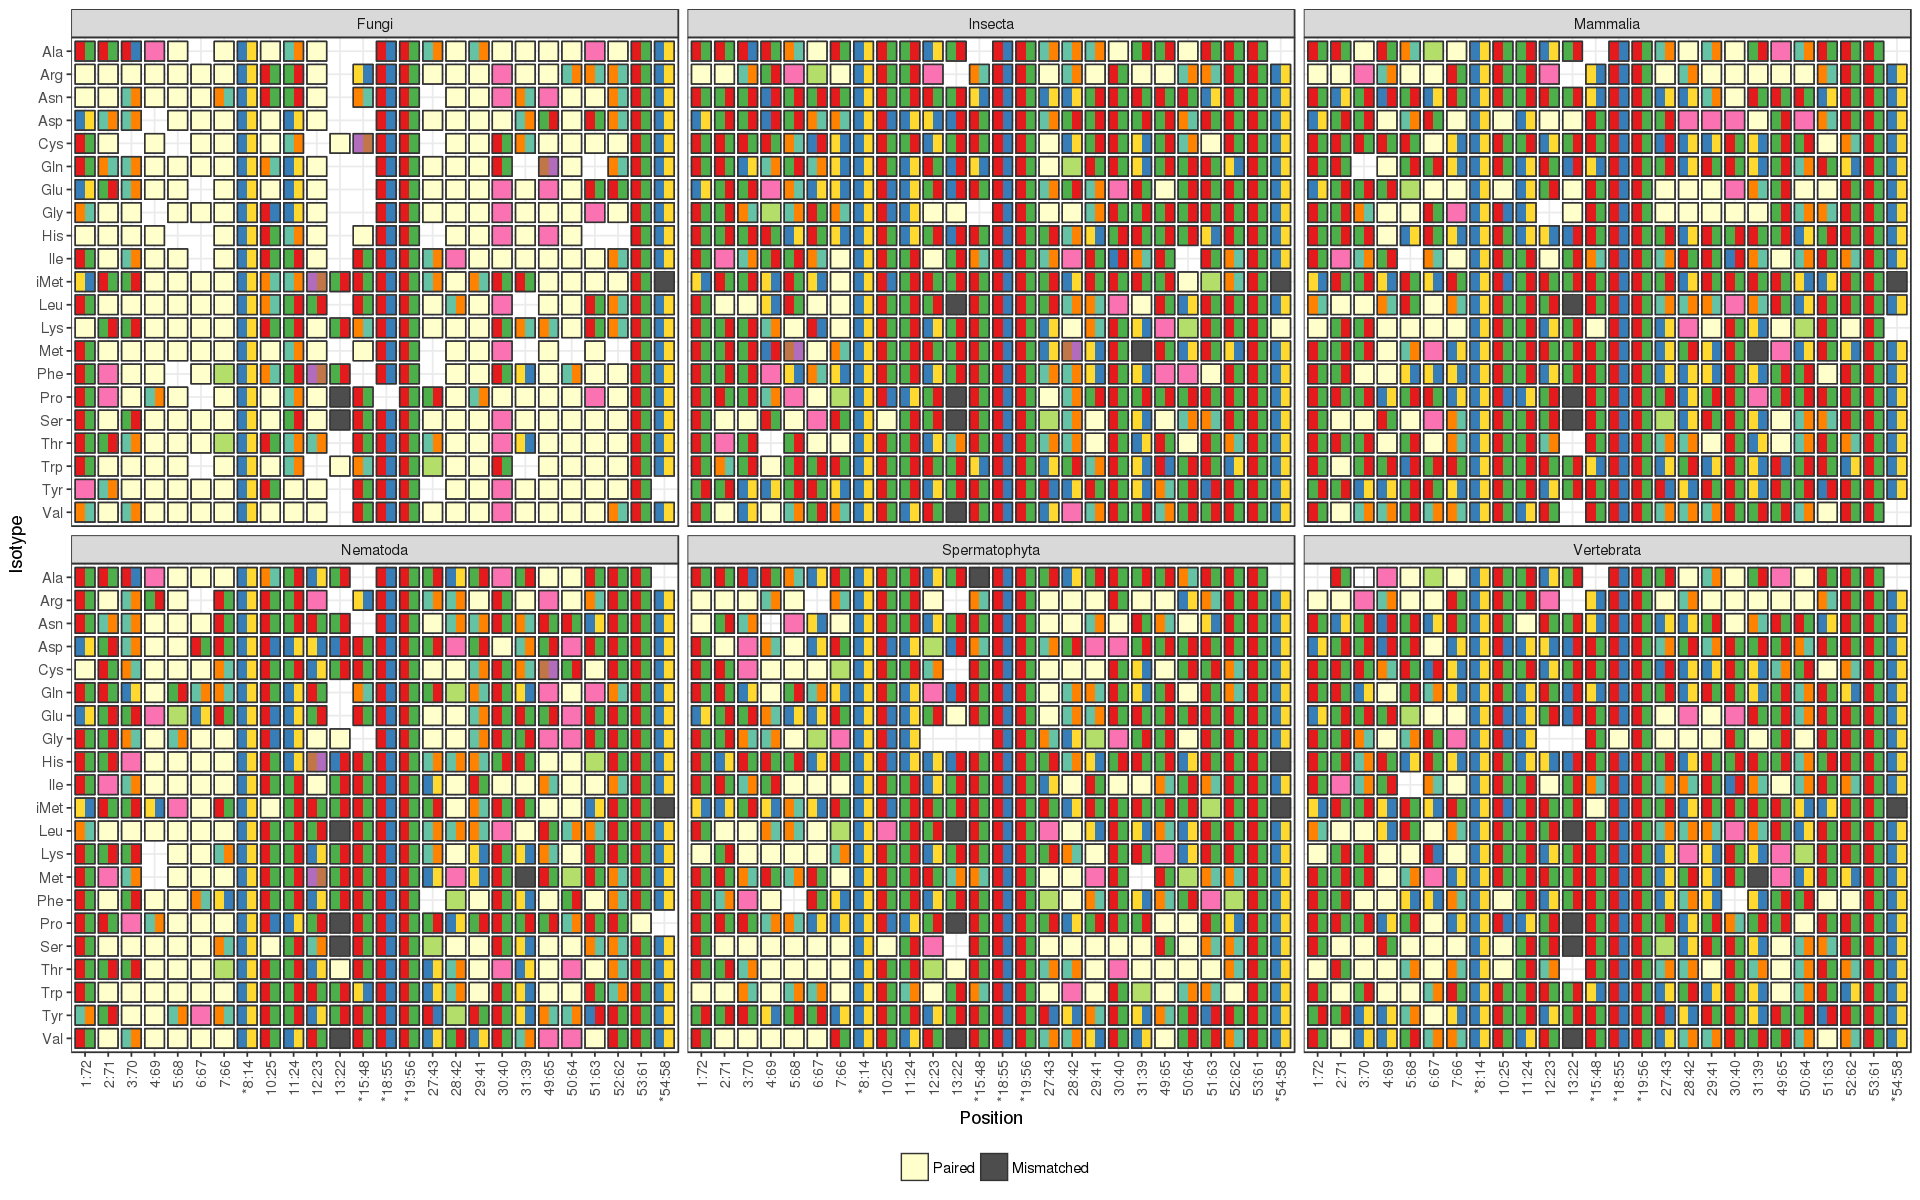

In [13]:
options(repr.plot.width=16, repr.plot.height=10)
clade_isotype_specific %>%
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=paired_positions, drop=FALSE) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    xlab('Position') + ylab('Isotype') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE)

# tRNA features

## Stem and loop lengths

As it stands, this analysis is a bit problematic. A shorter D-stem (e.g., 13:22 mismatch) necessarily means a longer D-loop, yet this is not reflected in the plot. And it's codified directly in `euk-tRNAs` for the D-loop in Leu and Ser specifically.

We need to go through each tRNA, and analyze them on an individual basis with insertions in mind. 

In addition, introns need to be reworked. A distribution of intron lengths would work best for each clade and isotype.

In [108]:
match_identities = c("A:U", "U:A", "G:U", "U:G", "C:G", "G:C")
mismatch_identities = c("A:G", "G:A", "A:C", "C:A", "C:U", "U:C", "A:A", "C:C", "U:U", "G:G", "-:-", "A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U")
stemloop = identities %>% 
  rowwise() %>%
  mutate(Dstem=sum(c(X10.25 %in% match_identities, X11.24 != '-:-', X12.23 != '-:-', X13.22 %in% match_identities)),
         Cstem=sum(c(X27.43 %in% match_identities, X28.42 != '-:-', X29.41 != '-:-', X30.40 != '-:-', X31.39 %in% match_identities)),
         TPCstem=sum(c(X49.65 %in% match_identities, X50.64 != '-:-', X51.63 != '-:-', X52.62 != '-:-', X53.61 %in% match_identities))) %>%
  select(isotype, intron, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Intron=mean(intron), Dstem=mean(Dstem), Dloop=mean(D.loop), Cstem=mean(Cstem), Cloop=mean(AC.loop), TPCloop=mean(TPC.loop), TPCstem=mean(TPCstem), Varm=mean(V.arm)) %>%
  gather(region, size, -isotype) %>%
  mutate(region=factor(region))

stemloop = rbind(stemloop, cbind(expand.grid(isotype=levels(stemloop$isotype), region=levels(stemloop$region)), size=0))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

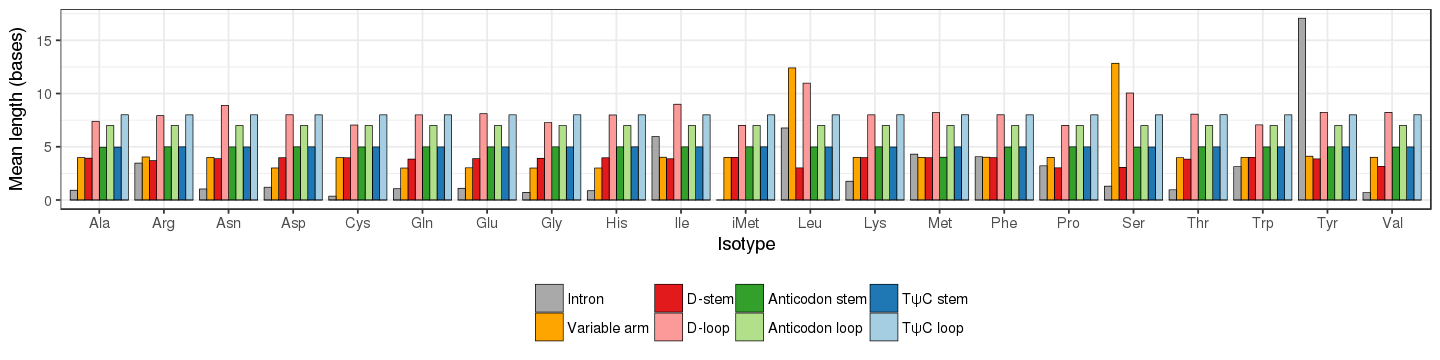

In [109]:
options(repr.plot.width=12, repr.plot.height=3)
stemloop %>% filter(!(isotype %in% c("Sup", "SeC"))) %>%
  mutate(region = revalue(region, c("Intron" = "Intron", "Varm" = "Variable arm", "Dstem" = "D-stem", "Dloop" = "D-loop", "Cstem" = "Anticodon stem", "Cloop" = "Anticodon loop", "TPCstem" = "TψC stem", "TPCloop" = "TψC loop"))) %>%
  mutate(region = factor(region, c("Intron", "Variable arm", "D-stem", "D-loop", "Anticodon stem", "Anticodon loop", "TψC stem", "TψC loop"))) %>%
  ggplot() + geom_bar(aes(x=isotype, y=size, fill=region), stat='identity', size=0.2, color='black', position='dodge') +
    scale_fill_manual(values=c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) + 
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("Mean length (bases)") +
    guides(fill=guide_legend(title=NULL))

In [ ]:
stemloop = identities %>% 
  rowwise() %>%
  mutate(Dstem=sum(c(X10.25 != '-:-', X11.24 != '-:-', X12.23 != '-:-', ifelse(isotype %in% c("Leu", "Ser", "Tyr"), FALSE, X13.22 != '-:-'))),
         Cstem=sum(c(X27.43 != '-:-', X28.42 != '-:-', X29.41 != '-:-', X30.40 != '-:-', X31.39 != '-:-')),
         TPCstem=sum(c(X49.65 != '-:-', X50.64 != '-:-', X51.63 != '-:-', X52.62 != '-:-', X53.61 != '-:-'))) %>%
  select(isotype, clade, intron, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype, clade) %>%
  summarize(Intron=mean(intron), Dstem=mean(Dstem), Dloop=mean(D.loop), Cstem=mean(Cstem), Cloop=mean(AC.loop), TPCloop=mean(TPC.loop), TPCstem=mean(TPCstem), Varm=mean(V.arm)) %>%
  gather(region, size, -isotype, -clade) %>%
  mutate(region=factor(region))

In [101]:
stemloop %>% head

Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is not a multiple of replacement length”Warning message in slice[col_idx] <- levels(df[[col_idx]])[df[[row, col_idx]]]:
“number of items to replace is n

1. 1. Ala
2. Ala
3. Ala
4. Ala
5. Ala
6. Ala
7. Arg
8. Arg
9. Arg
10. Arg
11. Arg
12. Arg
13. Asn
14. Asn
15. Asn
16. Asn
17. Asn
18. Asn
19. Asp
20. Asp
21. Asp
22. Asp
23. Asp
24. Asp
25. Cys
26. Cys
27. Cys
28. Cys
29. Cys
30. Cys
31. Gln
32. Gln
33. Gln
34. Gln
35. Gln
36. Gln
37. Glu
38. Glu
39. Glu
40. Glu
41. Glu
42. Glu
43. Gly
44. Gly
45. Gly
46. Gly
47. Gly
48. Gly
49. His
50. His
51. His
52. His
53. His
54. His
55. Ile
56. Ile
57. Ile
58. Ile
59. Ile
60. Ile
61. iMet
62. iMet
63. iMet
64. iMet
65. iMet
66. iMet
67. Leu
68. Leu
69. Leu
70. Leu
71. Leu
72. Leu
73. Lys
74. Lys
75. Lys
76. Lys
77. Lys
78. Lys
79. Met
80. Met
81. Met
82. Met
83. Met
84. Met
85. Phe
86. Phe
87. Phe
88. Phe
89. Phe
90. Phe
91. Pro
92. Pro
93. Pro
94. Pro
95. Pro
96. Pro
97. Ser
98. Ser
99. Ser
100. Ser
101. Ser
102. Ser
103. Thr
104. Thr
105. Thr
106. Thr
107. Thr
108. Thr
109. Trp
110. Trp
111. Trp
112. Trp
113. Trp
114. Trp
115. Tyr
116. Tyr
117. Tyr
118. Tyr
119. Tyr
120. Tyr
121. Val
122. Val
123. Val
124. Val
125. Val
126. Val
127. Ala
128. Ala
129. Ala
130. Ala
131. Ala
132. Ala
133. Arg
134. Arg
135. Arg
136. Arg
137. Arg
138. Arg
139. Asn
140. Asn
141. Asn
142. Asn
143. Asn
144. Asn
145. Asp
146. Asp
147. Asp
148. Asp
149. Asp
150. Asp
151. Cys
152. Cys
153. Cys
154. Cys
155. Cys
156. Cys
157. Gln
158. Gln
159. Gln
160. Gln
161. Gln
162. Gln
163. Glu
164. Glu
165. Glu
166. Glu
167. Glu
168. Glu
169. Gly
170. Gly
171. Gly
172. Gly
173. Gly
174. Gly
175. His
176. His
177. His
178. His
179. His
180. His
181. Ile
182. Ile
183. Ile
184. Ile
185. Ile
186. Ile
187. iMet
188. iMet
189. iMet
190. iMet
191. iMet
192. iMet
193. Leu
194. Leu
195. Leu
196. Leu
197. Leu
198. Leu
199. Lys
200. Lys
201. Lys
202. Lys
203. Lys
204. Lys
205. Met
206. Met
207. Met
208. Met
209. Met
210. Met
211. Phe
212. Phe
213. Phe
214. Phe
215. Phe
216. Phe
217. Pro
218. Pro
219. Pro
220. Pro
221. Pro
222. Pro
223. Ser
224. Ser
225. Ser
226. Ser
227. Ser
228. Ser
229. Thr
230. Thr
231. Thr
232. Thr
233. Thr
234. Thr
235. Trp
236. Trp
237. Trp
238. Trp
239. Trp
240. Trp
241. Tyr
242. Tyr
243. Tyr
244. Tyr
245. Tyr
246. Tyr
247. Val
248. Val
249. Val
250. Val
251. Val
252. Val
253. Ala
254. Ala
255. Ala
256. Ala
257. Ala
258. Ala
259. Arg
260. Arg
261. Arg
262. Arg
263. Arg
264. Arg
265. Asn
266. Asn
267. Asn
268. Asn
269. Asn
270. Asn
271. Asp
272. Asp
273. Asp
274. Asp
275. Asp
276. Asp
277. Cys
278. Cys
279. Cys
280. Cys
281. Cys
282. Cys
283. Gln
284. Gln
285. Gln
286. Gln
287. Gln
288. Gln
289. Glu
290. Glu
291. Glu
292. Glu
293. Glu
294. Glu
295. Gly
296. Gly
297. Gly
298. Gly
299. Gly
300. Gly
301. His
302. His
303. His
304. His
305. His
306. His
307. Ile
308. Ile
309. Ile
310. Ile
311. Ile
312. Ile
313. iMet
314. iMet
315. iMet
316. iMet
317. iMet
318. iMet
319. Leu
320. Leu
321. Leu
322. Leu
323. Leu
324. Leu
325. Lys
326. Lys
327. Lys
328. Lys
329. Lys
330. Lys
331. Met
332. Met
333. Met
334. Met
335. Met
336. Met
337. Phe
338. Phe
339. Phe
340. Phe
341. Phe
342. Phe
343. Pro
344. Pro
345. Pro
346. Pro
347. Pro
348. Pro
349. Ser
350. Ser
351. Ser
352. Ser
353. Ser
354. Ser
355. Thr
356. Thr
357. Thr
358. Thr
359. Thr
360. Thr
361. Trp
362. Trp
363. Trp
364. Trp
365. Trp
366. Trp
367. Tyr
368. Tyr
369. Tyr
370. Tyr
371. Tyr
372. Tyr
373. Val
374. Val
375. Val
376. Val
377. Val
378. Val
379. Ala
380. Ala
381. Ala
382. Ala
383. Ala
384. Ala
385. Arg
386. Arg
387. Arg
388. Arg
389. Arg
390. Arg
391. Asn
392. Asn
393. Asn
394. Asn
395. Asn
396. Asn
397. Asp
398. Asp
399. Asp
400. Asp
401. Asp
402. Asp
403. Cys
404. Cys
405. Cys
406. Cys
407. Cys
408. Cys
409. Gln
410. Gln
411. Gln
412. Gln
413. Gln
414. Gln
415. Glu
416. Glu
417. Glu
418. Glu
419. Glu
420. Glu
421. Gly
422. Gly
423. Gly
424. Gly
425. Gly
426. Gly
427. His
428. His
429. His
430. His
431. His
432. His
433. Ile
434. Ile
435. Ile
436. Ile
437. Ile
438. Ile
439. iMet
440. iMet
441. iMet
442. iMet
443. iMet
444. iMet
445. Leu
446. Leu
447. Leu
448. Leu
449. Leu
450. Leu
451. Lys
452. Lys
453. Lys
454. Lys
455. Lys
456. Lys
457. Met
458. Met
459. Met
460. Met
461. Met
462. Met
463. Phe
464. Phe
465. Phe
466. Phe
467. Phe
468. Phe
469. Pro
470. Pro
471. Pro
472. Pro
473. Pro
474. Pro
475. Ser
476. Ser
477. Ser
478. Ser
479. Ser
480. Ser
481. Thr
482. Thr
483. Thr
484. Thr
485. Thr
486. Thr
487. Trp
488. Trp
489. Trp
490. Trp
491. Trp
492. Trp
493. Tyr
494. Tyr
495. Tyr
496. Tyr
497. Tyr
498. Tyr
499. Val
500. Val
501. Val
502. Val
503. Val
504. Val
505. Ala
506. Ala
507. Ala
508. Ala
509. Ala
510. Ala
511. Arg
512. Arg
513. Arg
514. Arg
515. Arg
516. Arg
517. Asn
518. Asn
519. Asn
520. Asn
521. Asn
522. Asn
523. Asp
524. Asp
525. Asp
526. Asp
527. Asp
528. Asp
529. Cys
530. Cys
531. Cys
532. Cys
533. Cys
534. Cys
535. Gln
536. Gln
537. Gln
538. Gln
539. Gln
540. Gln
541. Glu
542. Glu
543. Glu
544. Glu
545. Glu
546. Glu
547. Gly
548. Gly
549. Gly
550. Gly
551. Gly
552. Gly
553. His
554. His
555. His
556. His
557. His
558. His
559. Ile
560. Ile
561. Ile
562. Ile
563. Ile
564. Ile
565. iMet
566. iMet
567. iMet
568. iMet
569. iMet
570. iMet
571. Leu
572. Leu
573. Leu
574. Leu
575. Leu
576. Leu
577. Lys
578. Lys
579. Lys
580. Lys
581. Lys
582. Lys
583. Met
584. Met
585. Met
586. Met
587. Met
588. Met
589. Phe
590. Phe
591. Phe
592. Phe
593. Phe
594. Phe
595. Pro
596. Pro
597. Pro
598. Pro
599. Pro
600. Pro
601. Ser
602. Ser
603. Ser
604. Ser
605. Ser
606. Ser
607. Thr
608. Thr
609. Thr
610. Thr
611. Thr
612. Thr
613. Trp
614. Trp
615. Trp
616. Trp
617. Trp
618. Trp
619. Tyr
620. Tyr
621. Tyr
622. Tyr
623. Tyr
624. Tyr
625. Val
626. Val
627. Val
628. Val
629. Val
630. Val
631. Ala
632. Ala
633. Ala
634. Ala
635. Ala
636. Ala
637. Arg
638. Arg
639. Arg
640. Arg
641. Arg
642. Arg
643. Asn
644. Asn
645. Asn
646. Asn
647. Asn
648. Asn
649. Asp
650. Asp
651. Asp
652. Asp
653. Asp
654. Asp
655. Cys
656. Cys
657. Cys
658. Cys
659. Cys
660. Cys
661. Gln
662. Gln
663. Gln
664. Gln
665. Gln
666. Gln
667. Glu
668. Glu
669. Glu
670. Glu
671. Glu
672. Glu
673. Gly
674. Gly
675. Gly
676. Gly
677. Gly
678. Gly
679. His
680. His
681. His
682. His
683. His
684. His
685. Ile
686. Ile
687. Ile
688. Ile
689. Ile
690. Ile
691. iMet
692. iMet
693. iMet
694. iMet
695. iMet
696. iMet
697. Leu
698. Leu
699. Leu
700. Leu
701. Leu
702. Leu
703. Lys
704. Lys
705. Lys
706. Lys
707. Lys
708. Lys
709. Met
710. Met
711. Met
712. Met
713. Met
714. Met
715. Phe
716. Phe
717. Phe
718. Phe
719. Phe
720. Phe
721. Pro
722. Pro
723. Pro
724. Pro
725. Pro
726. Pro
727. Ser
728. Ser
729. Ser
730. Ser
731. Ser
732. Ser
733. Thr
734. Thr
735. Thr
736. Thr
737. Thr
738. Thr
739. Trp
740. Trp
741. Trp
742. Trp
743. Trp
744. Trp
745. Tyr
746. Tyr
747. Tyr
748. Tyr
749. Tyr
750. Tyr
751. Val
752. Val
753. Val
754. Val
755. Val
756. Val
757. Ala
758. Ala
759. Ala
760. Ala
761. Ala
762. Ala
763. Arg
764. Arg
765. Arg
766. Arg
767. Arg
768. Arg
769. Asn
770. Asn
771. Asn
772. Asn
773. Asn
774. Asn
775. Asp
776. Asp
777. Asp
778. Asp
779. Asp
780. Asp
781. Cys
782. Cys
783. Cys
784. Cys
785. Cys
786. Cys
787. Gln
788. Gln
789. Gln
790. Gln
791. Gln
792. Gln
793. Glu
794. Glu
795. Glu
796. Glu
797. Glu
798. Glu
799. Gly
800. Gly
801. Gly
802. Gly
803. Gly
804. Gly
805. His
806. His
807. His
808. His
809. His
810. His
811. Ile
812. Ile
813. Ile
814. Ile
815. Ile
816. Ile
817. iMet
818. iMet
819. iMet
820. iMet
821. iMet
822. iMet
823. Leu
824. Leu
825. Leu
826. Leu
827. Leu
828. Leu
829. Lys
830. Lys
831. Lys
832. Lys
833. Lys
834. Lys
835. Met
836. Met
837. Met
838. Met
839. Met
840. Met
841. Phe
842. Phe
843. Phe
844. Phe
845. Phe
846. Phe
847. Pro
848. Pro
849. Pro
850. Pro
851. Pro
852. Pro
853. Ser
854. Ser
855. Ser
856. Ser
857. Ser
858. Ser
859. Thr
860. Thr
861. Thr
862. Thr
863. Thr
864. Thr
865. Trp
866. Trp
867. Trp
868. Trp
869. Trp
870. Trp
871. Tyr
872. Tyr
873. Tyr
874. Tyr
875. Tyr
876. Tyr
877. Val
878. Val
879. Val
880. Val
881. Val
882. Val
883. Ala
884. Ala
885. Ala
886. Ala
887. Ala
888. Ala
889. Arg
890. Arg
891. Arg
892. Arg
893. Arg
894. Arg
895. Asn
896. Asn
897. Asn
898. Asn
899. Asn
900. Asn
901. Asp
902. Asp
903. Asp
904. Asp
905. Asp
906. Asp
907. Cys
908. Cys
909. Cys
910. Cys
911. Cys
912. Cys
913. Gln
914. Gln
915. Gln
916. Gln
917. Gln
918. Gln
919. Glu
920. Glu
921. Glu
922. Glu
923. Glu
924. Glu
925. Gly
926. Gly
927. Gly
928. Gly
929. Gly
930. Gly
931. His
932. His
933. His
934. His
935. His
936. His
937. Ile
938. Ile
939. Ile
940. Ile
941. Ile
942. Ile
943. iMet
944. iMet
945. iMet
946. iMet
947. iMet
948. iMet
949. Leu
950. Leu
951. Leu
952. Leu
953. Leu
954. Leu
955. Lys
956. Lys
957. Lys
958. Lys
959. Lys
960. Lys
961. Met
962. Met
963. Met
964. Met
965. Met
966. Met
967. Phe
968. Phe
969. Phe
970. Phe
971. Phe
972. Phe
973. Pro
974. Pro
975. Pro
976. Pro
977. Pro
978. Pro
979. Ser
980. Ser
981. Ser
982. Ser
983. Ser
984. Ser
985. Thr
986. Thr
987. Thr
988. Thr
989. Thr
990. Thr
991. Trp
992. Trp
993. Trp
994. Trp
995. Trp
996. Trp
997. Tyr
998. Tyr
999. Tyr
1000. Tyr
1001. Tyr
1002. Tyr
1003. Val
1004. Val
1005. Val
1006. Val
1007. Val
1008. Val



2. 1. Ala
2. Arg
3. Asn
4. Asp
5. Cys
6. Gln
7. Glu
8. Gly
9. His
10. Ile
11. iMet
12. Leu
13. Lys
14. Met
15. Phe
16. Pro
17. SeC
18. Ser
19. Sup
20. Thr
21. Trp
22. Tyr
23. Val
24. Ala
25. Arg
26. Asn
27. Asp
28. Cys
29. Gln
30. Glu
31. Gly
32. His
33. Ile
34. iMet
35. Leu
36. Lys
37. Met
38. Phe
39. Pro
40. SeC
41. Ser
42. Sup
43. Thr
44. Trp
45. Tyr
46. Val
47. Ala
48. Arg
49. Asn
50. Asp
51. Cys
52. Gln
53. Glu
54. Gly
55. His
56. Ile
57. iMet
58. Leu
59. Lys
60. Met
61. Phe
62. Pro
63. SeC
64. Ser
65. Sup
66. Thr
67. Trp
68. Tyr
69. Val
70. Ala
71. Arg
72. Asn
73. Asp
74. Cys
75. Gln
76. Glu
77. Gly
78. His
79. Ile
80. iMet
81. Leu
82. Lys
83. Met
84. Phe
85. Pro
86. SeC
87. Ser
88. Sup
89. Thr
90. Trp
91. Tyr
92. Val
93. Ala
94. Arg
95. Asn
96. Asp
97. Cys
98. Gln
99. Glu
100. Gly
101. His
102. Ile
103. iMet
104. Leu
105. Lys
106. Met
107. Phe
108. Pro
109. SeC
110. Ser
111. Sup
112. Thr
113. Trp
114. Tyr
115. Val
116. Ala
117. Arg
118. Asn
119. Asp
120. Cys
121. Gln
122. Glu
123. Gly
124. His
125. Ile
126. iMet
127. Leu
128. Lys
129. Met
130. Phe
131. Pro
132. SeC
133. Ser
134. Sup
135. Thr
136. Trp
137. Tyr
138. Val
139. Ala
140. Arg
141. Asn
142. Asp
143. Cys
144. Gln
145. Glu
146. Gly
147. His
148. Ile
149. iMet
150. Leu
151. Lys
152. Met
153. Phe
154. Pro
155. SeC
156. Ser
157. Sup
158. Thr
159. Trp
160. Tyr
161. Val
162. Ala
163. Arg
164. Asn
165. Asp
166. Cys
167. Gln
168. Glu
169. Gly
170. His
171. Ile
172. iMet
173. Leu
174. Lys
175. Met
176. Phe
177. Pro
178. SeC
179. Ser
180. Sup
181. Thr
182. Trp
183. Tyr
184. Val
185. Ala
186. Arg
187. Asn
188. Asp
189. Cys
190. Gln
191. Glu
192. Gly
193. His
194. Ile
195. iMet
196. Leu
197. Lys
198. Met
199. Phe
200. Pro
201. SeC
202. Ser
203. Sup
204. Thr
205. Trp
206. Tyr
207. Val
208. Ala
209. Arg
210. Asn
211. Asp
212. Cys
213. Gln
214. Glu
215. Gly
216. His
217. Ile
218. iMet
219. Leu
220. Lys
221. Met
222. Phe
223. Pro
224. SeC
225. Ser
226. Sup
227. Thr
228. Trp
229. Tyr
230. Val
231. Ala
232. Arg
233. Asn
234. Asp
235. Cys
236. Gln
237. Glu
238. Gly
239. His
240. Ile
241. iMet
242. Leu
243. Lys
244. Met
245. Phe
246. Pro
247. SeC
248. Ser
249. Sup
250. Thr
251. Trp
252. Tyr
253. Val
254. Ala
255. Arg
256. Asn
257. Asp
258. Cys
259. Gln
260. Glu
261. Gly
262. His
263. Ile
264. iMet
265. Leu
266. Lys
267. Met
268. Phe
269. Pro
270. SeC
271. Ser
272. Sup
273. Thr
274. Trp
275. Tyr
276. Val
277. Ala
278. Arg
279. Asn
280. Asp
281. Cys
282. Gln
283. Glu
284. Gly
285. His
286. Ile
287. iMet
288. Leu
289. Lys
290. Met
291. Phe
292. Pro
293. SeC
294. Ser
295. Sup
296. Thr
297. Trp
298. Tyr
299. Val
300. Ala
301. Arg
302. Asn
303. Asp
304. Cys
305. Gln
306. Glu
307. Gly
308. His
309. Ile
310. iMet
311. Leu
312. Lys
313. Met
314. Phe
315. Pro
316. SeC
317. Ser
318. Sup
319. Thr
320. Trp
321. Tyr
322. Val
323. Ala
324. Arg
325. Asn
326. Asp
327. Cys
328. Gln
329. Glu
330. Gly
331. His
332. Ile
333. iMet
334. Leu
335. Lys
336. Met
337. Phe
338. Pro
339. SeC
340. Ser
341. Sup
342. Thr
343. Trp
344. Tyr
345. Val
346. Ala
347. Arg
348. Asn
349. Asp
350. Cys
351. Gln
352. Glu
353. Gly
354. His
355. Ile
356. iMet
357. Leu
358. Lys
359. Met
360. Phe
361. Pro
362. SeC
363. Ser
364. Sup
365. Thr
366. Trp
367. Tyr
368. Val
369. Ala
370. Arg
371. Asn
372. Asp
373. Cys
374. Gln
375. Glu
376. Gly
377. His
378. Ile
379. iMet
380. Leu
381. Lys
382. Met
383. Phe
384. Pro
385. SeC
386. Ser
387. Sup
388. Thr
389. Trp
390. Tyr
391. Val
392. Ala
393. Arg
394. Asn
395. Asp
396. Cys
397. Gln
398. Glu
399. Gly
400. His
401. Ile
402. iMet
403. Leu
404. Lys
405. Met
406. Phe
407. Pro
408. SeC
409. Ser
410. Sup
411. Thr
412. Trp
413. Tyr
414. Val
415. Ala
416. Arg
417. Asn
418. Asp
419. Cys
420. Gln
421. Glu
422. Gly
423. His
424. Ile
425. iMet
426. Leu
427. Lys
428. Met
429. Phe
430. Pro
431. SeC
432. Ser
433. Sup
434. Thr
435. Trp
436. Tyr
437. Val
438. Ala
439. Arg
440. Asn
441. Asp
442. Cys
443. Gln
444. Glu
445. Gly
446. His
447. Ile
448. iMet
449. Leu
450. Lys
451. Met
452. Phe
453. Pro
454. SeC
455. Ser
456. Sup
457. Thr
458. Trp
459. Tyr
460. Val
461. Ala
462. Arg
463. Asn
464. Asp
465. Cys
466. Gln
467. Glu
468. Gly
469. His
470. Ile
471. iMet
472. Leu
473. Lys
474. Met
475. Phe
476. Pro
477. SeC
478. Ser
479. Sup
480. Thr
481. Trp
482. Tyr
483. Val
484. Ala
485. Arg
486. Asn
487. Asp
488. Cys
489. Gln
490. Glu
491. Gly
492. His
493. Ile
494. iMet
495. Leu
496. Lys
497. Met
498. Phe
499. Pro
500. SeC
501. Ser
502. Sup
503. Thr
504. Trp
505. Tyr
506. Val
507. Ala
508. Arg
509. Asn
510. Asp
511. Cys
512. Gln
513. Glu
514. Gly
515. His
516. Ile
517. iMet
518. Leu
519. Lys
520. Met
521. Phe
522. Pro
523. SeC
524. Ser
525. Sup
526. Thr
527. Trp
528. Tyr
529. Val
530. Ala
531. Arg
532. Asn
533. Asp
534. Cys
535. Gln
536. Glu
537. Gly
538. His
539. Ile
540. iMet
541. Leu
542. Lys
543. Met
544. Phe
545. Pro
546. SeC
547. Ser
548. Sup
549. Thr
550. Trp
551. Tyr
552. Val
553. Ala
554. Arg
555. Asn
556. Asp
557. Cys
558. Gln
559. Glu
560. Gly
561. His
562. Ile
563. iMet
564. Leu
565. Lys
566. Met
567. Phe
568. Pro
569. SeC
570. Ser
571. Sup
572. Thr
573. Trp
574. Tyr
575. Val
576. Ala
577. Arg
578. Asn
579. Asp
580. Cys
581. Gln
582. Glu
583. Gly
584. His
585. Ile
586. iMet
587. Leu
588. Lys
589. Met
590. Phe
591. Pro
592. SeC
593. Ser
594. Sup
595. Thr
596. Trp
597. Tyr
598. Val
599. Ala
600. Arg
601. Asn
602. Asp
603. Cys
604. Gln
605. Glu
606. Gly
607. His
608. Ile
609. iMet
610. Leu
611. Lys
612. Met
613. Phe
614. Pro
615. SeC
616. Ser
617. Sup
618. Thr
619. Trp
620. Tyr
621. Val
622. Ala
623. Arg
624. Asn
625. Asp
626. Cys
627. Gln
628. Glu
629. Gly
630. His
631. Ile
632. iMet
633. Leu
634. Lys
635. Met
636. Phe
637. Pro
638. SeC
639. Ser
640. Sup
641. Thr
642. Trp
643. Tyr
644. Val
645. Ala
646. Arg
647. Asn
648. Asp
649. Cys
650. Gln
651. Glu
652. Gly
653. His
654. Ile
655. iMet
656. Leu
657. Lys
658. Met
659. Phe
660. Pro
661. SeC
662. Ser
663. Sup
664. Thr
665. Trp
666. Tyr
667. Val
668. Ala
669. Arg
670. Asn
671. Asp
672. Cys
673. Gln
674. Glu
675. Gly
676. His
677. Ile
678. iMet
679. Leu
680. Lys
681. Met
682. Phe
683. Pro
684. SeC
685. Ser
686. Sup
687. Thr
688. Trp
689. Tyr
690. Val
691. Ala
692. Arg
693. Asn
694. Asp
695. Cys
696. Gln
697. Glu
698. Gly
699. His
700. Ile
701. iMet
702. Leu
703. Lys
704. Met
705. Phe
706. Pro
707. SeC
708. Ser
709. Sup
710. Thr
711. Trp
712. Tyr
713. Val
714. Ala
715. Arg
716. Asn
717. Asp
718. Cys
719. Gln
720. Glu
721. Gly
722. His
723. Ile
724. iMet
725. Leu
726. Lys
727. Met
728. Phe
729. Pro
730. SeC
731. Ser
732. Sup
733. Thr
734. Trp
735. Tyr
736. Val
737. Ala
738. Arg
739. Asn
740. Asp
741. Cys
742. Gln
743. Glu
744. Gly
745. His
746. Ile
747. iMet
748. Leu
749. Lys
750. Met
751. Phe
752. Pro
753. SeC
754. Ser
755. Sup
756. Thr
757. Trp
758. Tyr
759. Val
760. Ala
761. Arg
762. Asn
763. Asp
764. Cys
765. Gln
766. Glu
767. Gly
768. His
769. Ile
770. iMet
771. Leu
772. Lys
773. Met
774. Phe
775. Pro
776. SeC
777. Ser
778. Sup
779. Thr
780. Trp
781. Tyr
782. Val
783. Ala
784. Arg
785. Asn
786. Asp
787. Cys
788. Gln
789. Glu
790. Gly
791. His
792. Ile
793. iMet
794. Leu
795. Lys
796. Met
797. Phe
798. Pro
799. SeC
800. Ser
801. Sup
802. Thr
803. Trp
804. Tyr
805. Val
806. Ala
807. Arg
808. Asn
809. Asp
810. Cys
811. Gln
812. Glu
813. Gly
814. His
815. Ile
816. iMet
817. Leu
818. Lys
819. Met
820. Phe
821. Pro
822. SeC
823. Ser
824. Sup
825. Thr
826. Trp
827. Tyr
828. Val
829. Ala
830. Arg
831. Asn
832. Asp
833. Cys
834. Gln
835. Glu
836. Gly
837. His
838. Ile
839. iMet
840. Leu
841. Lys
842. Met
843. Phe
844. Pro
845. SeC
846. Ser
847. Sup
848. Thr
849. Trp
850. Tyr
851. Val
852. Ala
853. Arg
854. Asn
855. Asp
856. Cys
857. Gln
858. Glu
859. Gly
860. His
861. Ile
862. iMet
863. Leu
864. Lys
865. Met
866. Phe
867. Pro
868. SeC
869. Ser
870. Sup
871. Thr
872. Trp
873. Tyr
874. Val
875. Ala
876. Arg
877. Asn
878. Asp
879. Cys
880. Gln
881. Glu
882. Gly
883. His
884. Ile
885. iMet
886. Leu
887. Lys
888. Met
889. Phe
890. Pro
891. SeC
892. Ser
893. Sup
894. Thr
895. Trp
896. Tyr
897. Val
898. Ala
899. Arg
900. Asn
901. Asp
902. Cys
903. Gln
904. Glu
905. Gly
906. His
907. Ile
908. iMet
909. Leu
910. Lys
911. Met
912. Phe
913. Pro
914. SeC
915. Ser
916. Sup
917. Thr
918. Trp
919. Tyr
920. Val
921. Ala
922. Arg
923. Asn
924. Asp
925. Cys
926. Gln
927. Glu
928. Gly
929. His
930. Ile
931. iMet
932. Leu
933. Lys
934. Met
935. Phe
936. Pro
937. SeC
938. Ser
939. Sup
940. Thr
941. Trp
942. Tyr
943. Val
944. Ala
945. Arg
946. Asn
947. Asp
948. Cys
949. Gln
950. Glu
951. Gly
952. His
953. Ile
954. iMet
955. Leu
956. Lys
957. Met
958. Phe
959. Pro
960. SeC
961. Ser
962. Sup
963. Thr
964. Trp
965. Tyr
966. Val
967. Ala
968. Arg
969. Asn
970. Asp
971. Cys
972. Gln
973. Glu
974. Gly
975. His
976. Ile
977. iMet
978. Leu
979. Lys
980. Met
981. Phe
982. Pro
983. SeC
984. Ser
985. Sup
986. Thr
987. Trp
988. Tyr
989. Val
990. Ala
991. Arg
992. Asn
993. Asp
994. Cys
995. Gln
996. Glu
997. Gly
998. His
999. Ile
1000. iMet
1001. Leu
1002. Lys
1003. Met
1004. Phe
1005. Pro
1006. SeC
1007. Ser
1008. Sup
1009. Thr
1010. Trp
1011. Tyr
1012. Val
1013. Ala
1014. Arg
1015. Asn
1016. Asp
1017. Cys
1018. Gln
1019. Glu
1020. Gly
1021. His
1022. Ile
1023. iMet
1024. Leu
1025. Lys
1026. Met
1027. Phe
1028. Pro
1029. SeC
1030. Ser
1031. Sup
1032. Thr
1033. Trp
1034. Tyr
1035. Val
1036. Ala
1037. Arg
1038. Asn
1039. Asp
1040. Cys
1041. Gln
1042. Glu
1043. Gly
1044. His
1045. Ile
1046. iMet
1047. Leu
1048. Lys
1049. Met
1050. Phe
1051. Pro
1052. SeC
1053. Ser
1054. Sup
1055. Thr
1056. Trp
1057. Tyr
1058. Val
1059. Ala
1060. Arg
1061. Asn
1062. Asp
1063. Cys
1064. Gln
1065. Glu
1066. Gly
1067. His
1068. Ile
1069. iMet
1070. Leu
1071. Lys
1072. Met
1073. Phe
1074. Pro
1075. SeC
1076. Ser
1077. Sup
1078. Thr
1079. Trp
1080. Tyr
1081. Val
1082. Ala
1083. Arg
1084. Asn
1085. Asp
1086. Cys
1087. Gln
1088. Glu
1089. Gly
1090. His
1091. Ile
1092. iMet
1093. Leu
1094. Lys
1095. Met
1096. Phe
1097. Pro
1098. SeC
1099. Ser
1100. Sup
1101. Thr
1102. Trp
1103. Tyr
1104. Val



3. 1. Fungi
2. Insecta
3. Mammalia
4. Nematoda
5. Spermatophyta
6. Vertebrata
7. Fungi
8. Insecta
9. Mammalia
10. Nematoda
11. Spermatophyta
12. Vertebrata
13. Fungi
14. Insecta
15. Mammalia
16. Nematoda
17. Spermatophyta
18. Vertebrata
19. Fungi
20. Insecta
21. Mammalia
22. Nematoda
23. Spermatophyta
24. Vertebrata
25. Fungi
26. Insecta
27. Mammalia
28. Nematoda
29. Spermatophyta
30. Vertebrata
31. Fungi
32. Insecta
33. Mammalia
34. Nematoda
35. Spermatophyta
36. Vertebrata
37. Fungi
38. Insecta
39. Mammalia
40. Nematoda
41. Spermatophyta
42. Vertebrata
43. Fungi
44. Insecta
45. Mammalia
46. Nematoda
47. Spermatophyta
48. Vertebrata
49. Fungi
50. Insecta
51. Mammalia
52. Nematoda
53. Spermatophyta
54. Vertebrata
55. Fungi
56. Insecta
57. Mammalia
58. Nematoda
59. Spermatophyta
60. Vertebrata
61. Fungi
62. Insecta
63. Mammalia
64. Nematoda
65. Spermatophyta
66. Vertebrata
67. Fungi
68. Insecta
69. Mammalia
70. Nematoda
71. Spermatophyta
72. Vertebrata
73. Fungi
74. Insecta
75. Mammalia
76. Nematoda
77. Spermatophyta
78. Vertebrata
79. Fungi
80. Insecta
81. Mammalia
82. Nematoda
83. Spermatophyta
84. Vertebrata
85. Fungi
86. Insecta
87. Mammalia
88. Nematoda
89. Spermatophyta
90. Vertebrata
91. Fungi
92. Insecta
93. Mammalia
94. Nematoda
95. Spermatophyta
96. Vertebrata
97. Fungi
98. Insecta
99. Mammalia
100. Nematoda
101. Spermatophyta
102. Vertebrata
103. Fungi
104. Insecta
105. Mammalia
106. Nematoda
107. Spermatophyta
108. Vertebrata
109. Fungi
110. Insecta
111. Mammalia
112. Nematoda
113. Spermatophyta
114. Vertebrata
115. Fungi
116. Insecta
117. Mammalia
118. Nematoda
119. Spermatophyta
120. Vertebrata
121. Fungi
122. Insecta
123. Mammalia
124. Nematoda
125. Spermatophyta
126. Vertebrata
127. Fungi
128. Insecta
129. Mammalia
130. Nematoda
131. Spermatophyta
132. Vertebrata
133. Fungi
134. Insecta
135. Mammalia
136. Nematoda
137. Spermatophyta
138. Vertebrata
139. Fungi
140. Insecta
141. Mammalia
142. Nematoda
143. Spermatophyta
144. Vertebrata
145. Fungi
146. Insecta
147. Mammalia
148. Nematoda
149. Spermatophyta
150. Vertebrata
151. Fungi
152. Insecta
153. Mammalia
154. Nematoda
155. Spermatophyta
156. Vertebrata
157. Fungi
158. Insecta
159. Mammalia
160. Nematoda
161. Spermatophyta
162. Vertebrata
163. Fungi
164. Insecta
165. Mammalia
166. Nematoda
167. Spermatophyta
168. Vertebrata
169. Fungi
170. Insecta
171. Mammalia
172. Nematoda
173. Spermatophyta
174. Vertebrata
175. Fungi
176. Insecta
177. Mammalia
178. Nematoda
179. Spermatophyta
180. Vertebrata
181. Fungi
182. Insecta
183. Mammalia
184. Nematoda
185. Spermatophyta
186. Vertebrata
187. Fungi
188. Insecta
189. Mammalia
190. Nematoda
191. Spermatophyta
192. Vertebrata
193. Fungi
194. Insecta
195. Mammalia
196. Nematoda
197. Spermatophyta
198. Vertebrata
199. Fungi
200. Insecta
201. Mammalia
202. Nematoda
203. Spermatophyta
204. Vertebrata
205. Fungi
206. Insecta
207. Mammalia
208. Nematoda
209. Spermatophyta
210. Vertebrata
211. Fungi
212. Insecta
213. Mammalia
214. Nematoda
215. Spermatophyta
216. Vertebrata
217. Fungi
218. Insecta
219. Mammalia
220. Nematoda
221. Spermatophyta
222. Vertebrata
223. Fungi
224. Insecta
225. Mammalia
226. Nematoda
227. Spermatophyta
228. Vertebrata
229. Fungi
230. Insecta
231. Mammalia
232. Nematoda
233. Spermatophyta
234. Vertebrata
235. Fungi
236. Insecta
237. Mammalia
238. Nematoda
239. Spermatophyta
240. Vertebrata
241. Fungi
242. Insecta
243. Mammalia
244. Nematoda
245. Spermatophyta
246. Vertebrata
247. Fungi
248. Insecta
249. Mammalia
250. Nematoda
251. Spermatophyta
252. Vertebrata
253. Fungi
254. Insecta
255. Mammalia
256. Nematoda
257. Spermatophyta
258. Vertebrata
259. Fungi
260. Insecta
261. Mammalia
262. Nematoda
263. Spermatophyta
264. Vertebrata
265. Fungi
266. Insecta
267. Mammalia
268. Nematoda
269. Spermatophyta
270. Vertebrata
271. Fungi
272. Insecta
273. Mammalia
274. Nematoda
275. Spermatophyta
276. Vertebrata
277. Fungi
278. Insecta
279. Mammalia
280. Nematoda
281. Spermatophyta
282. Vertebrata
283. Fungi
284. Insecta
285. Mammalia
286. Nematoda
287. Spermatophyta
288. Vertebrata
289. Fungi
290. Insecta
291. Mammalia
292. Nematoda
293. Spermatophyta
294. Vertebrata
295. Fungi
296. Insecta
297. Mammalia
298. Nematoda
299. Spermatophyta
300. Vertebrata
301. Fungi
302. Insecta
303. Mammalia
304. Nematoda
305. Spermatophyta
306. Vertebrata
307. Fungi
308. Insecta
309. Mammalia
310. Nematoda
311. Spermatophyta
312. Vertebrata
313. Fungi
314. Insecta
315. Mammalia
316. Nematoda
317. Spermatophyta
318. Vertebrata
319. Fungi
320. Insecta
321. Mammalia
322. Nematoda
323. Spermatophyta
324. Vertebrata
325. Fungi
326. Insecta
327. Mammalia
328. Nematoda
329. Spermatophyta
330. Vertebrata
331. Fungi
332. Insecta
333. Mammalia
334. Nematoda
335. Spermatophyta
336. Vertebrata
337. Fungi
338. Insecta
339. Mammalia
340. Nematoda
341. Spermatophyta
342. Vertebrata
343. Fungi
344. Insecta
345. Mammalia
346. Nematoda
347. Spermatophyta
348. Vertebrata
349. Fungi
350. Insecta
351. Mammalia
352. Nematoda
353. Spermatophyta
354. Vertebrata
355. Fungi
356. Insecta
357. Mammalia
358. Nematoda
359. Spermatophyta
360. Vertebrata
361. Fungi
362. Insecta
363. Mammalia
364. Nematoda
365. Spermatophyta
366. Vertebrata
367. Fungi
368. Insecta
369. Mammalia
370. Nematoda
371. Spermatophyta
372. Vertebrata
373. Fungi
374. Insecta
375. Mammalia
376. Nematoda
377. Spermatophyta
378. Vertebrata
379. Fungi
380. Insecta
381. Mammalia
382. Nematoda
383. Spermatophyta
384. Vertebrata
385. Fungi
386. Insecta
387. Mammalia
388. Nematoda
389. Spermatophyta
390. Vertebrata
391. Fungi
392. Insecta
393. Mammalia
394. Nematoda
395. Spermatophyta
396. Vertebrata
397. Fungi
398. Insecta
399. Mammalia
400. Nematoda
401. Spermatophyta
402. Vertebrata
403. Fungi
404. Insecta
405. Mammalia
406. Nematoda
407. Spermatophyta
408. Vertebrata
409. Fungi
410. Insecta
411. Mammalia
412. Nematoda
413. Spermatophyta
414. Vertebrata
415. Fungi
416. Insecta
417. Mammalia
418. Nematoda
419. Spermatophyta
420. Vertebrata
421. Fungi
422. Insecta
423. Mammalia
424. Nematoda
425. Spermatophyta
426. Vertebrata
427. Fungi
428. Insecta
429. Mammalia
430. Nematoda
431. Spermatophyta
432. Vertebrata
433. Fungi
434. Insecta
435. Mammalia
436. Nematoda
437. Spermatophyta
438. Vertebrata
439. Fungi
440. Insecta
441. Mammalia
442. Nematoda
443. Spermatophyta
444. Vertebrata
445. Fungi
446. Insecta
447. Mammalia
448. Nematoda
449. Spermatophyta
450. Vertebrata
451. Fungi
452. Insecta
453. Mammalia
454. Nematoda
455. Spermatophyta
456. Vertebrata
457. Fungi
458. Insecta
459. Mammalia
460. Nematoda
461. Spermatophyta
462. Vertebrata
463. Fungi
464. Insecta
465. Mammalia
466. Nematoda
467. Spermatophyta
468. Vertebrata
469. Fungi
470. Insecta
471. Mammalia
472. Nematoda
473. Spermatophyta
474. Vertebrata
475. Fungi
476. Insecta
477. Mammalia
478. Nematoda
479. Spermatophyta
480. Vertebrata
481. Fungi
482. Insecta
483. Mammalia
484. Nematoda
485. Spermatophyta
486. Vertebrata
487. Fungi
488. Insecta
489. Mammalia
490. Nematoda
491. Spermatophyta
492. Vertebrata
493. Fungi
494. Insecta
495. Mammalia
496. Nematoda
497. Spermatophyta
498. Vertebrata
499. Fungi
500. Insecta
501. Mammalia
502. Nematoda
503. Spermatophyta
504. Vertebrata
505. Fungi
506. Insecta
507. Mammalia
508. Nematoda
509. Spermatophyta
510. Vertebrata
511. Fungi
512. Insecta
513. Mammalia
514. Nematoda
515. Spermatophyta
516. Vertebrata
517. Fungi
518. Insecta
519. Mammalia
520. Nematoda
521. Spermatophyta
522. Vertebrata
523. Fungi
524. Insecta
525. Mammalia
526. Nematoda
527. Spermatophyta
528. Vertebrata
529. Fungi
530. Insecta
531. Mammalia
532. Nematoda
533. Spermatophyta
534. Vertebrata
535. Fungi
536. Insecta
537. Mammalia
538. Nematoda
539. Spermatophyta
540. Vertebrata
541. Fungi
542. Insecta
543. Mammalia
544. Nematoda
545. Spermatophyta
546. Vertebrata
547. Fungi
548. Insecta
549. Mammalia
550. Nematoda
551. Spermatophyta
552. Vertebrata
553. Fungi
554. Insecta
555. Mammalia
556. Nematoda
557. Spermatophyta
558. Vertebrata
559. Fungi
560. Insecta
561. Mammalia
562. Nematoda
563. Spermatophyta
564. Vertebrata
565. Fungi
566. Insecta
567. Mammalia
568. Nematoda
569. Spermatophyta
570. Vertebrata
571. Fungi
572. Insecta
573. Mammalia
574. Nematoda
575. Spermatophyta
576. Vertebrata
577. Fungi
578. Insecta
579. Mammalia
580. Nematoda
581. Spermatophyta
582. Vertebrata
583. Fungi
584. Insecta
585. Mammalia
586. Nematoda
587. Spermatophyta
588. Vertebrata
589. Fungi
590. Insecta
591. Mammalia
592. Nematoda
593. Spermatophyta
594. Vertebrata
595. Fungi
596. Insecta
597. Mammalia
598. Nematoda
599. Spermatophyta
600. Vertebrata
601. Fungi
602. Insecta
603. Mammalia
604. Nematoda
605. Spermatophyta
606. Vertebrata
607. Fungi
608. Insecta
609. Mammalia
610. Nematoda
611. Spermatophyta
612. Vertebrata
613. Fungi
614. Insecta
615. Mammalia
616. Nematoda
617. Spermatophyta
618. Vertebrata
619. Fungi
620. Insecta
621. Mammalia
622. Nematoda
623. Spermatophyta
624. Vertebrata
625. Fungi
626. Insecta
627. Mammalia
628. Nematoda
629. Spermatophyta
630. Vertebrata
631. Fungi
632. Insecta
633. Mammalia
634. Nematoda
635. Spermatophyta
636. Vertebrata
637. Fungi
638. Insecta
639. Mammalia
640. Nematoda
641. Spermatophyta
642. Vertebrata
643. Fungi
644. Insecta
645. Mammalia
646. Nematoda
647. Spermatophyta
648. Vertebrata
649. Fungi
650. Insecta
651. Mammalia
652. Nematoda
653. Spermatophyta
654. Vertebrata
655. Fungi
656. Insecta
657. Mammalia
658. Nematoda
659. Spermatophyta
660. Vertebrata
661. Fungi
662. Insecta
663. Mammalia
664. Nematoda
665. Spermatophyta
666. Vertebrata
667. Fungi
668. Insecta
669. Mammalia
670. Nematoda
671. Spermatophyta
672. Vertebrata
673. Fungi
674. Insecta
675. Mammalia
676. Nematoda
677. Spermatophyta
678. Vertebrata
679. Fungi
680. Insecta
681. Mammalia
682. Nematoda
683. Spermatophyta
684. Vertebrata
685. Fungi
686. Insecta
687. Mammalia
688. Nematoda
689. Spermatophyta
690. Vertebrata
691. Fungi
692. Insecta
693. Mammalia
694. Nematoda
695. Spermatophyta
696. Vertebrata
697. Fungi
698. Insecta
699. Mammalia
700. Nematoda
701. Spermatophyta
702. Vertebrata
703. Fungi
704. Insecta
705. Mammalia
706. Nematoda
707. Spermatophyta
708. Vertebrata
709. Fungi
710. Insecta
711. Mammalia
712. Nematoda
713. Spermatophyta
714. Vertebrata
715. Fungi
716. Insecta
717. Mammalia
718. Nematoda
719. Spermatophyta
720. Vertebrata
721. Fungi
722. Insecta
723. Mammalia
724. Nematoda
725. Spermatophyta
726. Vertebrata
727. Fungi
728. Insecta
729. Mammalia
730. Nematoda
731. Spermatophyta
732. Vertebrata
733. Fungi
734. Insecta
735. Mammalia
736. Nematoda
737. Spermatophyta
738. Vertebrata
739. Fungi
740. Insecta
741. Mammalia
742. Nematoda
743. Spermatophyta
744. Vertebrata
745. Fungi
746. Insecta
747. Mammalia
748. Nematoda
749. Spermatophyta
750. Vertebrata
751. Fungi
752. Insecta
753. Mammalia
754. Nematoda
755. Spermatophyta
756. Vertebrata
757. Fungi
758. Insecta
759. Mammalia
760. Nematoda
761. Spermatophyta
762. Vertebrata
763. Fungi
764. Insecta
765. Mammalia
766. Nematoda
767. Spermatophyta
768. Vertebrata
769. Fungi
770. Insecta
771. Mammalia
772. Nematoda
773. Spermatophyta
774. Vertebrata
775. Fungi
776. Insecta
777. Mammalia
778. Nematoda
779. Spermatophyta
780. Vertebrata
781. Fungi
782. Insecta
783. Mammalia
784. Nematoda
785. Spermatophyta
786. Vertebrata
787. Fungi
788. Insecta
789. Mammalia
790. Nematoda
791. Spermatophyta
792. Vertebrata
793. Fungi
794. Insecta
795. Mammalia
796. Nematoda
797. Spermatophyta
798. Vertebrata
799. Fungi
800. Insecta
801. Mammalia
802. Nematoda
803. Spermatophyta
804. Vertebrata
805. Fungi
806. Insecta
807. Mammalia
808. Nematoda
809. Spermatophyta
810. Vertebrata
811. Fungi
812. Insecta
813. Mammalia
814. Nematoda
815. Spermatophyta
816. Vertebrata
817. Fungi
818. Insecta
819. Mammalia
820. Nematoda
821. Spermatophyta
822. Vertebrata
823. Fungi
824. Insecta
825. Mammalia
826. Nematoda
827. Spermatophyta
828. Vertebrata
829. Fungi
830. Insecta
831. Mammalia
832. Nematoda
833. Spermatophyta
834. Vertebrata
835. Fungi
836. Insecta
837. Mammalia
838. Nematoda
839. Spermatophyta
840. Vertebrata
841. Fungi
842. Insecta
843. Mammalia
844. Nematoda
845. Spermatophyta
846. Vertebrata
847. Fungi
848. Insecta
849. Mammalia
850. Nematoda
851. Spermatophyta
852. Vertebrata
853. Fungi
854. Insecta
855. Mammalia
856. Nematoda
857. Spermatophyta
858. Vertebrata
859. Fungi
860. Insecta
861. Mammalia
862. Nematoda
863. Spermatophyta
864. Vertebrata
865. Fungi
866. Insecta
867. Mammalia
868. Nematoda
869. Spermatophyta
870. Vertebrata
871. Fungi
872. Insecta
873. Mammalia
874. Nematoda
875. Spermatophyta
876. Vertebrata
877. Fungi
878. Insecta
879. Mammalia
880. Nematoda
881. Spermatophyta
882. Vertebrata
883. Fungi
884. Insecta
885. Mammalia
886. Nematoda
887. Spermatophyta
888. Vertebrata
889. Fungi
890. Insecta
891. Mammalia
892. Nematoda
893. Spermatophyta
894. Vertebrata
895. Fungi
896. Insecta
897. Mammalia
898. Nematoda
899. Spermatophyta
900. Vertebrata
901. Fungi
902. Insecta
903. Mammalia
904. Nematoda
905. Spermatophyta
906. Vertebrata
907. Fungi
908. Insecta
909. Mammalia
910. Nematoda
911. Spermatophyta
912. Vertebrata
913. Fungi
914. Insecta
915. Mammalia
916. Nematoda
917. Spermatophyta
918. Vertebrata
919. Fungi
920. Insecta
921. Mammalia
922. Nematoda
923. Spermatophyta
924. Vertebrata
925. Fungi
926. Insecta
927. Mammalia
928. Nematoda
929. Spermatophyta
930. Vertebrata
931. Fungi
932. Insecta
933. Mammalia
934. Nematoda
935. Spermatophyta
936. Vertebrata
937. Fungi
938. Insecta
939. Mammalia
940. Nematoda
941. Spermatophyta
942. Vertebrata
943. Fungi
944. Insecta
945. Mammalia
946. Nematoda
947. Spermatophyta
948. Vertebrata
949. Fungi
950. Insecta
951. Mammalia
952. Nematoda
953. Spermatophyta
954. Vertebrata
955. Fungi
956. Insecta
957. Mammalia
958. Nematoda
959. Spermatophyta
960. Vertebrata
961. Fungi
962. Insecta
963. Mammalia
964. Nematoda
965. Spermatophyta
966. Vertebrata
967. Fungi
968. Insecta
969. Mammalia
970. Nematoda
971. Spermatophyta
972. Vertebrata
973. Fungi
974. Insecta
975. Mammalia
976. Nematoda
977. Spermatophyta
978. Vertebrata
979. Fungi
980. Insecta
981. Mammalia
982. Nematoda
983. Spermatophyta
984. Vertebrata
985. Fungi
986. Insecta
987. Mammalia
988. Nematoda
989. Spermatophyta
990. Vertebrata
991. Fungi
992. Insecta
993. Mammalia
994. Nematoda
995. Spermatophyta
996. Vertebrata
997. Fungi
998. Insecta
999. Mammalia
1000. Nematoda
1001. Spermatophyta
1002. Vertebrata
1003. Fungi
1004. Insecta
1005. Mammalia
1006. Nematoda
1007. Spermatophyta
1008. Vertebrata



4. 1. Fungi
2. Fungi
3. Fungi
4. Fungi
5. Fungi
6. Fungi
7. Fungi
8. Fungi
9. Fungi
10. Fungi
11. Fungi
12. Fungi
13. Fungi
14. Fungi
15. Fungi
16. Fungi
17. Fungi
18. Fungi
19. Fungi
20. Fungi
21. Fungi
22. Fungi
23. Fungi
24. Insecta
25. Insecta
26. Insecta
27. Insecta
28. Insecta
29. Insecta
30. Insecta
31. Insecta
32. Insecta
33. Insecta
34. Insecta
35. Insecta
36. Insecta
37. Insecta
38. Insecta
39. Insecta
40. Insecta
41. Insecta
42. Insecta
43. Insecta
44. Insecta
45. Insecta
46. Insecta
47. Mammalia
48. Mammalia
49. Mammalia
50. Mammalia
51. Mammalia
52. Mammalia
53. Mammalia
54. Mammalia
55. Mammalia
56. Mammalia
57. Mammalia
58. Mammalia
59. Mammalia
60. Mammalia
61. Mammalia
62. Mammalia
63. Mammalia
64. Mammalia
65. Mammalia
66. Mammalia
67. Mammalia
68. Mammalia
69. Mammalia
70. Nematoda
71. Nematoda
72. Nematoda
73. Nematoda
74. Nematoda
75. Nematoda
76. Nematoda
77. Nematoda
78. Nematoda
79. Nematoda
80. Nematoda
81. Nematoda
82. Nematoda
83. Nematoda
84. Nematoda
85. Nematoda
86. Nematoda
87. Nematoda
88. Nematoda
89. Nematoda
90. Nematoda
91. Nematoda
92. Nematoda
93. Spermatophyta
94. Spermatophyta
95. Spermatophyta
96. Spermatophyta
97. Spermatophyta
98. Spermatophyta
99. Spermatophyta
100. Spermatophyta
101. Spermatophyta
102. Spermatophyta
103. Spermatophyta
104. Spermatophyta
105. Spermatophyta
106. Spermatophyta
107. Spermatophyta
108. Spermatophyta
109. Spermatophyta
110. Spermatophyta
111. Spermatophyta
112. Spermatophyta
113. Spermatophyta
114. Spermatophyta
115. Spermatophyta
116. Vertebrata
117. Vertebrata
118. Vertebrata
119. Vertebrata
120. Vertebrata
121. Vertebrata
122. Vertebrata
123. Vertebrata
124. Vertebrata
125. Vertebrata
126. Vertebrata
127. Vertebrata
128. Vertebrata
129. Vertebrata
130. Vertebrata
131. Vertebrata
132. Vertebrata
133. Vertebrata
134. Vertebrata
135. Vertebrata
136. Vertebrata
137. Vertebrata
138. Vertebrata
139. Fungi
140. Fungi
141. Fungi
142. Fungi
143. Fungi
144. Fungi
145. Fungi
146. Fungi
147. Fungi
148. Fungi
149. Fungi
150. Fungi
151. Fungi
152. Fungi
153. Fungi
154. Fungi
155. Fungi
156. Fungi
157. Fungi
158. Fungi
159. Fungi
160. Fungi
161. Fungi
162. Insecta
163. Insecta
164. Insecta
165. Insecta
166. Insecta
167. Insecta
168. Insecta
169. Insecta
170. Insecta
171. Insecta
172. Insecta
173. Insecta
174. Insecta
175. Insecta
176. Insecta
177. Insecta
178. Insecta
179. Insecta
180. Insecta
181. Insecta
182. Insecta
183. Insecta
184. Insecta
185. Mammalia
186. Mammalia
187. Mammalia
188. Mammalia
189. Mammalia
190. Mammalia
191. Mammalia
192. Mammalia
193. Mammalia
194. Mammalia
195. Mammalia
196. Mammalia
197. Mammalia
198. Mammalia
199. Mammalia
200. Mammalia
201. Mammalia
202. Mammalia
203. Mammalia
204. Mammalia
205. Mammalia
206. Mammalia
207. Mammalia
208. Nematoda
209. Nematoda
210. Nematoda
211. Nematoda
212. Nematoda
213. Nematoda
214. Nematoda
215. Nematoda
216. Nematoda
217. Nematoda
218. Nematoda
219. Nematoda
220. Nematoda
221. Nematoda
222. Nematoda
223. Nematoda
224. Nematoda
225. Nematoda
226. Nematoda
227. Nematoda
228. Nematoda
229. Nematoda
230. Nematoda
231. Spermatophyta
232. Spermatophyta
233. Spermatophyta
234. Spermatophyta
235. Spermatophyta
236. Spermatophyta
237. Spermatophyta
238. Spermatophyta
239. Spermatophyta
240. Spermatophyta
241. Spermatophyta
242. Spermatophyta
243. Spermatophyta
244. Spermatophyta
245. Spermatophyta
246. Spermatophyta
247. Spermatophyta
248. Spermatophyta
249. Spermatophyta
250. Spermatophyta
251. Spermatophyta
252. Spermatophyta
253. Spermatophyta
254. Vertebrata
255. Vertebrata
256. Vertebrata
257. Vertebrata
258. Vertebrata
259. Vertebrata
260. Vertebrata
261. Vertebrata
262. Vertebrata
263. Vertebrata
264. Vertebrata
265. Vertebrata
266. Vertebrata
267. Vertebrata
268. Vertebrata
269. Vertebrata
270. Vertebrata
271. Vertebrata
272. Vertebrata
273. Vertebrata
274. Vertebrata
275. Vertebrata
276. Vertebrata
277. Fungi
278. Fungi
279. Fungi
280. Fungi
281. Fungi
282. Fungi
283. Fungi
284. Fungi
285. Fungi
286. Fungi
287. Fungi
288. Fungi
289. Fungi
290. Fungi
291. Fungi
292. Fungi
293. Fungi
294. Fungi
295. Fungi
296. Fungi
297. Fungi
298. Fungi
299. Fungi
300. Insecta
301. Insecta
302. Insecta
303. Insecta
304. Insecta
305. Insecta
306. Insecta
307. Insecta
308. Insecta
309. Insecta
310. Insecta
311. Insecta
312. Insecta
313. Insecta
314. Insecta
315. Insecta
316. Insecta
317. Insecta
318. Insecta
319. Insecta
320. Insecta
321. Insecta
322. Insecta
323. Mammalia
324. Mammalia
325. Mammalia
326. Mammalia
327. Mammalia
328. Mammalia
329. Mammalia
330. Mammalia
331. Mammalia
332. Mammalia
333. Mammalia
334. Mammalia
335. Mammalia
336. Mammalia
337. Mammalia
338. Mammalia
339. Mammalia
340. Mammalia
341. Mammalia
342. Mammalia
343. Mammalia
344. Mammalia
345. Mammalia
346. Nematoda
347. Nematoda
348. Nematoda
349. Nematoda
350. Nematoda
351. Nematoda
352. Nematoda
353. Nematoda
354. Nematoda
355. Nematoda
356. Nematoda
357. Nematoda
358. Nematoda
359. Nematoda
360. Nematoda
361. Nematoda
362. Nematoda
363. Nematoda
364. Nematoda
365. Nematoda
366. Nematoda
367. Nematoda
368. Nematoda
369. Spermatophyta
370. Spermatophyta
371. Spermatophyta
372. Spermatophyta
373. Spermatophyta
374. Spermatophyta
375. Spermatophyta
376. Spermatophyta
377. Spermatophyta
378. Spermatophyta
379. Spermatophyta
380. Spermatophyta
381. Spermatophyta
382. Spermatophyta
383. Spermatophyta
384. Spermatophyta
385. Spermatophyta
386. Spermatophyta
387. Spermatophyta
388. Spermatophyta
389. Spermatophyta
390. Spermatophyta
391. Spermatophyta
392. Vertebrata
393. Vertebrata
394. Vertebrata
395. Vertebrata
396. Vertebrata
397. Vertebrata
398. Vertebrata
399. Vertebrata
400. Vertebrata
401. Vertebrata
402. Vertebrata
403. Vertebrata
404. Vertebrata
405. Vertebrata
406. Vertebrata
407. Vertebrata
408. Vertebrata
409. Vertebrata
410. Vertebrata
411. Vertebrata
412. Vertebrata
413. Vertebrata
414. Vertebrata
415. Fungi
416. Fungi
417. Fungi
418. Fungi
419. Fungi
420. Fungi
421. Fungi
422. Fungi
423. Fungi
424. Fungi
425. Fungi
426. Fungi
427. Fungi
428. Fungi
429. Fungi
430. Fungi
431. Fungi
432. Fungi
433. Fungi
434. Fungi
435. Fungi
436. Fungi
437. Fungi
438. Insecta
439. Insecta
440. Insecta
441. Insecta
442. Insecta
443. Insecta
444. Insecta
445. Insecta
446. Insecta
447. Insecta
448. Insecta
449. Insecta
450. Insecta
451. Insecta
452. Insecta
453. Insecta
454. Insecta
455. Insecta
456. Insecta
457. Insecta
458. Insecta
459. Insecta
460. Insecta
461. Mammalia
462. Mammalia
463. Mammalia
464. Mammalia
465. Mammalia
466. Mammalia
467. Mammalia
468. Mammalia
469. Mammalia
470. Mammalia
471. Mammalia
472. Mammalia
473. Mammalia
474. Mammalia
475. Mammalia
476. Mammalia
477. Mammalia
478. Mammalia
479. Mammalia
480. Mammalia
481. Mammalia
482. Mammalia
483. Mammalia
484. Nematoda
485. Nematoda
486. Nematoda
487. Nematoda
488. Nematoda
489. Nematoda
490. Nematoda
491. Nematoda
492. Nematoda
493. Nematoda
494. Nematoda
495. Nematoda
496. Nematoda
497. Nematoda
498. Nematoda
499. Nematoda
500. Nematoda
501. Nematoda
502. Nematoda
503. Nematoda
504. Nematoda
505. Nematoda
506. Nematoda
507. Spermatophyta
508. Spermatophyta
509. Spermatophyta
510. Spermatophyta
511. Spermatophyta
512. Spermatophyta
513. Spermatophyta
514. Spermatophyta
515. Spermatophyta
516. Spermatophyta
517. Spermatophyta
518. Spermatophyta
519. Spermatophyta
520. Spermatophyta
521. Spermatophyta
522. Spermatophyta
523. Spermatophyta
524. Spermatophyta
525. Spermatophyta
526. Spermatophyta
527. Spermatophyta
528. Spermatophyta
529. Spermatophyta
530. Vertebrata
531. Vertebrata
532. Vertebrata
533. Vertebrata
534. Vertebrata
535. Vertebrata
536. Vertebrata
537. Vertebrata
538. Vertebrata
539. Vertebrata
540. Vertebrata
541. Vertebrata
542. Vertebrata
543. Vertebrata
544. Vertebrata
545. Vertebrata
546. Vertebrata
547. Vertebrata
548. Vertebrata
549. Vertebrata
550. Vertebrata
551. Vertebrata
552. Vertebrata
553. Fungi
554. Fungi
555. Fungi
556. Fungi
557. Fungi
558. Fungi
559. Fungi
560. Fungi
561. Fungi
562. Fungi
563. Fungi
564. Fungi
565. Fungi
566. Fungi
567. Fungi
568. Fungi
569. Fungi
570. Fungi
571. Fungi
572. Fungi
573. Fungi
574. Fungi
575. Fungi
576. Insecta
577. Insecta
578. Insecta
579. Insecta
580. Insecta
581. Insecta
582. Insecta
583. Insecta
584. Insecta
585. Insecta
586. Insecta
587. Insecta
588. Insecta
589. Insecta
590. Insecta
591. Insecta
592. Insecta
593. Insecta
594. Insecta
595. Insecta
596. Insecta
597. Insecta
598. Insecta
599. Mammalia
600. Mammalia
601. Mammalia
602. Mammalia
603. Mammalia
604. Mammalia
605. Mammalia
606. Mammalia
607. Mammalia
608. Mammalia
609. Mammalia
610. Mammalia
611. Mammalia
612. Mammalia
613. Mammalia
614. Mammalia
615. Mammalia
616. Mammalia
617. Mammalia
618. Mammalia
619. Mammalia
620. Mammalia
621. Mammalia
622. Nematoda
623. Nematoda
624. Nematoda
625. Nematoda
626. Nematoda
627. Nematoda
628. Nematoda
629. Nematoda
630. Nematoda
631. Nematoda
632. Nematoda
633. Nematoda
634. Nematoda
635. Nematoda
636. Nematoda
637. Nematoda
638. Nematoda
639. Nematoda
640. Nematoda
641. Nematoda
642. Nematoda
643. Nematoda
644. Nematoda
645. Spermatophyta
646. Spermatophyta
647. Spermatophyta
648. Spermatophyta
649. Spermatophyta
650. Spermatophyta
651. Spermatophyta
652. Spermatophyta
653. Spermatophyta
654. Spermatophyta
655. Spermatophyta
656. Spermatophyta
657. Spermatophyta
658. Spermatophyta
659. Spermatophyta
660. Spermatophyta
661. Spermatophyta
662. Spermatophyta
663. Spermatophyta
664. Spermatophyta
665. Spermatophyta
666. Spermatophyta
667. Spermatophyta
668. Vertebrata
669. Vertebrata
670. Vertebrata
671. Vertebrata
672. Vertebrata
673. Vertebrata
674. Vertebrata
675. Vertebrata
676. Vertebrata
677. Vertebrata
678. Vertebrata
679. Vertebrata
680. Vertebrata
681. Vertebrata
682. Vertebrata
683. Vertebrata
684. Vertebrata
685. Vertebrata
686. Vertebrata
687. Vertebrata
688. Vertebrata
689. Vertebrata
690. Vertebrata
691. Fungi
692. Fungi
693. Fungi
694. Fungi
695. Fungi
696. Fungi
697. Fungi
698. Fungi
699. Fungi
700. Fungi
701. Fungi
702. Fungi
703. Fungi
704. Fungi
705. Fungi
706. Fungi
707. Fungi
708. Fungi
709. Fungi
710. Fungi
711. Fungi
712. Fungi
713. Fungi
714. Insecta
715. Insecta
716. Insecta
717. Insecta
718. Insecta
719. Insecta
720. Insecta
721. Insecta
722. Insecta
723. Insecta
724. Insecta
725. Insecta
726. Insecta
727. Insecta
728. Insecta
729. Insecta
730. Insecta
731. Insecta
732. Insecta
733. Insecta
734. Insecta
735. Insecta
736. Insecta
737. Mammalia
738. Mammalia
739. Mammalia
740. Mammalia
741. Mammalia
742. Mammalia
743. Mammalia
744. Mammalia
745. Mammalia
746. Mammalia
747. Mammalia
748. Mammalia
749. Mammalia
750. Mammalia
751. Mammalia
752. Mammalia
753. Mammalia
754. Mammalia
755. Mammalia
756. Mammalia
757. Mammalia
758. Mammalia
759. Mammalia
760. Nematoda
761. Nematoda
762. Nematoda
763. Nematoda
764. Nematoda
765. Nematoda
766. Nematoda
767. Nematoda
768. Nematoda
769. Nematoda
770. Nematoda
771. Nematoda
772. Nematoda
773. Nematoda
774. Nematoda
775. Nematoda
776. Nematoda
777. Nematoda
778. Nematoda
779. Nematoda
780. Nematoda
781. Nematoda
782. Nematoda
783. Spermatophyta
784. Spermatophyta
785. Spermatophyta
786. Spermatophyta
787. Spermatophyta
788. Spermatophyta
789. Spermatophyta
790. Spermatophyta
791. Spermatophyta
792. Spermatophyta
793. Spermatophyta
794. Spermatophyta
795. Spermatophyta
796. Spermatophyta
797. Spermatophyta
798. Spermatophyta
799. Spermatophyta
800. Spermatophyta
801. Spermatophyta
802. Spermatophyta
803. Spermatophyta
804. Spermatophyta
805. Spermatophyta
806. Vertebrata
807. Vertebrata
808. Vertebrata
809. Vertebrata
810. Vertebrata
811. Vertebrata
812. Vertebrata
813. Vertebrata
814. Vertebrata
815. Vertebrata
816. Vertebrata
817. Vertebrata
818. Vertebrata
819. Vertebrata
820. Vertebrata
821. Vertebrata
822. Vertebrata
823. Vertebrata
824. Vertebrata
825. Vertebrata
826. Vertebrata
827. Vertebrata
828. Vertebrata
829. Fungi
830. Fungi
831. Fungi
832. Fungi
833. Fungi
834. Fungi
835. Fungi
836. Fungi
837. Fungi
838. Fungi
839. Fungi
840. Fungi
841. Fungi
842. Fungi
843. Fungi
844. Fungi
845. Fungi
846. Fungi
847. Fungi
848. Fungi
849. Fungi
850. Fungi
851. Fungi
852. Insecta
853. Insecta
854. Insecta
855. Insecta
856. Insecta
857. Insecta
858. Insecta
859. Insecta
860. Insecta
861. Insecta
862. Insecta
863. Insecta
864. Insecta
865. Insecta
866. Insecta
867. Insecta
868. Insecta
869. Insecta
870. Insecta
871. Insecta
872. Insecta
873. Insecta
874. Insecta
875. Mammalia
876. Mammalia
877. Mammalia
878. Mammalia
879. Mammalia
880. Mammalia
881. Mammalia
882. Mammalia
883. Mammalia
884. Mammalia
885. Mammalia
886. Mammalia
887. Mammalia
888. Mammalia
889. Mammalia
890. Mammalia
891. Mammalia
892. Mammalia
893. Mammalia
894. Mammalia
895. Mammalia
896. Mammalia
897. Mammalia
898. Nematoda
899. Nematoda
900. Nematoda
901. Nematoda
902. Nematoda
903. Nematoda
904. Nematoda
905. Nematoda
906. Nematoda
907. Nematoda
908. Nematoda
909. Nematoda
910. Nematoda
911. Nematoda
912. Nematoda
913. Nematoda
914. Nematoda
915. Nematoda
916. Nematoda
917. Nematoda
918. Nematoda
919. Nematoda
920. Nematoda
921. Spermatophyta
922. Spermatophyta
923. Spermatophyta
924. Spermatophyta
925. Spermatophyta
926. Spermatophyta
927. Spermatophyta
928. Spermatophyta
929. Spermatophyta
930. Spermatophyta
931. Spermatophyta
932. Spermatophyta
933. Spermatophyta
934. Spermatophyta
935. Spermatophyta
936. Spermatophyta
937. Spermatophyta
938. Spermatophyta
939. Spermatophyta
940. Spermatophyta
941. Spermatophyta
942. Spermatophyta
943. Spermatophyta
944. Vertebrata
945. Vertebrata
946. Vertebrata
947. Vertebrata
948. Vertebrata
949. Vertebrata
950. Vertebrata
951. Vertebrata
952. Vertebrata
953. Vertebrata
954. Vertebrata
955. Vertebrata
956. Vertebrata
957. Vertebrata
958. Vertebrata
959. Vertebrata
960. Vertebrata
961. Vertebrata
962. Vertebrata
963. Vertebrata
964. Vertebrata
965. Vertebrata
966. Vertebrata
967. Fungi
968. Fungi
969. Fungi
970. Fungi
971. Fungi
972. Fungi
973. Fungi
974. Fungi
975. Fungi
976. Fungi
977. Fungi
978. Fungi
979. Fungi
980. Fungi
981. Fungi
982. Fungi
983. Fungi
984. Fungi
985. Fungi
986. Fungi
987. Fungi
988. Fungi
989. Fungi
990. Insecta
991. Insecta
992. Insecta
993. Insecta
994. Insecta
995. Insecta
996. Insecta
997. Insecta
998. Insecta
999. Insecta
1000. Insecta
1001. Insecta
1002. Insecta
1003. Insecta
1004. Insecta
1005. Insecta
1006. Insecta
1007. Insecta
1008. Insecta
1009. Insecta
1010. Insecta
1011. Insecta
1012. Insecta
1013. Mammalia
1014. Mammalia
1015. Mammalia
1016. Mammalia
1017. Mammalia
1018. Mammalia
1019. Mammalia
1020. Mammalia
1021. Mammalia
1022. Mammalia
1023. Mammalia
1024. Mammalia
1025. Mammalia
1026. Mammalia
1027. Mammalia
1028. Mammalia
1029. Mammalia
1030. Mammalia
1031. Mammalia
1032. Mammalia
1033. Mammalia
1034. Mammalia
1035. Mammalia
1036. Nematoda
1037. Nematoda
1038. Nematoda
1039. Nematoda
1040. Nematoda
1041. Nematoda
1042. Nematoda
1043. Nematoda
1044. Nematoda
1045. Nematoda
1046. Nematoda
1047. Nematoda
1048. Nematoda
1049. Nematoda
1050. Nematoda
1051. Nematoda
1052. Nematoda
1053. Nematoda
1054. Nematoda
1055. Nematoda
1056. Nematoda
1057. Nematoda
1058. Nematoda
1059. Spermatophyta
1060. Spermatophyta
1061. Spermatophyta
1062. Spermatophyta
1063. Spermatophyta
1064. Spermatophyta
1065. Spermatophyta
1066. Spermatophyta
1067. Spermatophyta
1068. Spermatophyta
1069. Spermatophyta
1070. Spermatophyta
1071. Spermatophyta
1072. Spermatophyta
1073. Spermatophyta
1074. Spermatophyta
1075. Spermatophyta
1076. Spermatophyta
1077. Spermatophyta
1078. Spermatophyta
1079. Spermatophyta
1080. Spermatophyta
1081. Spermatophyta
1082. Vertebrata
1083. Vertebrata
1084. Vertebrata
1085. Vertebrata
1086. Vertebrata
1087. Vertebrata
1088. Vertebrata
1089. Vertebrata
1090. Vertebrata
1091. Vertebrata
1092. Vertebrata
1093. Vertebrata
1094. Vertebrata
1095. Vertebrata
1096. Vertebrata
1097. Vertebrata
1098. Vertebrata
1099. Vertebrata
1100. Vertebrata
1101. Vertebrata
1102. Vertebrata
1103. Vertebrata
1104. Vertebrata



5. 1. Intron
2. Intron
3. Intron
4. Intron
5. Intron
6. Intron
7. Intron
8. Intron
9. Intron
10. Intron
11. Intron
12. Intron
13. Intron
14. Intron
15. Intron
16. Intron
17. Intron
18. Intron
19. Intron
20. Intron
21. Intron
22. Intron
23. Intron
24. Intron
25. Intron
26. Intron
27. Intron
28. Intron
29. Intron
30. Intron
31. Intron
32. Intron
33. Intron
34. Intron
35. Intron
36. Intron
37. Intron
38. Intron
39. Intron
40. Intron
41. Intron
42. Intron
43. Intron
44. Intron
45. Intron
46. Intron
47. Intron
48. Intron
49. Intron
50. Intron
51. Intron
52. Intron
53. Intron
54. Intron
55. Intron
56. Intron
57. Intron
58. Intron
59. Intron
60. Intron
61. Intron
62. Intron
63. Intron
64. Intron
65. Intron
66. Intron
67. Intron
68. Intron
69. Intron
70. Intron
71. Intron
72. Intron
73. Intron
74. Intron
75. Intron
76. Intron
77. Intron
78. Intron
79. Intron
80. Intron
81. Intron
82. Intron
83. Intron
84. Intron
85. Intron
86. Intron
87. Intron
88. Intron
89. Intron
90. Intron
91. Intron
92. Intron
93. Intron
94. Intron
95. Intron
96. Intron
97. Intron
98. Intron
99. Intron
100. Intron
101. Intron
102. Intron
103. Intron
104. Intron
105. Intron
106. Intron
107. Intron
108. Intron
109. Intron
110. Intron
111. Intron
112. Intron
113. Intron
114. Intron
115. Intron
116. Intron
117. Intron
118. Intron
119. Intron
120. Intron
121. Intron
122. Intron
123. Intron
124. Intron
125. Intron
126. Intron
127. Dstem
128. Dstem
129. Dstem
130. Dstem
131. Dstem
132. Dstem
133. Dstem
134. Dstem
135. Dstem
136. Dstem
137. Dstem
138. Dstem
139. Dstem
140. Dstem
141. Dstem
142. Dstem
143. Dstem
144. Dstem
145. Dstem
146. Dstem
147. Dstem
148. Dstem
149. Dstem
150. Dstem
151. Dstem
152. Dstem
153. Dstem
154. Dstem
155. Dstem
156. Dstem
157. Dstem
158. Dstem
159. Dstem
160. Dstem
161. Dstem
162. Dstem
163. Dstem
164. Dstem
165. Dstem
166. Dstem
167. Dstem
168. Dstem
169. Dstem
170. Dstem
171. Dstem
172. Dstem
173. Dstem
174. Dstem
175. Dstem
176. Dstem
177. Dstem
178. Dstem
179. Dstem
180. Dstem
181. Dstem
182. Dstem
183. Dstem
184. Dstem
185. Dstem
186. Dstem
187. Dstem
188. Dstem
189. Dstem
190. Dstem
191. Dstem
192. Dstem
193. Dstem
194. Dstem
195. Dstem
196. Dstem
197. Dstem
198. Dstem
199. Dstem
200. Dstem
201. Dstem
202. Dstem
203. Dstem
204. Dstem
205. Dstem
206. Dstem
207. Dstem
208. Dstem
209. Dstem
210. Dstem
211. Dstem
212. Dstem
213. Dstem
214. Dstem
215. Dstem
216. Dstem
217. Dstem
218. Dstem
219. Dstem
220. Dstem
221. Dstem
222. Dstem
223. Dstem
224. Dstem
225. Dstem
226. Dstem
227. Dstem
228. Dstem
229. Dstem
230. Dstem
231. Dstem
232. Dstem
233. Dstem
234. Dstem
235. Dstem
236. Dstem
237. Dstem
238. Dstem
239. Dstem
240. Dstem
241. Dstem
242. Dstem
243. Dstem
244. Dstem
245. Dstem
246. Dstem
247. Dstem
248. Dstem
249. Dstem
250. Dstem
251. Dstem
252. Dstem
253. Dloop
254. Dloop
255. Dloop
256. Dloop
257. Dloop
258. Dloop
259. Dloop
260. Dloop
261. Dloop
262. Dloop
263. Dloop
264. Dloop
265. Dloop
266. Dloop
267. Dloop
268. Dloop
269. Dloop
270. Dloop
271. Dloop
272. Dloop
273. Dloop
274. Dloop
275. Dloop
276. Dloop
277. Dloop
278. Dloop
279. Dloop
280. Dloop
281. Dloop
282. Dloop
283. Dloop
284. Dloop
285. Dloop
286. Dloop
287. Dloop
288. Dloop
289. Dloop
290. Dloop
291. Dloop
292. Dloop
293. Dloop
294. Dloop
295. Dloop
296. Dloop
297. Dloop
298. Dloop
299. Dloop
300. Dloop
301. Dloop
302. Dloop
303. Dloop
304. Dloop
305. Dloop
306. Dloop
307. Dloop
308. Dloop
309. Dloop
310. Dloop
311. Dloop
312. Dloop
313. Dloop
314. Dloop
315. Dloop
316. Dloop
317. Dloop
318. Dloop
319. Dloop
320. Dloop
321. Dloop
322. Dloop
323. Dloop
324. Dloop
325. Dloop
326. Dloop
327. Dloop
328. Dloop
329. Dloop
330. Dloop
331. Dloop
332. Dloop
333. Dloop
334. Dloop
335. Dloop
336. Dloop
337. Dloop
338. Dloop
339. Dloop
340. Dloop
341. Dloop
342. Dloop
343. Dloop
344. Dloop
345. Dloop
346. Dloop
347. Dloop
348. Dloop
349. Dloop
350. Dloop
351. Dloop
352. Dloop
353. Dloop
354. Dloop
355. Dloop
356. Dloop
357. Dloop
358. Dloop
359. Dloop
360. Dloop
361. Dloop
362. Dloop
363. Dloop
364. Dloop
365. Dloop
366. Dloop
367. Dloop
368. Dloop
369. Dloop
370. Dloop
371. Dloop
372. Dloop
373. Dloop
374. Dloop
375. Dloop
376. Dloop
377. Dloop
378. Dloop
379. Cstem
380. Cstem
381. Cstem
382. Cstem
383. Cstem
384. Cstem
385. Cstem
386. Cstem
387. Cstem
388. Cstem
389. Cstem
390. Cstem
391. Cstem
392. Cstem
393. Cstem
394. Cstem
395. Cstem
396. Cstem
397. Cstem
398. Cstem
399. Cstem
400. Cstem
401. Cstem
402. Cstem
403. Cstem
404. Cstem
405. Cstem
406. Cstem
407. Cstem
408. Cstem
409. Cstem
410. Cstem
411. Cstem
412. Cstem
413. Cstem
414. Cstem
415. Cstem
416. Cstem
417. Cstem
418. Cstem
419. Cstem
420. Cstem
421. Cstem
422. Cstem
423. Cstem
424. Cstem
425. Cstem
426. Cstem
427. Cstem
428. Cstem
429. Cstem
430. Cstem
431. Cstem
432. Cstem
433. Cstem
434. Cstem
435. Cstem
436. Cstem
437. Cstem
438. Cstem
439. Cstem
440. Cstem
441. Cstem
442. Cstem
443. Cstem
444. Cstem
445. Cstem
446. Cstem
447. Cstem
448. Cstem
449. Cstem
450. Cstem
451. Cstem
452. Cstem
453. Cstem
454. Cstem
455. Cstem
456. Cstem
457. Cstem
458. Cstem
459. Cstem
460. Cstem
461. Cstem
462. Cstem
463. Cstem
464. Cstem
465. Cstem
466. Cstem
467. Cstem
468. Cstem
469. Cstem
470. Cstem
471. Cstem
472. Cstem
473. Cstem
474. Cstem
475. Cstem
476. Cstem
477. Cstem
478. Cstem
479. Cstem
480. Cstem
481. Cstem
482. Cstem
483. Cstem
484. Cstem
485. Cstem
486. Cstem
487. Cstem
488. Cstem
489. Cstem
490. Cstem
491. Cstem
492. Cstem
493. Cstem
494. Cstem
495. Cstem
496. Cstem
497. Cstem
498. Cstem
499. Cstem
500. Cstem
501. Cstem
502. Cstem
503. Cstem
504. Cstem
505. Cloop
506. Cloop
507. Cloop
508. Cloop
509. Cloop
510. Cloop
511. Cloop
512. Cloop
513. Cloop
514. Cloop
515. Cloop
516. Cloop
517. Cloop
518. Cloop
519. Cloop
520. Cloop
521. Cloop
522. Cloop
523. Cloop
524. Cloop
525. Cloop
526. Cloop
527. Cloop
528. Cloop
529. Cloop
530. Cloop
531. Cloop
532. Cloop
533. Cloop
534. Cloop
535. Cloop
536. Cloop
537. Cloop
538. Cloop
539. Cloop
540. Cloop
541. Cloop
542. Cloop
543. Cloop
544. Cloop
545. Cloop
546. Cloop
547. Cloop
548. Cloop
549. Cloop
550. Cloop
551. Cloop
552. Cloop
553. Cloop
554. Cloop
555. Cloop
556. Cloop
557. Cloop
558. Cloop
559. Cloop
560. Cloop
561. Cloop
562. Cloop
563. Cloop
564. Cloop
565. Cloop
566. Cloop
567. Cloop
568. Cloop
569. Cloop
570. Cloop
571. Cloop
572. Cloop
573. Cloop
574. Cloop
575. Cloop
576. Cloop
577. Cloop
578. Cloop
579. Cloop
580. Cloop
581. Cloop
582. Cloop
583. Cloop
584. Cloop
585. Cloop
586. Cloop
587. Cloop
588. Cloop
589. Cloop
590. Cloop
591. Cloop
592. Cloop
593. Cloop
594. Cloop
595. Cloop
596. Cloop
597. Cloop
598. Cloop
599. Cloop
600. Cloop
601. Cloop
602. Cloop
603. Cloop
604. Cloop
605. Cloop
606. Cloop
607. Cloop
608. Cloop
609. Cloop
610. Cloop
611. Cloop
612. Cloop
613. Cloop
614. Cloop
615. Cloop
616. Cloop
617. Cloop
618. Cloop
619. Cloop
620. Cloop
621. Cloop
622. Cloop
623. Cloop
624. Cloop
625. Cloop
626. Cloop
627. Cloop
628. Cloop
629. Cloop
630. Cloop
631. TPCloop
632. TPCloop
633. TPCloop
634. TPCloop
635. TPCloop
636. TPCloop
637. TPCloop
638. TPCloop
639. TPCloop
640. TPCloop
641. TPCloop
642. TPCloop
643. TPCloop
644. TPCloop
645. TPCloop
646. TPCloop
647. TPCloop
648. TPCloop
649. TPCloop
650. TPCloop
651. TPCloop
652. TPCloop
653. TPCloop
654. TPCloop
655. TPCloop
656. TPCloop
657. TPCloop
658. TPCloop
659. TPCloop
660. TPCloop
661. TPCloop
662. TPCloop
663. TPCloop
664. TPCloop
665. TPCloop
666. TPCloop
667. TPCloop
668. TPCloop
669. TPCloop
670. TPCloop
671. TPCloop
672. TPCloop
673. TPCloop
674. TPCloop
675. TPCloop
676. TPCloop
677. TPCloop
678. TPCloop
679. TPCloop
680. TPCloop
681. TPCloop
682. TPCloop
683. TPCloop
684. TPCloop
685. TPCloop
686. TPCloop
687. TPCloop
688. TPCloop
689. TPCloop
690. TPCloop
691. TPCloop
692. TPCloop
693. TPCloop
694. TPCloop
695. TPCloop
696. TPCloop
697. TPCloop
698. TPCloop
699. TPCloop
700. TPCloop
701. TPCloop
702. TPCloop
703. TPCloop
704. TPCloop
705. TPCloop
706. TPCloop
707. TPCloop
708. TPCloop
709. TPCloop
710. TPCloop
711. TPCloop
712. TPCloop
713. TPCloop
714. TPCloop
715. TPCloop
716. TPCloop
717. TPCloop
718. TPCloop
719. TPCloop
720. TPCloop
721. TPCloop
722. TPCloop
723. TPCloop
724. TPCloop
725. TPCloop
726. TPCloop
727. TPCloop
728. TPCloop
729. TPCloop
730. TPCloop
731. TPCloop
732. TPCloop
733. TPCloop
734. TPCloop
735. TPCloop
736. TPCloop
737. TPCloop
738. TPCloop
739. TPCloop
740. TPCloop
741. TPCloop
742. TPCloop
743. TPCloop
744. TPCloop
745. TPCloop
746. TPCloop
747. TPCloop
748. TPCloop
749. TPCloop
750. TPCloop
751. TPCloop
752. TPCloop
753. TPCloop
754. TPCloop
755. TPCloop
756. TPCloop
757. TPCstem
758. TPCstem
759. TPCstem
760. TPCstem
761. TPCstem
762. TPCstem
763. TPCstem
764. TPCstem
765. TPCstem
766. TPCstem
767. TPCstem
768. TPCstem
769. TPCstem
770. TPCstem
771. TPCstem
772. TPCstem
773. TPCstem
774. TPCstem
775. TPCstem
776. TPCstem
777. TPCstem
778. TPCstem
779. TPCstem
780. TPCstem
781. TPCstem
782. TPCstem
783. TPCstem
784. TPCstem
785. TPCstem
786. TPCstem
787. TPCstem
788. TPCstem
789. TPCstem
790. TPCstem
791. TPCstem
792. TPCstem
793. TPCstem
794. TPCstem
795. TPCstem
796. TPCstem
797. TPCstem
798. TPCstem
799. TPCstem
800. TPCstem
801. TPCstem
802. TPCstem
803. TPCstem
804. TPCstem
805. TPCstem
806. TPCstem
807. TPCstem
808. TPCstem
809. TPCstem
810. TPCstem
811. TPCstem
812. TPCstem
813. TPCstem
814. TPCstem
815. TPCstem
816. TPCstem
817. TPCstem
818. TPCstem
819. TPCstem
820. TPCstem
821. TPCstem
822. TPCstem
823. TPCstem
824. TPCstem
825. TPCstem
826. TPCstem
827. TPCstem
828. TPCstem
829. TPCstem
830. TPCstem
831. TPCstem
832. TPCstem
833. TPCstem
834. TPCstem
835. TPCstem
836. TPCstem
837. TPCstem
838. TPCstem
839. TPCstem
840. TPCstem
841. TPCstem
842. TPCstem
843. TPCstem
844. TPCstem
845. TPCstem
846. TPCstem
847. TPCstem
848. TPCstem
849. TPCstem
850. TPCstem
851. TPCstem
852. TPCstem
853. TPCstem
854. TPCstem
855. TPCstem
856. TPCstem
857. TPCstem
858. TPCstem
859. TPCstem
860. TPCstem
861. TPCstem
862. TPCstem
863. TPCstem
864. TPCstem
865. TPCstem
866. TPCstem
867. TPCstem
868. TPCstem
869. TPCstem
870. TPCstem
871. TPCstem
872. TPCstem
873. TPCstem
874. TPCstem
875. TPCstem
876. TPCstem
877. TPCstem
878. TPCstem
879. TPCstem
880. TPCstem
881. TPCstem
882. TPCstem
883. Varm
884. Varm
885. Varm
886. Varm
887. Varm
888. Varm
889. Varm
890. Varm
891. Varm
892. Varm
893. Varm
894. Varm
895. Varm
896. Varm
897. Varm
898. Varm
899. Varm
900. Varm
901. Varm
902. Varm
903. Varm
904. Varm
905. Varm
906. Varm
907. Varm
908. Varm
909. Varm
910. Varm
911. Varm
912. Varm
913. Varm
914. Varm
915. Varm
916. Varm
917. Varm
918. Varm
919. Varm
920. Varm
921. Varm
922. Varm
923. Varm
924. Varm
925. Varm
926. Varm
927. Varm
928. Varm
929. Varm
930. Varm
931. Varm
932. Varm
933. Varm
934. Varm
935. Varm
936. Varm
937. Varm
938. Varm
939. Varm
940. Varm
941. Varm
942. Varm
943. Varm
944. Varm
945. Varm
946. Varm
947. Varm
948. Varm
949. Varm
950. Varm
951. Varm
952. Varm
953. Varm
954. Varm
955. Varm
956. Varm
957. Varm
958. Varm
959. Varm
960. Varm
961. Varm
962. Varm
963. Varm
964. Varm
965. Varm
966. Varm
967. Varm
968. Varm
969. Varm
970. Varm
971. Varm
972. Varm
973. Varm
974. Varm
975. Varm
976. Varm
977. Varm
978. Varm
979. Varm
980. Varm
981. Varm
982. Varm
983. Varm
984. Varm
985. Varm
986. Varm
987. Varm
988. Varm
989. Varm
990. Varm
991. Varm
992. Varm
993. Varm
994. Varm
995. Varm
996. Varm
997. Varm
998. Varm
999. Varm
1000. Varm
1001. Varm
1002. Varm
1003. Varm
1004. Varm
1005. Varm
1006. Varm
1007. Varm
1008. Varm



6. 1. Cloop
2. Cloop
3. Cloop
4. Cloop
5. Cloop
6. Cloop
7. Cloop
8. Cloop
9. Cloop
10. Cloop
11. Cloop
12. Cloop
13. Cloop
14. Cloop
15. Cloop
16. Cloop
17. Cloop
18. Cloop
19. Cloop
20. Cloop
21. Cloop
22. Cloop
23. Cloop
24. Cloop
25. Cloop
26. Cloop
27. Cloop
28. Cloop
29. Cloop
30. Cloop
31. Cloop
32. Cloop
33. Cloop
34. Cloop
35. Cloop
36. Cloop
37. Cloop
38. Cloop
39. Cloop
40. Cloop
41. Cloop
42. Cloop
43. Cloop
44. Cloop
45. Cloop
46. Cloop
47. Cloop
48. Cloop
49. Cloop
50. Cloop
51. Cloop
52. Cloop
53. Cloop
54. Cloop
55. Cloop
56. Cloop
57. Cloop
58. Cloop
59. Cloop
60. Cloop
61. Cloop
62. Cloop
63. Cloop
64. Cloop
65. Cloop
66. Cloop
67. Cloop
68. Cloop
69. Cloop
70. Cloop
71. Cloop
72. Cloop
73. Cloop
74. Cloop
75. Cloop
76. Cloop
77. Cloop
78. Cloop
79. Cloop
80. Cloop
81. Cloop
82. Cloop
83. Cloop
84. Cloop
85. Cloop
86. Cloop
87. Cloop
88. Cloop
89. Cloop
90. Cloop
91. Cloop
92. Cloop
93. Cloop
94. Cloop
95. Cloop
96. Cloop
97. Cloop
98. Cloop
99. Cloop
100. Cloop
101. Cloop
102. Cloop
103. Cloop
104. Cloop
105. Cloop
106. Cloop
107. Cloop
108. Cloop
109. Cloop
110. Cloop
111. Cloop
112. Cloop
113. Cloop
114. Cloop
115. Cloop
116. Cloop
117. Cloop
118. Cloop
119. Cloop
120. Cloop
121. Cloop
122. Cloop
123. Cloop
124. Cloop
125. Cloop
126. Cloop
127. Cloop
128. Cloop
129. Cloop
130. Cloop
131. Cloop
132. Cloop
133. Cloop
134. Cloop
135. Cloop
136. Cloop
137. Cloop
138. Cloop
139. Cstem
140. Cstem
141. Cstem
142. Cstem
143. Cstem
144. Cstem
145. Cstem
146. Cstem
147. Cstem
148. Cstem
149. Cstem
150. Cstem
151. Cstem
152. Cstem
153. Cstem
154. Cstem
155. Cstem
156. Cstem
157. Cstem
158. Cstem
159. Cstem
160. Cstem
161. Cstem
162. Cstem
163. Cstem
164. Cstem
165. Cstem
166. Cstem
167. Cstem
168. Cstem
169. Cstem
170. Cstem
171. Cstem
172. Cstem
173. Cstem
174. Cstem
175. Cstem
176. Cstem
177. Cstem
178. Cstem
179. Cstem
180. Cstem
181. Cstem
182. Cstem
183. Cstem
184. Cstem
185. Cstem
186. Cstem
187. Cstem
188. Cstem
189. Cstem
190. Cstem
191. Cstem
192. Cstem
193. Cstem
194. Cstem
195. Cstem
196. Cstem
197. Cstem
198. Cstem
199. Cstem
200. Cstem
201. Cstem
202. Cstem
203. Cstem
204. Cstem
205. Cstem
206. Cstem
207. Cstem
208. Cstem
209. Cstem
210. Cstem
211. Cstem
212. Cstem
213. Cstem
214. Cstem
215. Cstem
216. Cstem
217. Cstem
218. Cstem
219. Cstem
220. Cstem
221. Cstem
222. Cstem
223. Cstem
224. Cstem
225. Cstem
226. Cstem
227. Cstem
228. Cstem
229. Cstem
230. Cstem
231. Cstem
232. Cstem
233. Cstem
234. Cstem
235. Cstem
236. Cstem
237. Cstem
238. Cstem
239. Cstem
240. Cstem
241. Cstem
242. Cstem
243. Cstem
244. Cstem
245. Cstem
246. Cstem
247. Cstem
248. Cstem
249. Cstem
250. Cstem
251. Cstem
252. Cstem
253. Cstem
254. Cstem
255. Cstem
256. Cstem
257. Cstem
258. Cstem
259. Cstem
260. Cstem
261. Cstem
262. Cstem
263. Cstem
264. Cstem
265. Cstem
266. Cstem
267. Cstem
268. Cstem
269. Cstem
270. Cstem
271. Cstem
272. Cstem
273. Cstem
274. Cstem
275. Cstem
276. Cstem
277. Dloop
278. Dloop
279. Dloop
280. Dloop
281. Dloop
282. Dloop
283. Dloop
284. Dloop
285. Dloop
286. Dloop
287. Dloop
288. Dloop
289. Dloop
290. Dloop
291. Dloop
292. Dloop
293. Dloop
294. Dloop
295. Dloop
296. Dloop
297. Dloop
298. Dloop
299. Dloop
300. Dloop
301. Dloop
302. Dloop
303. Dloop
304. Dloop
305. Dloop
306. Dloop
307. Dloop
308. Dloop
309. Dloop
310. Dloop
311. Dloop
312. Dloop
313. Dloop
314. Dloop
315. Dloop
316. Dloop
317. Dloop
318. Dloop
319. Dloop
320. Dloop
321. Dloop
322. Dloop
323. Dloop
324. Dloop
325. Dloop
326. Dloop
327. Dloop
328. Dloop
329. Dloop
330. Dloop
331. Dloop
332. Dloop
333. Dloop
334. Dloop
335. Dloop
336. Dloop
337. Dloop
338. Dloop
339. Dloop
340. Dloop
341. Dloop
342. Dloop
343. Dloop
344. Dloop
345. Dloop
346. Dloop
347. Dloop
348. Dloop
349. Dloop
350. Dloop
351. Dloop
352. Dloop
353. Dloop
354. Dloop
355. Dloop
356. Dloop
357. Dloop
358. Dloop
359. Dloop
360. Dloop
361. Dloop
362. Dloop
363. Dloop
364. Dloop
365. Dloop
366. Dloop
367. Dloop
368. Dloop
369. Dloop
370. Dloop
371. Dloop
372. Dloop
373. Dloop
374. Dloop
375. Dloop
376. Dloop
377. Dloop
378. Dloop
379. Dloop
380. Dloop
381. Dloop
382. Dloop
383. Dloop
384. Dloop
385. Dloop
386. Dloop
387. Dloop
388. Dloop
389. Dloop
390. Dloop
391. Dloop
392. Dloop
393. Dloop
394. Dloop
395. Dloop
396. Dloop
397. Dloop
398. Dloop
399. Dloop
400. Dloop
401. Dloop
402. Dloop
403. Dloop
404. Dloop
405. Dloop
406. Dloop
407. Dloop
408. Dloop
409. Dloop
410. Dloop
411. Dloop
412. Dloop
413. Dloop
414. Dloop
415. Dstem
416. Dstem
417. Dstem
418. Dstem
419. Dstem
420. Dstem
421. Dstem
422. Dstem
423. Dstem
424. Dstem
425. Dstem
426. Dstem
427. Dstem
428. Dstem
429. Dstem
430. Dstem
431. Dstem
432. Dstem
433. Dstem
434. Dstem
435. Dstem
436. Dstem
437. Dstem
438. Dstem
439. Dstem
440. Dstem
441. Dstem
442. Dstem
443. Dstem
444. Dstem
445. Dstem
446. Dstem
447. Dstem
448. Dstem
449. Dstem
450. Dstem
451. Dstem
452. Dstem
453. Dstem
454. Dstem
455. Dstem
456. Dstem
457. Dstem
458. Dstem
459. Dstem
460. Dstem
461. Dstem
462. Dstem
463. Dstem
464. Dstem
465. Dstem
466. Dstem
467. Dstem
468. Dstem
469. Dstem
470. Dstem
471. Dstem
472. Dstem
473. Dstem
474. Dstem
475. Dstem
476. Dstem
477. Dstem
478. Dstem
479. Dstem
480. Dstem
481. Dstem
482. Dstem
483. Dstem
484. Dstem
485. Dstem
486. Dstem
487. Dstem
488. Dstem
489. Dstem
490. Dstem
491. Dstem
492. Dstem
493. Dstem
494. Dstem
495. Dstem
496. Dstem
497. Dstem
498. Dstem
499. Dstem
500. Dstem
501. Dstem
502. Dstem
503. Dstem
504. Dstem
505. Dstem
506. Dstem
507. Dstem
508. Dstem
509. Dstem
510. Dstem
511. Dstem
512. Dstem
513. Dstem
514. Dstem
515. Dstem
516. Dstem
517. Dstem
518. Dstem
519. Dstem
520. Dstem
521. Dstem
522. Dstem
523. Dstem
524. Dstem
525. Dstem
526. Dstem
527. Dstem
528. Dstem
529. Dstem
530. Dstem
531. Dstem
532. Dstem
533. Dstem
534. Dstem
535. Dstem
536. Dstem
537. Dstem
538. Dstem
539. Dstem
540. Dstem
541. Dstem
542. Dstem
543. Dstem
544. Dstem
545. Dstem
546. Dstem
547. Dstem
548. Dstem
549. Dstem
550. Dstem
551. Dstem
552. Dstem
553. Intron
554. Intron
555. Intron
556. Intron
557. Intron
558. Intron
559. Intron
560. Intron
561. Intron
562. Intron
563. Intron
564. Intron
565. Intron
566. Intron
567. Intron
568. Intron
569. Intron
570. Intron
571. Intron
572. Intron
573. Intron
574. Intron
575. Intron
576. Intron
577. Intron
578. Intron
579. Intron
580. Intron
581. Intron
582. Intron
583. Intron
584. Intron
585. Intron
586. Intron
587. Intron
588. Intron
589. Intron
590. Intron
591. Intron
592. Intron
593. Intron
594. Intron
595. Intron
596. Intron
597. Intron
598. Intron
599. Intron
600. Intron
601. Intron
602. Intron
603. Intron
604. Intron
605. Intron
606. Intron
607. Intron
608. Intron
609. Intron
610. Intron
611. Intron
612. Intron
613. Intron
614. Intron
615. Intron
616. Intron
617. Intron
618. Intron
619. Intron
620. Intron
621. Intron
622. Intron
623. Intron
624. Intron
625. Intron
626. Intron
627. Intron
628. Intron
629. Intron
630. Intron
631. Intron
632. Intron
633. Intron
634. Intron
635. Intron
636. Intron
637. Intron
638. Intron
639. Intron
640. Intron
641. Intron
642. Intron
643. Intron
644. Intron
645. Intron
646. Intron
647. Intron
648. Intron
649. Intron
650. Intron
651. Intron
652. Intron
653. Intron
654. Intron
655. Intron
656. Intron
657. Intron
658. Intron
659. Intron
660. Intron
661. Intron
662. Intron
663. Intron
664. Intron
665. Intron
666. Intron
667. Intron
668. Intron
669. Intron
670. Intron
671. Intron
672. Intron
673. Intron
674. Intron
675. Intron
676. Intron
677. Intron
678. Intron
679. Intron
680. Intron
681. Intron
682. Intron
683. Intron
684. Intron
685. Intron
686. Intron
687. Intron
688. Intron
689. Intron
690. Intron
691. TPCloop
692. TPCloop
693. TPCloop
694. TPCloop
695. TPCloop
696. TPCloop
697. TPCloop
698. TPCloop
699. TPCloop
700. TPCloop
701. TPCloop
702. TPCloop
703. TPCloop
704. TPCloop
705. TPCloop
706. TPCloop
707. TPCloop
708. TPCloop
709. TPCloop
710. TPCloop
711. TPCloop
712. TPCloop
713. TPCloop
714. TPCloop
715. TPCloop
716. TPCloop
717. TPCloop
718. TPCloop
719. TPCloop
720. TPCloop
721. TPCloop
722. TPCloop
723. TPCloop
724. TPCloop
725. TPCloop
726. TPCloop
727. TPCloop
728. TPCloop
729. TPCloop
730. TPCloop
731. TPCloop
732. TPCloop
733. TPCloop
734. TPCloop
735. TPCloop
736. TPCloop
737. TPCloop
738. TPCloop
739. TPCloop
740. TPCloop
741. TPCloop
742. TPCloop
743. TPCloop
744. TPCloop
745. TPCloop
746. TPCloop
747. TPCloop
748. TPCloop
749. TPCloop
750. TPCloop
751. TPCloop
752. TPCloop
753. TPCloop
754. TPCloop
755. TPCloop
756. TPCloop
757. TPCloop
758. TPCloop
759. TPCloop
760. TPCloop
761. TPCloop
762. TPCloop
763. TPCloop
764. TPCloop
765. TPCloop
766. TPCloop
767. TPCloop
768. TPCloop
769. TPCloop
770. TPCloop
771. TPCloop
772. TPCloop
773. TPCloop
774. TPCloop
775. TPCloop
776. TPCloop
777. TPCloop
778. TPCloop
779. TPCloop
780. TPCloop
781. TPCloop
782. TPCloop
783. TPCloop
784. TPCloop
785. TPCloop
786. TPCloop
787. TPCloop
788. TPCloop
789. TPCloop
790. TPCloop
791. TPCloop
792. TPCloop
793. TPCloop
794. TPCloop
795. TPCloop
796. TPCloop
797. TPCloop
798. TPCloop
799. TPCloop
800. TPCloop
801. TPCloop
802. TPCloop
803. TPCloop
804. TPCloop
805. TPCloop
806. TPCloop
807. TPCloop
808. TPCloop
809. TPCloop
810. TPCloop
811. TPCloop
812. TPCloop
813. TPCloop
814. TPCloop
815. TPCloop
816. TPCloop
817. TPCloop
818. TPCloop
819. TPCloop
820. TPCloop
821. TPCloop
822. TPCloop
823. TPCloop
824. TPCloop
825. TPCloop
826. TPCloop
827. TPCloop
828. TPCloop
829. TPCstem
830. TPCstem
831. TPCstem
832. TPCstem
833. TPCstem
834. TPCstem
835. TPCstem
836. TPCstem
837. TPCstem
838. TPCstem
839. TPCstem
840. TPCstem
841. TPCstem
842. TPCstem
843. TPCstem
844. TPCstem
845. TPCstem
846. TPCstem
847. TPCstem
848. TPCstem
849. TPCstem
850. TPCstem
851. TPCstem
852. TPCstem
853. TPCstem
854. TPCstem
855. TPCstem
856. TPCstem
857. TPCstem
858. TPCstem
859. TPCstem
860. TPCstem
861. TPCstem
862. TPCstem
863. TPCstem
864. TPCstem
865. TPCstem
866. TPCstem
867. TPCstem
868. TPCstem
869. TPCstem
870. TPCstem
871. TPCstem
872. TPCstem
873. TPCstem
874. TPCstem
875. TPCstem
876. TPCstem
877. TPCstem
878. TPCstem
879. TPCstem
880. TPCstem
881. TPCstem
882. TPCstem
883. TPCstem
884. TPCstem
885. TPCstem
886. TPCstem
887. TPCstem
888. TPCstem
889. TPCstem
890. TPCstem
891. TPCstem
892. TPCstem
893. TPCstem
894. TPCstem
895. TPCstem
896. TPCstem
897. TPCstem
898. TPCstem
899. TPCstem
900. TPCstem
901. TPCstem
902. TPCstem
903. TPCstem
904. TPCstem
905. TPCstem
906. TPCstem
907. TPCstem
908. TPCstem
909. TPCstem
910. TPCstem
911. TPCstem
912. TPCstem
913. TPCstem
914. TPCstem
915. TPCstem
916. TPCstem
917. TPCstem
918. TPCstem
919. TPCstem
920. TPCstem
921. TPCstem
922. TPCstem
923. TPCstem
924. TPCstem
925. TPCstem
926. TPCstem
927. TPCstem
928. TPCstem
929. TPCstem
930. TPCstem
931. TPCstem
932. TPCstem
933. TPCstem
934. TPCstem
935. TPCstem
936. TPCstem
937. TPCstem
938. TPCstem
939. TPCstem
940. TPCstem
941. TPCstem
942. TPCstem
943. TPCstem
944. TPCstem
945. TPCstem
946. TPCstem
947. TPCstem
948. TPCstem
949. TPCstem
950. TPCstem
951. TPCstem
952. TPCstem
953. TPCstem
954. TPCstem
955. TPCstem
956. TPCstem
957. TPCstem
958. TPCstem
959. TPCstem
960. TPCstem
961. TPCstem
962. TPCstem
963. TPCstem
964. TPCstem
965. TPCstem
966. TPCstem
967. Varm
968. Varm
969. Varm
970. Varm
971. Varm
972. Varm
973. Varm
974. Varm
975. Varm
976. Varm
977. Varm
978. Varm
979. Varm
980. Varm
981. Varm
982. Varm
983. Varm
984. Varm
985. Varm
986. Varm
987. Varm
988. Varm
989. Varm
990. Varm
991. Varm
992. Varm
993. Varm
994. Varm
995. Varm
996. Varm
997. Varm
998. Varm
999. Varm
1000. Varm
1001. Varm
1002. Varm
1003. Varm
1004. Varm
1005. Varm
1006. Varm
1007. Varm
1008. Varm
1009. Varm
1010. Varm
1011. Varm
1012. Varm
1013. Varm
1014. Varm
1015. Varm
1016. Varm
1017. Varm
1018. Varm
1019. Varm
1020. Varm
1021. Varm
1022. Varm
1023. Varm
1024. Varm
1025. Varm
1026. Varm
1027. Varm
1028. Varm
1029. Varm
1030. Varm
1031. Varm
1032. Varm
1033. Varm
1034. Varm
1035. Varm
1036. Varm
1037. Varm
1038. Varm
1039. Varm
1040. Varm
1041. Varm
1042. Varm
1043. Varm
1044. Varm
1045. Varm
1046. Varm
1047. Varm
1048. Varm
1049. Varm
1050. Varm
1051. Varm
1052. Varm
1053. Varm
1054. Varm
1055. Varm
1056. Varm
1057. Varm
1058. Varm
1059. Varm
1060. Varm
1061. Varm
1062. Varm
1063. Varm
1064. Varm
1065. Varm
1066. Varm
1067. Varm
1068. Varm
1069. Varm
1070. Varm
1071. Varm
1072. Varm
1073. Varm
1074. Varm
1075. Varm
1076. Varm
1077. Varm
1078. Varm
1079. Varm
1080. Varm
1081. Varm
1082. Varm
1083. Varm
1084. Varm
1085. Varm
1086. Varm
1087. Varm
1088. Varm
1089. Varm
1090. Varm
1091. Varm
1092. Varm
1093. Varm
1094. Varm
1095. Varm
1096. Varm
1097. Varm
1098. Varm
1099. Varm
1100. Varm
1101. Varm
1102. Varm
1103. Varm
1104. Varm



7. 1. 6.97804878048781
2. 0
3. 0.0306151645207439
4. 0.832474226804124
5. 0.0139593908629442
6. 0
7. 8.68146503884573
8. 0.061624649859944
9. 2.27786499215071
10. 0.149184149184149
11. 0
12. 5.12174643157011
13. 7.34844868735084
14. 0
15. 0.00988700564971751
16. 0
17. 0
18. 0
19. 5.66970802919708
20. 0
21. 0
22. 0
23. 0
24. 0
25. 3.86190476190476
26. 0
27. 0.0399320305862362
28. 0
29. 0
30. 0
31. 6.17748917748918
32. 0
33. 0
34. 0
35. 0
36. 0
37. 6.36217008797654
38. 0
39. 0.0139581256231306
40. 0
41. 0
42. 0
43. 3.54910714285714
44. 0
45. 0.128504672897196
46. 0.0375275938189845
47. 0
48. 0.159330985915493
49. 5.64541832669323
50. 0
51. 0
52. 0
53. 0
54. 0
55. 13.5358851674641
56. 4.21717171717172
57. 5.74795640326975
58. 2.45419847328244
59. 0
60. 5.61127167630058
61. 0
62. 0
63. 0
64. 0
65. 0
66. 0
67. 19.4294736842105
68. 8.25070422535211
69. 4.76586620926244
70. 7.33799533799534
71. 0
72. 3.99511897498475
73. 10.5136417556346
74. 0
75. 0.0265957446808511
76. 0
77. 0
78. 0.35258358662614
79. 16.0769230769231
80. 2.26168224299065
81. 0
82. 0
83. 10.4563758389262
84. 0
85. 18.7058823529412
86. 0.0526315789473684
87. 0
88. 0
89. 0.102941176470588
90. 0
91. 20.0320284697509
92. 0.11231884057971
93. 0
94. 0.661057692307692
95. 0
96. 0.56754130223518
97. 7.92677345537757
98. 0.0588235294117647
99. 0.100490196078431
100. 0
101. 0.0116822429906542
102. 0
103. 4.50773558368495
104. 0
105. 0.306768558951965
106. 0.0451977401129944
107. 0
108. 0.0320855614973262
109. 18.5215517241379
110. 0
111. 0
112. 0
113. 0
114. 0
115. 16.2068965517241
116. 36.2559523809524
117. 17.9804305283757
118. 9.97701149425287
119. 14.072625698324
120. 15.1139705882353
121. 3.92541087231353
122. 0
123. 0.0134153158188932
124. 0.846625766871166
125. 0
126. 0.0868347338935574
127. 4
128. 4
129. 4
130. 4
131. 4
132. 4
133. 4
134. 4
135. 4
136. 4
137. 4
138. 4
139. 4
140. 4
141. 4
142. 4
143. 4
144. 4
145. 4
146. 4
147. 4
148. 4
149. 4
150. 4
151. 4
152. 4
153. 4
154. 4
155. 4
156. 4
157. 4
158. 4
159. 4
160. 4
161. 4
162. 4
163. 4
164. 4
165. 4
166. 4
167. 4
168. 4
169. 4
170. 4
171. 4
172. 4
173. 4
174. 4
175. 4
176. 4
177. 4
178. 4
179. 4
180. 4
181. 4
182. 4
183. 4
184. 4
185. 4
186. 4
187. 4
188. 4
189. 4
190. 4
191. 4
192. 4
193. 3
194. 3
195. 3
196. 3
197. 3
198. 3
199. 4
200. 4
201. 4
202. 4
203. 4
204. 4
205. 4
206. 4
207. 4
208. 4
209. 4
210. 4
211. 4
212. 4
213. 4
214. 4
215. 4
216. 4
217. 4
218. 4
219. 4
220. 4
221. 4
222. 4
223. 3
224. 3
225. 3
226. 3
227. 3
228. 3
229. 4
230. 4
231. 4
232. 4
233. 4
234. 4
235. 4
236. 4
237. 4
238. 4
239. 4
240. 4
241. 3
242. 3
243. 3
244. 3
245. 3
246. 3
247. 4
248. 4
249. 4
250. 4
251. 4
252. 4
253. 7.82560975609756
254. 7.65396825396825
255. 7.19027181688126
256. 7.02061855670103
257. 8.00126903553299
258. 7.33913043478261
259. 7.32741398446171
260. 8.00560224089636
261. 8.06200941915228
262. 8.03263403263403
263. 8.1838134430727
264. 8.01343408900084
265. 8.98329355608592
266. 8.96478873239437
267. 8.99293785310734
268. 8.185
269. 8.66004962779156
270. 8.99728752260398
271. 7.98540145985401
272. 8
273. 8.0018281535649
274. 8.04743083003953
275. 8.02380952380952
276. 8
277. 7.41428571428571
278. 7
279. 7.01189464740867
280. 7
281. 7.00766283524904
282. 7
283. 7.98917748917749
284. 8
285. 7.99701937406855
286. 8.00404858299595
287. 7.99463806970509
288. 8
289. 7.94134897360704
290. 8
291. 7.99800598205384
292. 7.99515738498789
293. 8.76480263157895
294. 8.00312825860271
295. 7.19196428571429
296. 7.32294617563739
297. 7.24143302180685
298. 7.52980132450331
299. 7.31067961165049
300. 7.2693661971831
301. 7.90836653386454
302. 8
303. 8
304. 8
305. 8.00896860986547
306. 8
307. 8.97607655502392
308. 8.99494949494949
309. 8.99182561307902
310. 8.99618320610687
311. 8.99417475728155
312. 9.01445086705202
313. 7.01069518716578
314. 7
315. 7.00232558139535
316. 7
317. 7
318. 7.00507614213198
319. 10.9315789473684
320. 10.9943661971831
321. 10.8636363636364
322. 10.9160839160839
323. 11.3078677309008
324. 10.9188529591214
325. 8.12336892052195
326. 8
327. 8.00132978723404
328. 8.05022831050228
329. 7.79134466769706
330. 8.00121580547112
331. 8.34412955465587
332. 8
333. 8.00259067357513
334. 8.04464285714286
335. 8.91275167785235
336. 8
337. 8.01647058823529
338. 8.01503759398496
339. 8
340. 8
341. 8.00588235294118
342. 8.00911161731207
343. 7.01601423487544
344. 7.00724637681159
345. 7.00126422250316
346. 7
347. 7.04372355430183
348. 6.99611273080661
349. 10.1567505720824
350. 10.0032679738562
351. 9.99754901960784
352. 10.0867579908676
353. 10.0934579439252
354. 10.0017201834862
355. 7.46976090014065
356. 7.92605633802817
357. 8.45633187772926
358. 7.03389830508475
359. 7.93877551020408
360. 8.62887700534759
361. 7.09051724137931
362. 7
363. 7.0117994100295
364. 7.07258064516129
365. 7.16304347826087
366. 7
367. 9.3735632183908
368. 8
369. 8
370. 8.08045977011494
371. 8.01675977653631
372. 7.99448529411765
373. 8.81668773704172
374. 8
375. 7.99217439910565
376. 8.07668711656442
377. 8.73241590214067
378. 8
379. 5
380. 5
381. 5
382. 5
383. 5
384. 5
385. 5
386. 5
387. 5
388. 5
389. 5
390. 5
391. 5
392. 5
393. 5
394. 5
395. 5
396. 5
397. 5
398. 5
399. 5
400. 5
401. 5
402. 5
403. 5
404. 5
405. 5
406. 5
407. 5
408. 5
409. 5
410. 5
411. 5
412. 5
413. 5
414. 5
415. 5
416. 5
417. 5
418. 5
419. 5
420. 5
421. 5
422. 5
423. 5
424. 5
425. 5
426. 5
427. 5
428. 5
429. 5
430. 5
431. 5
432. 5
433. 5
434. 5
435. 5
436. 5
437. 5
438. 5
439. 5
440. 5
441. 5
442. 5
443. 5
444. 5
445. 5
446. 5
447. 5
448. 5
449. 5
450. 5
451. 5
452. 5
453. 5
454. 5
455. 5
456. 5
457. 5
458. 5
459. 5
460. 5
461. 5
462. 5
463. 5
464. 5
465. 5
466. 5
467. 5
468. 5
469. 5
470. 5
471. 5
472. 5
473. 5
474. 5
475. 5
476. 5
477. 5
478. 4.99086757990868
479. 5
480. 5
481. 5
482. 5
483. 5
484. 5
485. 5
486. 5
487. 5
488. 5
489. 5
490. 5
491. 5
492. 5
493. 5
494. 5
495. 5
496. 5
497. 5
498. 5
499. 5
500. 5
501. 5
502. 5
503. 5
504. 5
505. 7
506. 7
507. 6.9997138769671
508. 7
509. 7
510. 7
511. 7
512. 7
513. 7
514. 7
515. 7
516. 7
517. 7
518. 7
519. 7
520. 7
521. 7
522. 7
523. 7
524. 7
525. 7
526. 7
527. 7
528. 7
529. 7
530. 7
531. 7
532. 7
533. 7
534. 7
535. 7
536. 7
537. 7
538. 7
539. 7
540. 7
541. 7
542. 7
543. 7
544. 7
545. 7
546. 7
547. 7
548. 7
549. 7.00077881619938
550. 7
551. 7
552. 7
553. 7
554. 7
555. 7
556. 7
557. 7
558. 7
559. 6.99681020733652
560. 7
561. 7
562. 7
563. 7
564. 7
565. 7
566. 7
567. 7
568. 7
569. 7
570. 7
571. 7
572. 7
573. 7
574. 6.995337995338
575. 7
576. 7
577. 7
578. 7
579. 7
580. 7
581. 7
582. 7
583. 7
584. 7
585. 7
586. 7
587. 7
588. 7
589. 7
590. 7
591. 7
592. 7
593. 7
594. 7
595. 7
596. 7
597. 7
598. 7
599. 7
600. 7
601. 7
602. 7
603. 7
604. 6.80365296803653
605. 6.99766355140187
606. 7
607. 7
608. 7
609. 7
610. 7
611. 7
612. 7
613. 7
614. 7
615. 7
616. 7
617. 7
618. 7
619. 7
620. 7
621. 7
622. 7
623. 7
624. 7
625. 7
626. 7
627. 7
628. 7
629. 7
630. 7
631. 8
632. 8.0031746031746
633. 8.00944206008584
634. 7.99742268041237
635. 7.99873096446701
636. 8.0054347826087
637. 8.00332963374029
638. 8
639. 8
640. 8
641. 8.00411522633745
642. 8
643. 8
644. 8
645. 8
646. 7.995
647. 8
648. 8.00813743218806
649. 8
650. 8
651. 8
652. 8
653. 7.99603174603175
654. 7.99805825242718
655. 8
656. 8
657. 8.00169923534409
658. 8
659. 8
660. 8.00422832980973
661. 8.0021645021645
662. 8
663. 8.00447093889717
664. 8
665. 8.00268096514745
666. 7.99865229110512
667. 8
668. 8
669. 8.0049850448654
670. 8.01210653753027
671. 8.00328947368421
672. 8
673. 8
674. 8
675. 8.00311526479751
676. 8.01103752759382
677. 8
678. 8.00176056338028
679. 8
680. 8
681. 8
682. 8
683. 8
684. 8
685. 8
686. 8.01010101010101
687. 8.00544959128065
688. 7.99236641221374
689. 8
690. 7.9985549132948
691. 8
692. 8
693. 8.00232558139535
694. 8
695. 8
696. 8.00169204737733
697. 8
698. 8
699. 8.00171526586621
700. 8
701. 8.00456100342075
702. 7.99450884685784
703. 7.9988137603796
704. 8
705. 8
706. 8.00228310502283
707. 8.05100463678516
708. 7.99878419452888
709. 7.98380566801619
710. 8
711. 8.0259067357513
712. 8
713. 8
714. 8.0018115942029
715. 8
716. 8
717. 7.99791231732777
718. 8
719. 8
720. 7.99316628701595
721. 8
722. 8
723. 8.00379266750948
724. 8.00240384615385
725. 7.99858956276446
726. 8
727. 8
728. 8
729. 8.00898692810457
730. 7.99771689497717
731. 8
732. 7.99942660550459
733. 8
734. 8
735. 8.04366812227074
736. 8
737. 8.00204081632653
738. 8.00427807486631
739. 8
740. 8
741. 8
742. 8
743. 8
744. 8
745. 8
746. 8.00595238095238
747. 8
748. 8
749. 7.99720670391061
750. 7.99816176470588
751. 8
752. 8
753. 8.01844605925098
754. 8
755. 8
756. 8
757. 5
758. 5
759. 5
760. 5
761. 5
762. 5
763. 5
764. 5
765. 5
766. 5
767. 5
768. 5
769. 5
770. 5
771. 5
772. 5
773. 5
774. 5
775. 5
776. 5
777. 5
778. 5
779. 5
780. 5
781. 5
782. 5
783. 5
784. 5
785. 5
786. 5
787. 5
788. 5
789. 5
790. 5
791. 5
792. 5
793. 5
794. 5
795. 5
796. 5
797. 5
798. 5
799. 5
800. 5
801. 5
802. 5
803. 5
804. 5
805. 5
806. 5
807. 5
808. 5
809. 5
810. 5
811. 5
812. 5
813. 5
814. 5
815. 5
816. 5
817. 5
818. 5
819. 5
820. 5
821. 5
822. 5
823. 5
824. 5
825. 5
826. 5
827. 5
828. 5
829. 5
830. 5
831. 5
832. 5
833. 5
834. 5
835. 5
836. 5
837. 5
838. 5
839. 5
840. 5
841. 5
842. 5
843. 5
844. 5
845. 5
846. 5
847. 5
848. 5
849. 5
850. 5
851. 5
852. 5
853. 5
854. 5
855. 5
856. 5
857. 5
858. 5
859. 5
860. 5
861. 5
862. 5
863. 5
864. 5
865. 5
866. 5
867. 5
868. 5
869. 5
870. 5
871. 5
872. 5
873. 5
874. 5
875. 5
876. 5
877. 5
878. 5
879. 5
880. 5
881. 5
882. 5
883. 0
884. 0
885. 0.00457796852646638
886. 0
887. 0
888. 0
889. 0.00443951165371809
890. 0
891. 0.250392464678179
892. 0.0769230769230769
893. 0
894. 0.00419815281276238
895. 0
896. 0
897. 0.018361581920904
898. 0
899. 0.00248138957816377
900. 0.00361663652802893
901. 0
902. 0
903. 0
904. 0
905. 0.00396825396825397
906. 0
907. 0
908. 0
909. 0
910. 0
911. 0
912. 0
913. 0
914. 0
915. 0.00596125186289121
916. 0.0121457489878543
917. 0
918. 0
919. 0
920. 0
921. 0
922. 0
923. 0
924. 0
925. 0
926. 0
927. 0
928. 0
929. 0
930. 0
931. 0.0119521912350598
932. 0
933. 0
934. 0
935. 0
936. 0
937. 0
938. 0
939. 0
940. 0.251908396946565
941. 0.00194174757281553
942. 0.0115606936416185
943. 0
944. 0
945. 0
946. 0
947. 0
948. 0
949. 13.3315789473684
950. 14.2591549295775
951. 14.5111492281304
952. 14.3449883449883
953. 12.0672748004561
954. 14.4142769981696
955. 0
956. 0.00977198697068404
957. 0.0139627659574468
958. 0
959. 0.00309119010819165
960. 0
961. 0.00404858299595142
962. 0
963. 0
964. 0
965. 0.0671140939597315
966. 0
967. 0.0305882352941176
968. 0
969. 0
970. 0.0993377483443709
971. 0.0323529411764706
972. 0
973. 0
974. 0
975. 0
976. 0
977. 0.00282087447108604
978. 0.000971817298347911
979. 13.941647597254
980. 14.7450980392157
981. 14.7802287581699
982. 12.6917808219178
983. 15.6121495327103
984. 14.9191513761468
985. 0
986. 0
987. 0.00436681222707424
988. 0
989. 0
990. 0
991. 0
992. 0
993. 0
994. 0.129032258064516
995. 0
996. 0
997. 0.103448275862069
998. 0
999. 0
1000. 0
1001. 0.35195530726257
1002. 0.00183823529411765
1003. 0.00379266750948167
1004. 0
1005. 0.00614868641699273
1006. 0.288343558282209
1007. 0
1008. 0



8. 1. 0
2. 0
3. 0
4. 0
5. 0
6. 0
7. 0
8. 0
9. 0
10. 0
11. 0
12. 0
13. 0
14. 0
15. 0
16. 0
17. 0
18. 0
19. 0
20. 0
21. 0
22. 0
23. 0
24. 0
25. 0
26. 0
27. 0
28. 0
29. 0
30. 0
31. 0
32. 0
33. 0
34. 0
35. 0
36. 0
37. 0
38. 0
39. 0
40. 0
41. 0
42. 0
43. 0
44. 0
45. 0
46. 0
47. 0
48. 0
49. 0
50. 0
51. 0
52. 0
53. 0
54. 0
55. 0
56. 0
57. 0
58. 0
59. 0
60. 0
61. 0
62. 0
63. 0
64. 0
65. 0
66. 0
67. 0
68. 0
69. 0
70. 0
71. 0
72. 0
73. 0
74. 0
75. 0
76. 0
77. 0
78. 0
79. 0
80. 0
81. 0
82. 0
83. 0
84. 0
85. 0
86. 0
87. 0
88. 0
89. 0
90. 0
91. 0
92. 0
93. 0
94. 0
95. 0
96. 0
97. 0
98. 0
99. 0
100. 0
101. 0
102. 0
103. 0
104. 0
105. 0
106. 0
107. 0
108. 0
109. 0
110. 0
111. 0
112. 0
113. 0
114. 0
115. 0
116. 0
117. 0
118. 0
119. 0
120. 0
121. 0
122. 0
123. 0
124. 0
125. 0
126. 0
127. 0
128. 0
129. 0
130. 0
131. 0
132. 0
133. 0
134. 0
135. 0
136. 0
137. 0
138. 0
139. 0
140. 0
141. 0
142. 0
143. 0
144. 0
145. 0
146. 0
147. 0
148. 0
149. 0
150. 0
151. 0
152. 0
153. 0
154. 0
155. 0
156. 0
157. 0
158. 0
159. 0
160. 0
161. 0
162. 0
163. 0
164. 0
165. 0
166. 0
167. 0
168. 0
169. 0
170. 0
171. 0
172. 0
173. 0
174. 0
175. 0
176. 0
177. 0
178. 0
179. 0
180. 0
181. 0
182. 0
183. 0
184. 0
185. 0
186. 0
187. 0
188. 0
189. 0
190. 0
191. 0
192. 0
193. 0
194. 0
195. 0
196. 0
197. 0
198. 0
199. 0
200. 0
201. 0
202. 0
203. 0
204. 0
205. 0
206. 0
207. 0
208. 0
209. 0
210. 0
211. 0
212. 0
213. 0
214. 0
215. 0
216. 0
217. 0
218. 0
219. 0
220. 0
221. 0
222. 0
223. 0
224. 0
225. 0
226. 0
227. 0
228. 0
229. 0
230. 0
231. 0
232. 0
233. 0
234. 0
235. 0
236. 0
237. 0
238. 0
239. 0
240. 0
241. 0
242. 0
243. 0
244. 0
245. 0
246. 0
247. 0
248. 0
249. 0
250. 0
251. 0
252. 0
253. 0
254. 0
255. 0
256. 0
257. 0
258. 0
259. 0
260. 0
261. 0
262. 0
263. 0
264. 0
265. 0
266. 0
267. 0
268. 0
269. 0
270. 0
271. 0
272. 0
273. 0
274. 0
275. 0
276. 0
277. 0
278. 0
279. 0
280. 0
281. 0
282. 0
283. 0
284. 0
285. 0
286. 0
287. 0
288. 0
289. 0
290. 0
291. 0
292. 0
293. 0
294. 0
295. 0
296. 0
297. 0
298. 0
299. 0
300. 0
301. 0
302. 0
303. 0
304. 0
305. 0
306. 0
307. 0
308. 0
309. 0
310. 0
311. 0
312. 0
313. 0
314. 0
315. 0
316. 0
317. 0
318. 0
319. 0
320. 0
321. 0
322. 0
323. 0
324. 0
325. 0
326. 0
327. 0
328. 0
329. 0
330. 0
331. 0
332. 0
333. 0
334. 0
335. 0
336. 0
337. 0
338. 0
339. 0
340. 0
341. 0
342. 0
343. 0
344. 0
345. 0
346. 0
347. 0
348. 0
349. 0
350. 0
351. 0
352. 0
353. 0
354. 0
355. 0
356. 0
357. 0
358. 0
359. 0
360. 0
361. 0
362. 0
363. 0
364. 0
365. 0
366. 0
367. 0
368. 0
369. 0
370. 0
371. 0
372. 0
373. 0
374. 0
375. 0
376. 0
377. 0
378. 0
379. 0
380. 0
381. 0
382. 0
383. 0
384. 0
385. 0
386. 0
387. 0
388. 0
389. 0
390. 0
391. 0
392. 0
393. 0
394. 0
395. 0
396. 0
397. 0
398. 0
399. 0
400. 0
401. 0
402. 0
403. 0
404. 0
405. 0
406. 0
407. 0
408. 0
409. 0
410. 0
411. 0
412. 0
413. 0
414. 0
415. 0
416. 0
417. 0
418. 0
419. 0
420. 0
421. 0
422. 0
423. 0
424. 0
425. 0
426. 0
427. 0
428. 0
429. 0
430. 0
431. 0
432. 0
433. 0
434. 0
435. 0
436. 0
437. 0
438. 0
439. 0
440. 0
441. 0
442. 0
443. 0
444. 0
445. 0
446. 0
447. 0
448. 0
449. 0
450. 0
451. 0
452. 0
453. 0
454. 0
455. 0
456. 0
457. 0
458. 0
459. 0
460. 0
461. 0
462. 0
463. 0
464. 0
465. 0
466. 0
467. 0
468. 0
469. 0
470. 0
471. 0
472. 0
473. 0
474. 0
475. 0
476. 0
477. 0
478. 0
479. 0
480. 0
481. 0
482. 0
483. 0
484. 0
485. 0
486. 0
487. 0
488. 0
489. 0
490. 0
491. 0
492. 0
493. 0
494. 0
495. 0
496. 0
497. 0
498. 0
499. 0
500. 0
501. 0
502. 0
503. 0
504. 0
505. 0
506. 0
507. 0
508. 0
509. 0
510. 0
511. 0
512. 0
513. 0
514. 0
515. 0
516. 0
517. 0
518. 0
519. 0
520. 0
521. 0
522. 0
523. 0
524. 0
525. 0
526. 0
527. 0
528. 0
529. 0
530. 0
531. 0
532. 0
533. 0
534. 0
535. 0
536. 0
537. 0
538. 0
539. 0
540. 0
541. 0
542. 0
543. 0
544. 0
545. 0
546. 0
547. 0
548. 0
549. 0
550. 0
551. 0
552. 0
553. 0
554. 0
555. 0
556. 0
557. 0
558. 0
559. 0
560. 0
561. 0
562. 0
563. 0
564. 0
565. 0
566. 0
567. 0
568. 0
569. 0
570. 0
571. 0
572. 0
573. 0
574. 0
575. 0
576. 0
577. 0
578. 0
579. 0
580. 0
581. 0
582. 0
583. 0
584. 0
585. 0
586. 0
587. 0
588. 0
589. 0
590. 0
591. 0
592. 0
593. 0
594. 0
595. 0
596. 0
597. 0
598. 0
599. 0
600. 0
601. 0
602. 0
603. 0
604. 0
605. 0
606. 0
607. 0
608. 0
609. 0
610. 0
611. 0
612. 0
613. 0
614. 0
615. 0
616. 0
617. 0
618. 0
619. 0
620. 0
621. 0
622. 0
623. 0
624. 0
625. 0
626. 0
627. 0
628. 0
629. 0
630. 0
631. 0
632. 0
633. 0
634. 0
635. 0
636. 0
637. 0
638. 0
639. 0
640. 0
641. 0
642. 0
643. 0
644. 0
645. 0
646. 0
647. 0
648. 0
649. 0
650. 0
651. 0
652. 0
653. 0
654. 0
655. 0
656. 0
657. 0
658. 0
659. 0
660. 0
661. 0
662. 0
663. 0
664. 0
665. 0
666. 0
667. 0
668. 0
669. 0
670. 0
671. 0
672. 0
673. 0
674. 0
675. 0
676. 0
677. 0
678. 0
679. 0
680. 0
681. 0
682. 0
683. 0
684. 0
685. 0
686. 0
687. 0
688. 0
689. 0
690. 0
691. 0
692. 0
693. 0
694. 0
695. 0
696. 0
697. 0
698. 0
699. 0
700. 0
701. 0
702. 0
703. 0
704. 0
705. 0
706. 0
707. 0
708. 0
709. 0
710. 0
711. 0
712. 0
713. 0
714. 0
715. 0
716. 0
717. 0
718. 0
719. 0
720. 0
721. 0
722. 0
723. 0
724. 0
725. 0
726. 0
727. 0
728. 0
729. 0
730. 0
731. 0
732. 0
733. 0
734. 0
735. 0
736. 0
737. 0
738. 0
739. 0
740. 0
741. 0
742. 0
743. 0
744. 0
745. 0
746. 0
747. 0
748. 0
749. 0
750. 0
751. 0
752. 0
753. 0
754. 0
755. 0
756. 0
757. 0
758. 0
759. 0
760. 0
761. 0
762. 0
763. 0
764. 0
765. 0
766. 0
767. 0
768. 0
769. 0
770. 0
771. 0
772. 0
773. 0
774. 0
775. 0
776. 0
777. 0
778. 0
779. 0
780. 0
781. 0
782. 0
783. 0
784. 0
785. 0
786. 0
787. 0
788. 0
789. 0
790. 0
791. 0
792. 0
793. 0
794. 0
795. 0
796. 0
797. 0
798. 0
799. 0
800. 0
801. 0
802. 0
803. 0
804. 0
805. 0
806. 0
807. 0
808. 0
809. 0
810. 0
811. 0
812. 0
813. 0
814. 0
815. 0
816. 0
817. 0
818. 0
819. 0
820. 0
821. 0
822. 0
823. 0
824. 0
825. 0
826. 0
827. 0
828. 0
829. 0
830. 0
831. 0
832. 0
833. 0
834. 0
835. 0
836. 0
837. 0
838. 0
839. 0
840. 0
841. 0
842. 0
843. 0
844. 0
845. 0
846. 0
847. 0
848. 0
849. 0
850. 0
851. 0
852. 0
853. 0
854. 0
855. 0
856. 0
857. 0
858. 0
859. 0
860. 0
861. 0
862. 0
863. 0
864. 0
865. 0
866. 0
867. 0
868. 0
869. 0
870. 0
871. 0
872. 0
873. 0
874. 0
875. 0
876. 0
877. 0
878. 0
879. 0
880. 0
881. 0
882. 0
883. 0
884. 0
885. 0
886. 0
887. 0
888. 0
889. 0
890. 0
891. 0
892. 0
893. 0
894. 0
895. 0
896. 0
897. 0
898. 0
899. 0
900. 0
901. 0
902. 0
903. 0
904. 0
905. 0
906. 0
907. 0
908. 0
909. 0
910. 0
911. 0
912. 0
913. 0
914. 0
915. 0
916. 0
917. 0
918. 0
919. 0
920. 0
921. 0
922. 0
923. 0
924. 0
925. 0
926. 0
927. 0
928. 0
929. 0
930. 0
931. 0
932. 0
933. 0
934. 0
935. 0
936. 0
937. 0
938. 0
939. 0
940. 0
941. 0
942. 0
943. 0
944. 0
945. 0
946. 0
947. 0
948. 0
949. 0
950. 0
951. 0
952. 0
953. 0
954. 0
955. 0
956. 0
957. 0
958. 0
959. 0
960. 0
961. 0
962. 0
963. 0
964. 0
965. 0
966. 0
967. 0
968. 0
969. 0
970. 0
971. 0
972. 0
973. 0
974. 0
975. 0
976. 0
977. 0
978. 0
979. 0
980. 0
981. 0
982. 0
983. 0
984. 0
985. 0
986. 0
987. 0
988. 0
989. 0
990. 0
991. 0
992. 0
993. 0
994. 0
995. 0
996. 0
997. 0
998. 0
999. 0
1000. 0
1001. 0
1002. 0
1003. 0
1004. 0
1005. 0
1006. 0
1007. 0
1008. 0
1009. 0
1010. 0
1011. 0
1012. 0
1013. 0
1014. 0
1015. 0
1016. 0
1017. 0
1018. 0
1019. 0
1020. 0
1021. 0
1022. 0
1023. 0
1024. 0
1025. 0
1026. 0
1027. 0
1028. 0
1029. 0
1030. 0
1031. 0
1032. 0
1033. 0
1034. 0
1035. 0
1036. 0
1037. 0
1038. 0
1039. 0
1040. 0
1041. 0
1042. 0
1043. 0
1044. 0
1045. 0
1046. 0
1047. 0
1048. 0
1049. 0
1050. 0
1051. 0
1052. 0
1053. 0
1054. 0
1055. 0
1056. 0
1057. 0
1058. 0
1059. 0
1060. 0
1061. 0
1062. 0
1063. 0
1064. 0
1065. 0
1066. 0
1067. 0
1068. 0
1069. 0
1070. 0
1071. 0
1072. 0
1073. 0
1074. 0
1075. 0
1076. 0
1077. 0
1078. 0
1079. 0
1080. 0
1081. 0
1082. 0
1083. 0
1084. 0
1085. 0
1086. 0
1087. 0
1088. 0
1089. 0
1090. 0
1091. 0
1092. 0
1093. 0
1094. 0
1095. 0
1096. 0
1097. 0
1098. 0
1099. 0
1100. 0
1101. 0
1102. 0
1103. 0
1104. 0







In [100]:
options(repr.plot.width=16,repr.plot.height=8)
stemloop %>%
  mutate(region = revalue(region, c("Intron" = "Intron", "Varm" = "Variable arm", "Dstem" = "D-stem", "Dloop" = "D-loop", "Cstem" = "Anticodon stem", "Cloop" = "Anticodon loop", "TPCstem" = "TψC stem", "TPCloop" = "TψC loop"))) %>%
  mutate(region = factor(region, c("Intron", "Variable arm", "D-stem", "D-loop", "Anticodon stem", "Anticodon loop", "TψC stem", "TψC loop"))) %>% head
#   ggplot() + geom_bar(aes(x=isotype, y=size, fill=region), stat='identity', size=0.2, color='black', position='dodge') +
#     scale_fill_manual(values=c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) + 
#     facet_wrap(~ clade, ncol = 2) +
#     theme(legend.position="bottom") +
#     xlab("Isotype") + ylab("Mean length (bases)") +
#     guides(fill=guide_legend(title=NULL))

ERROR: Error in UseMethod("mutate_"): no applicable method for 'mutate_' applied to an object of class "c('matrix', 'list')"


## Intron lengths

Warning message:
“Removed 16 rows containing non-finite values (stat_ydensity).”

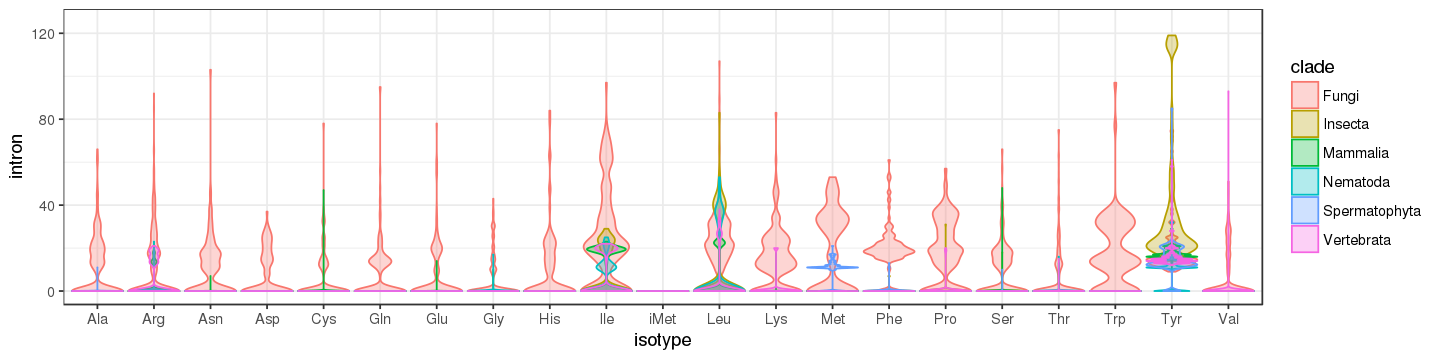

In [132]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% filter(!restrict) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, color = clade, fill = clade), alpha = 0.3, scale = 'width', adjust = 0.5, position = 'identity') + ylim(0, 125)

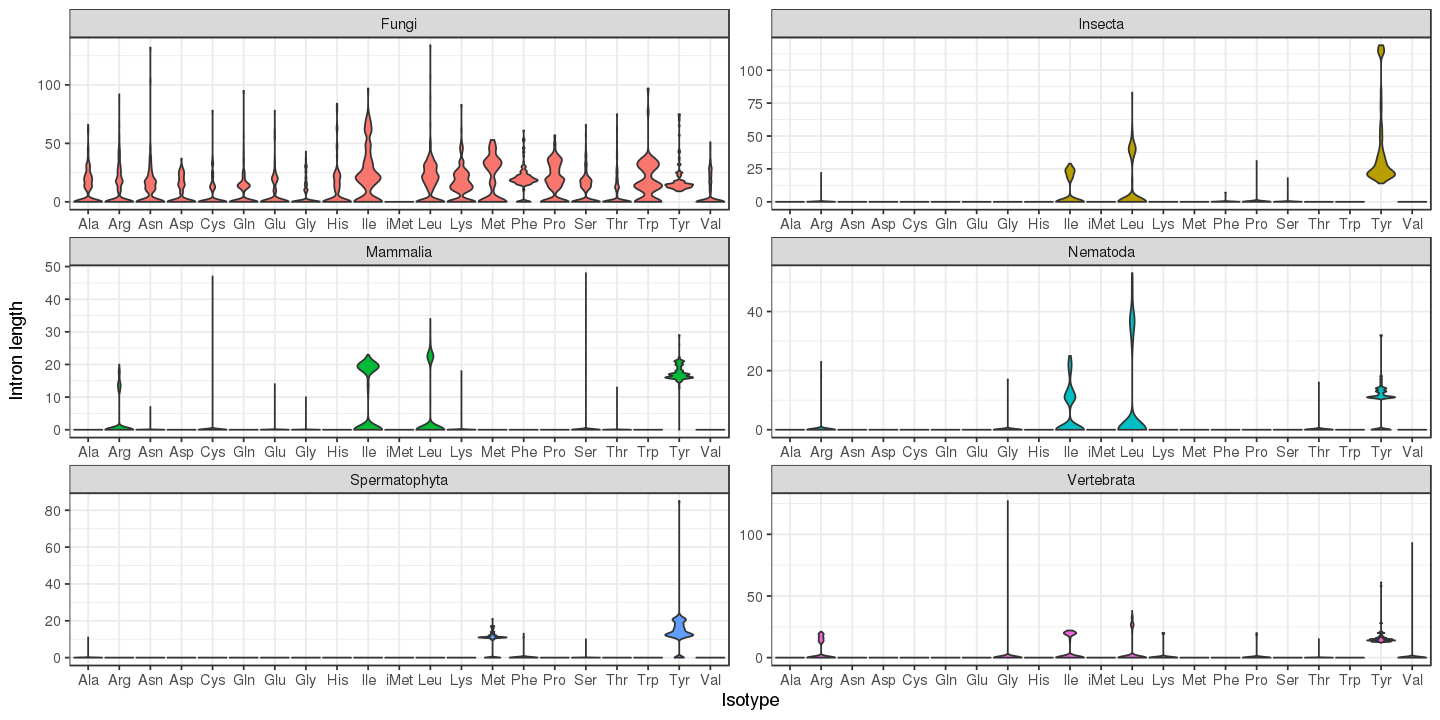

In [138]:
options(repr.plot.width=12, repr.plot.height=6)
identities %>% filter(!restrict, intron < 150) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, fill = clade), scale = 'width', adjust = 0.5) +
    facet_wrap(~ clade, ncol = 2, scales = "free") + 
    theme(legend.position = "none") + 
    labs(y = "Intron length", x = "Isotype")

## D-loop insertions

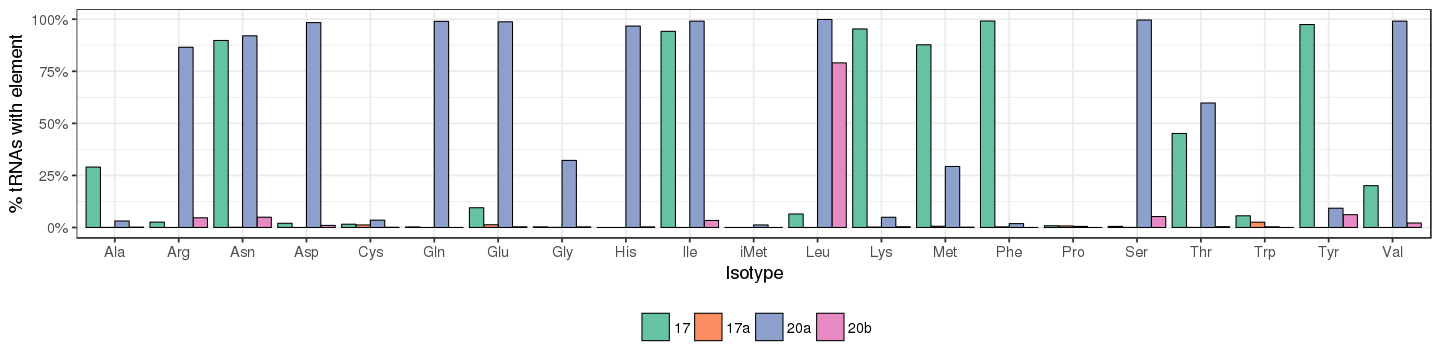

In [16]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% filter(!restrict) %>%
  select(isotype, X17, X17a, X20a, X20b) %>%
  mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17`=mean(X17), `17a`=mean(X17a), `20a`=mean(X20a), `20b`=mean(X20b)) %>%
  melt(id.vars='isotype') %>%
  ggplot() + geom_bar(aes(x=isotype, y=value, fill=variable), stat='identity', color='black', size=0.3, position='dodge') +
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

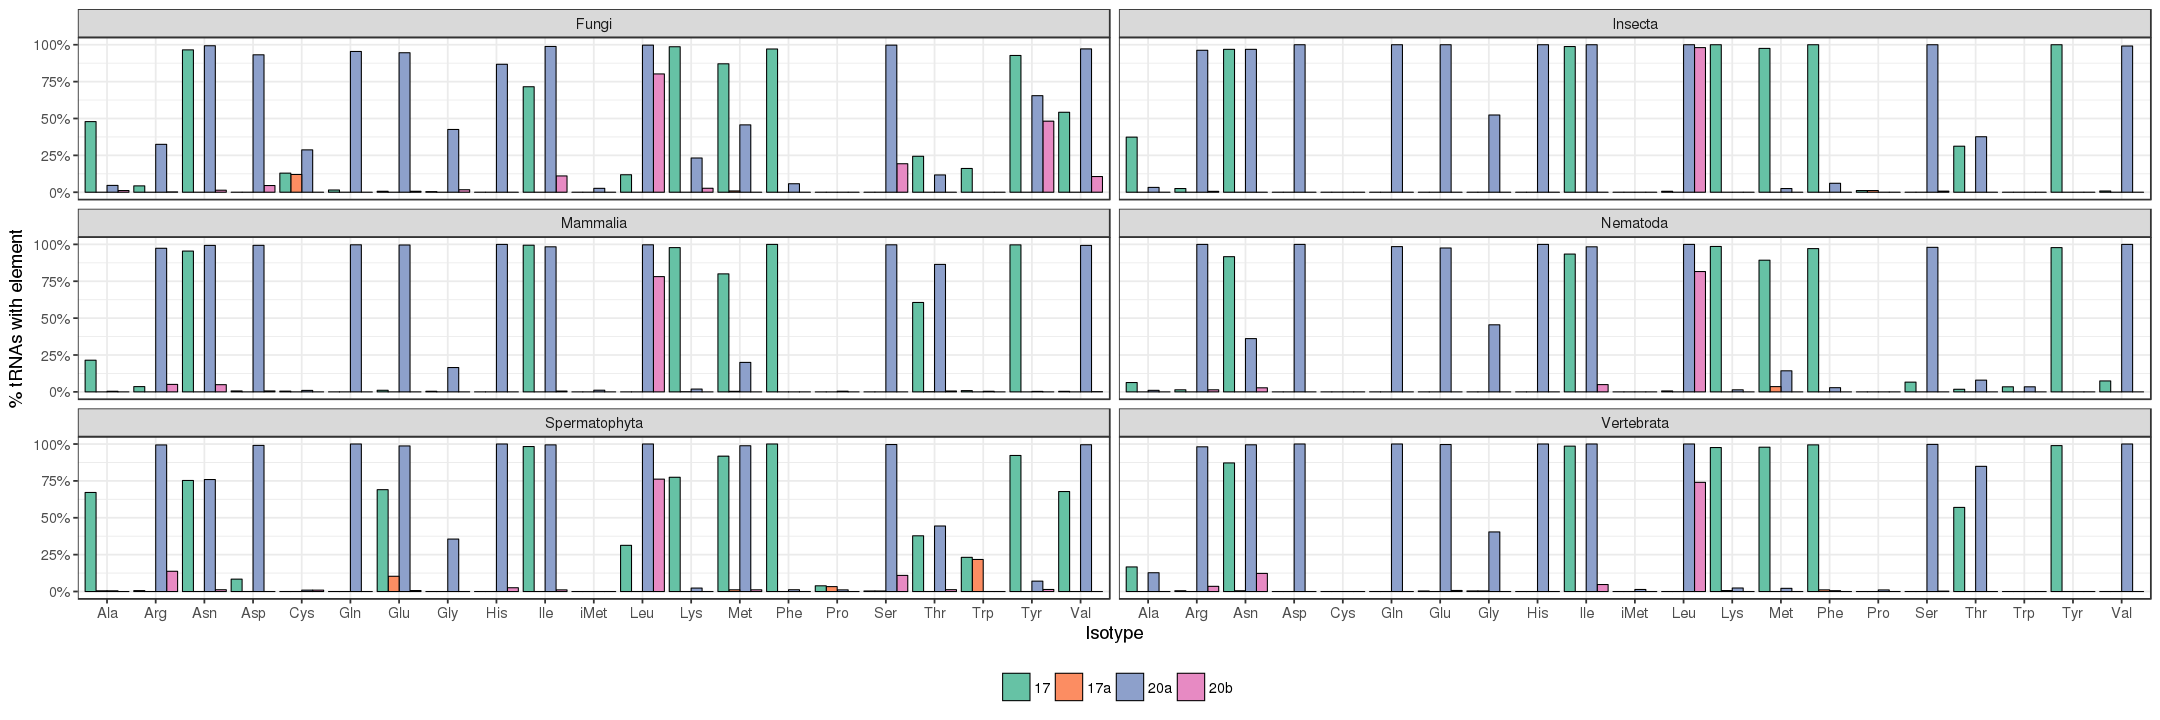

In [17]:
options(repr.plot.width=18, repr.plot.height=6)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17`=mean(X17), `17a`=mean(X17a), `20a`=mean(X20a), `20b`=mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x=isotype, y=freq, fill=position), stat='identity', color='black', size=0.3, position='dodge') +
    facet_wrap(~ clade, ncol = 2) +
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

## 3D interactions

In [18]:
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(isotype='All')) %>%
  gather(positions, identity, -isotype) %>%
  group_by(isotype, positions) %>%
  mutate(freq=n()) %>%
  ungroup() %>%
  group_by(isotype, positions, identity, freq) %>%
  summarize(count=n()) %>%
  mutate(freq=count/freq) %>%
  filter(freq > 0.05) %>%
  ungroup() %>%
  mutate(positions=factor(positions)) %>%
  mutate(identity=factor(identity, levels=c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "G:-", "U:-", "C:-"))) %>%
  select(-count)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

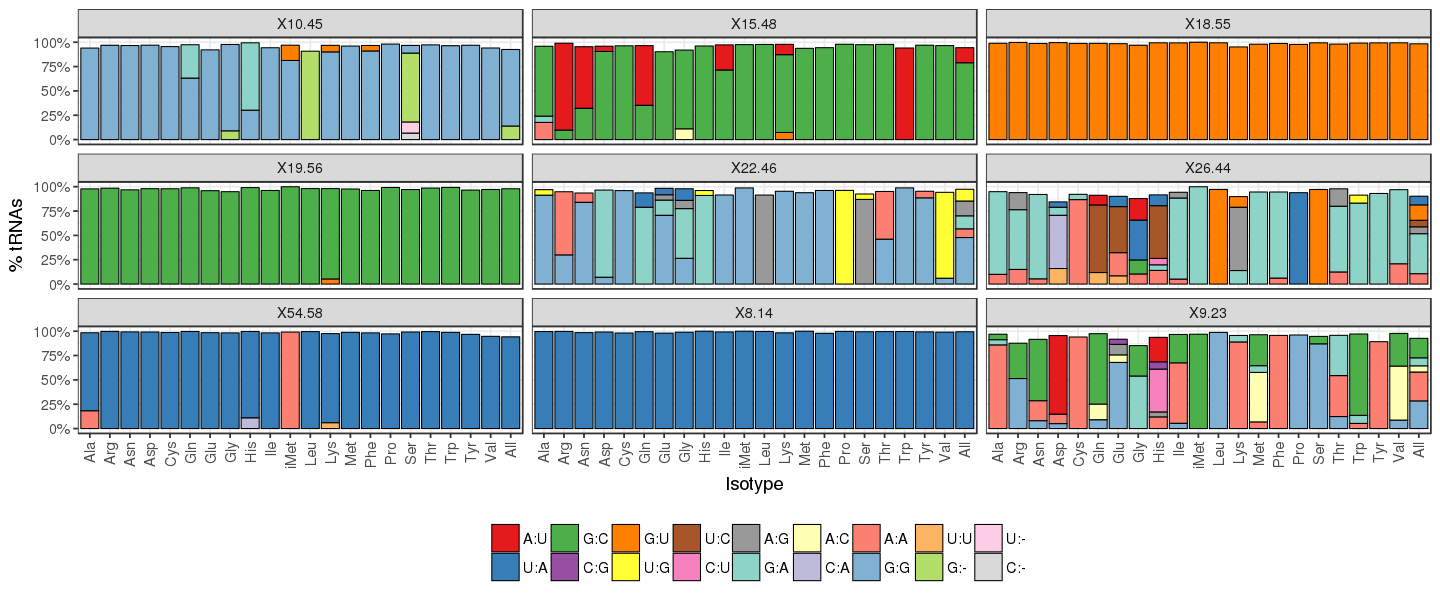

In [19]:
options(repr.plot.width=12, repr.plot.height=5)
tertiary_interactions %>% ggplot() +
  geom_bar(aes(x=isotype, y=freq, fill=identity), color='black', size=0.3, stat='identity') +
  facet_wrap(~ positions, nrow=3) +
  scale_fill_manual(values=c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_y_continuous(labels=percent_format()) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
  guides(fill=guide_legend(title=NULL, nrow=2))

### N1/N73

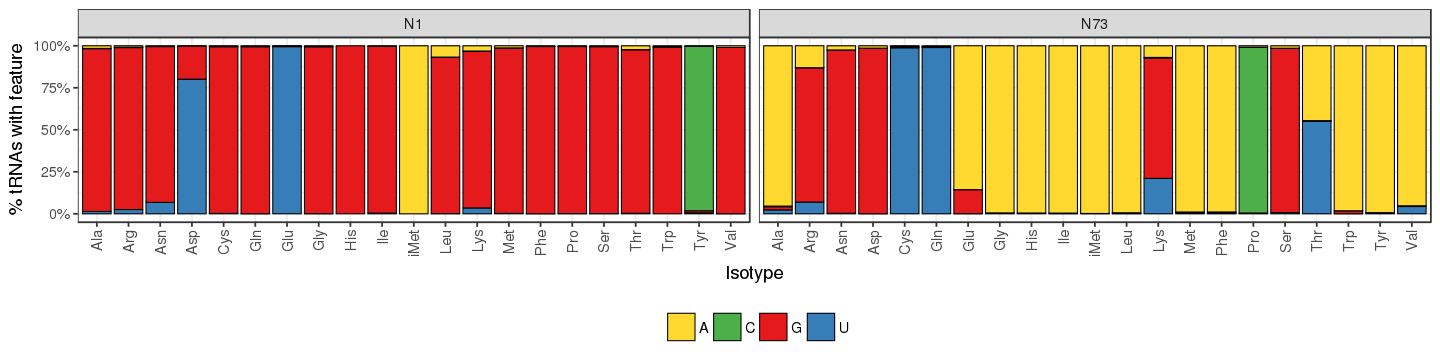

In [20]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% select(isotype, X1, X73)%>%
  gather(position, identity, X1, X73) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(isotype, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ position) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

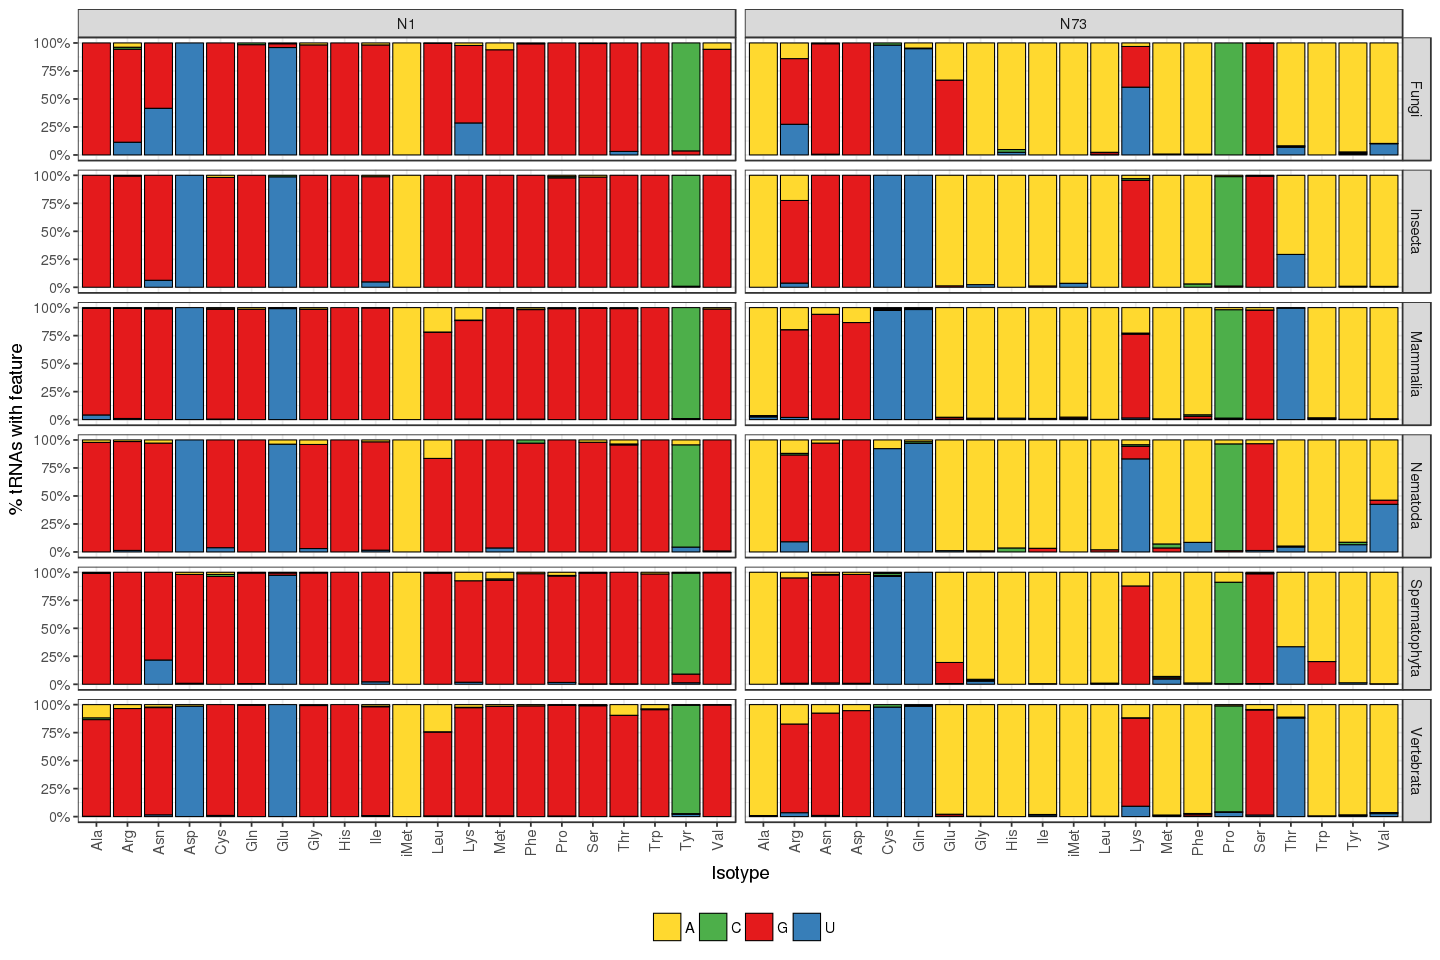

In [21]:
options(repr.plot.width=12, repr.plot.height=8)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_grid(clade ~ position, scales = 'free') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

### Anticodon incidence

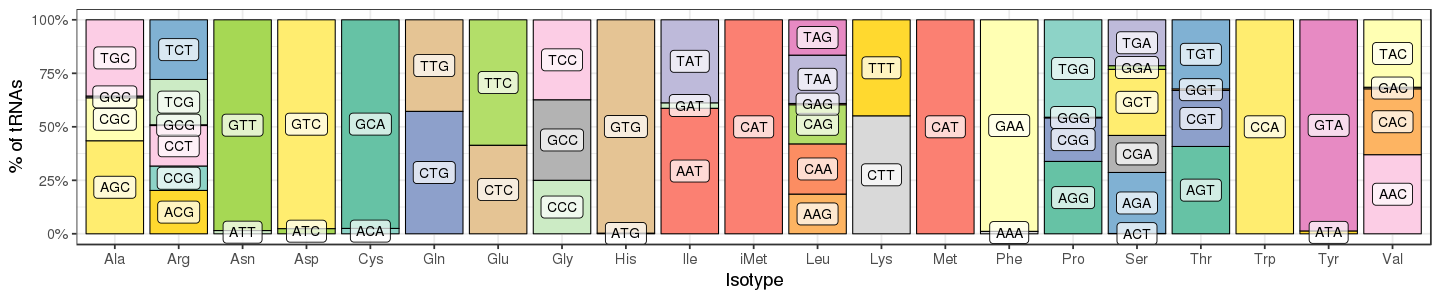

In [87]:
options(repr.plot.width=12, repr.plot.height=2.5)
identities %>% 
  filter(!restrict & !(isotype %in% c("Sup", "SeC") | anticodon %in% c('SAG', 'RCT'))) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.001) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

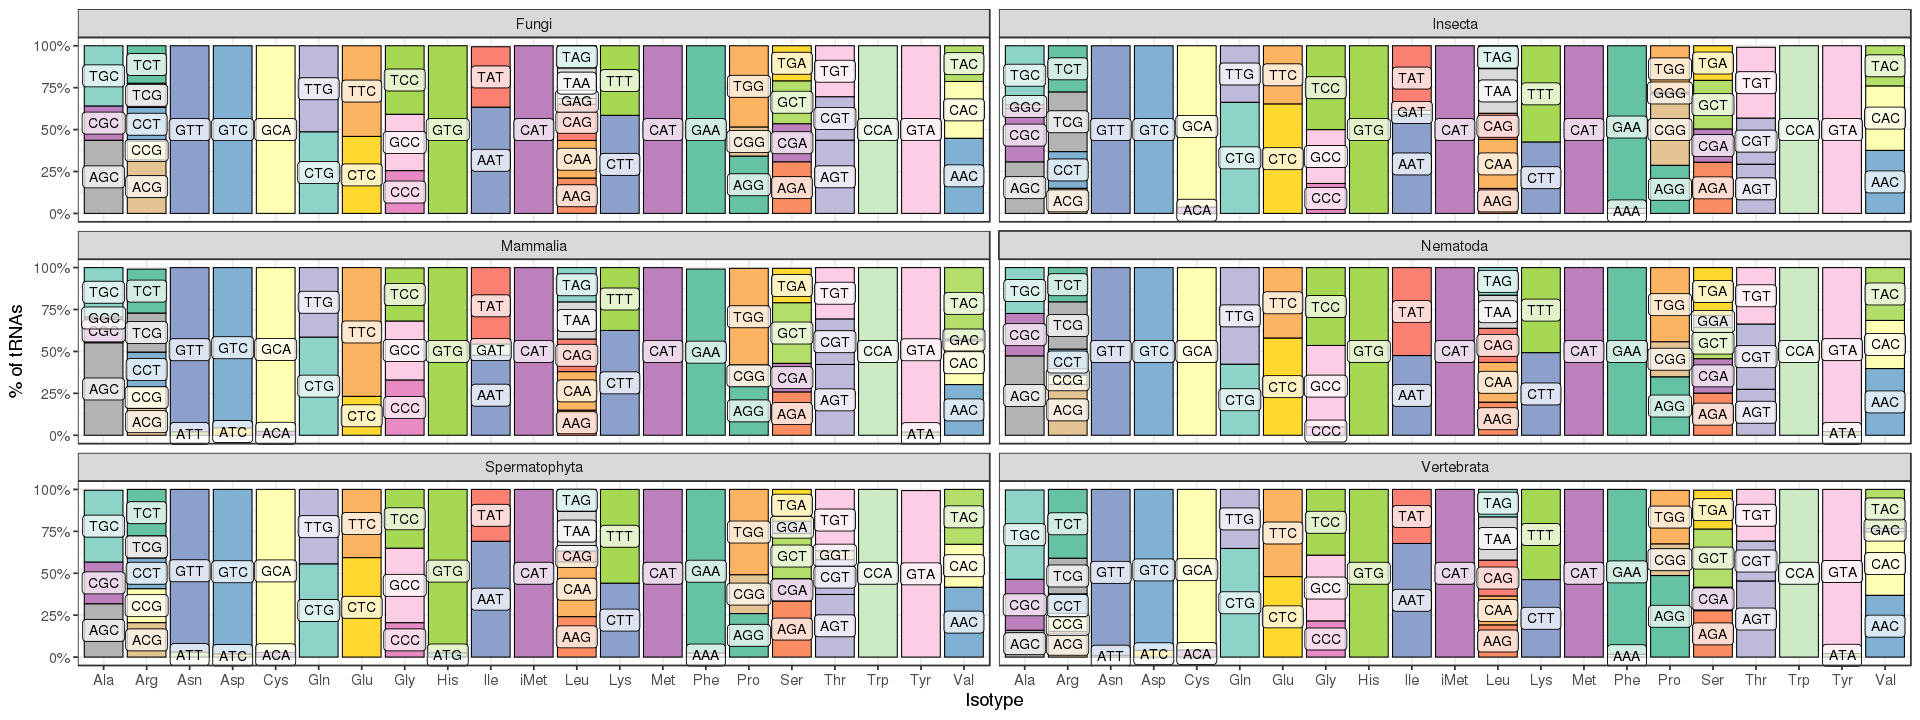

In [88]:
options(repr.plot.width=16, repr.plot.height=6)
identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, ncol = 2) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

## A and B box motifs

Warning message:
“attributes are not identical across measure variables; they will be dropped”

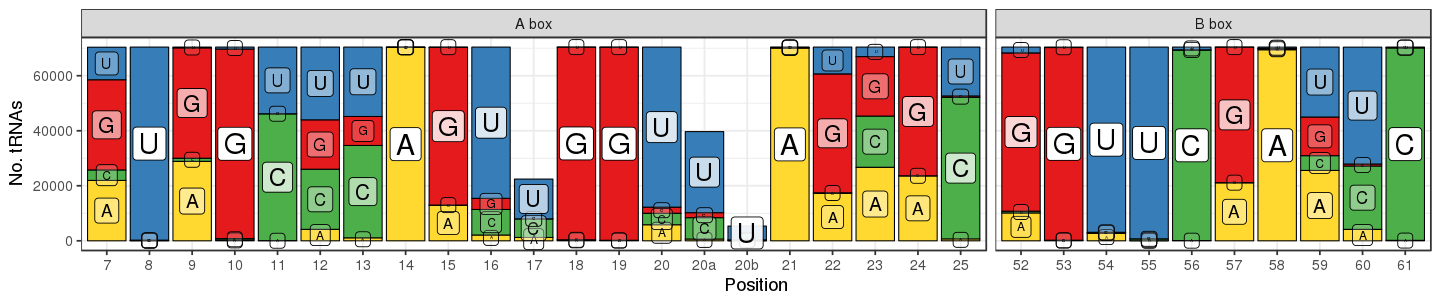

In [24]:
options(repr.plot.width=12, repr.plot.height=2.5)
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
identities %>% 
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  ggplot() + geom_bar(aes(x = Position, y = Count, fill = Identity), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = Position, y = Count, label = Identity, size = freq, alpha = freq), position = position_stack(vjust = 0.5, reverse = FALSE)) +
    scale_x_discrete(labels = ab_positions) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    theme(legend.position='none') +
    labs(fill = '', y = 'No. tRNAs')         

Warning message:
“attributes are not identical across measure variables; they will be dropped”

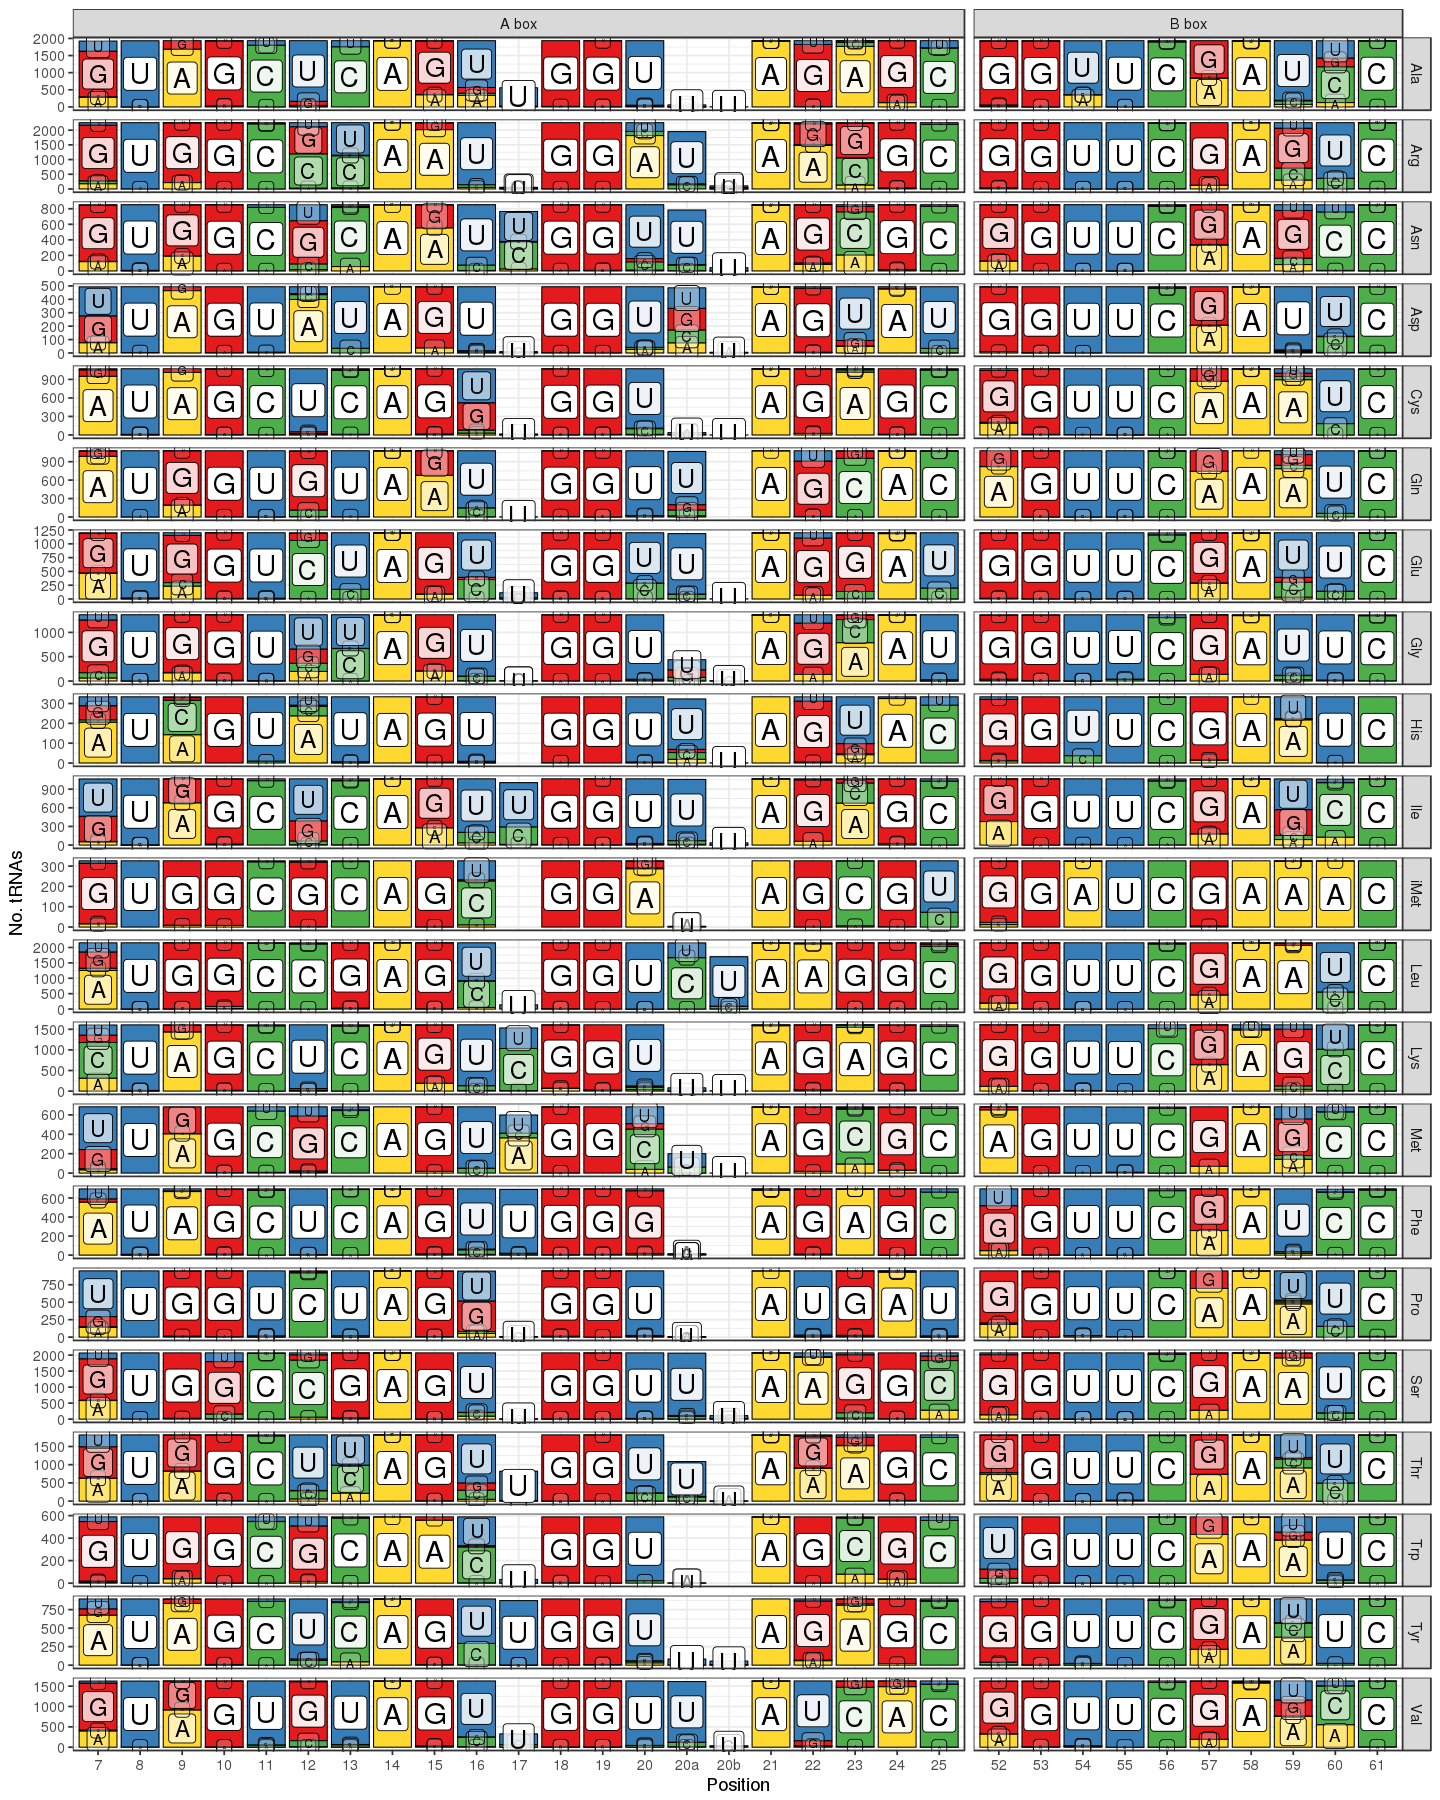

In [25]:
options(repr.plot.width=12, repr.plot.height=15)
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
identities %>% filter(!restrict) %>%
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity, isotype) %>%
  summarize(Count = n()) %>%
  group_by(Position, isotype) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  ggplot() + geom_bar(aes(x = Position, y = Count, fill = Identity), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = Position, y = Count, label = Identity, size = freq, alpha = freq), position = position_stack(vjust = 0.5, reverse = FALSE)) +
    scale_x_discrete(labels = ab_positions) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(isotype ~ feature, scales = 'free', space = 'free_x') +
    theme(legend.position='none') +
    labs(fill = '', y = 'No. tRNAs')         

In [26]:
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
df = identities %>% 
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax))))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

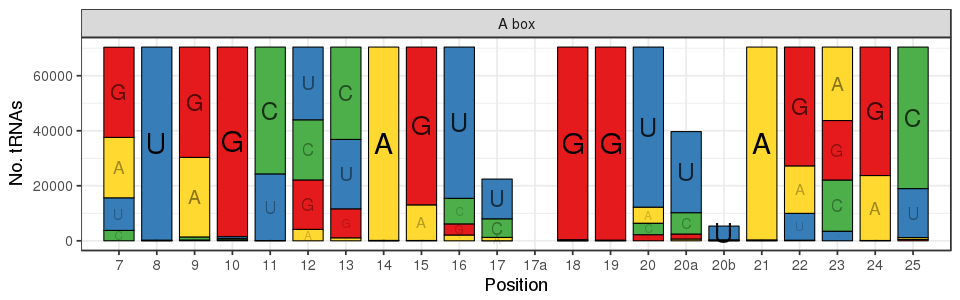

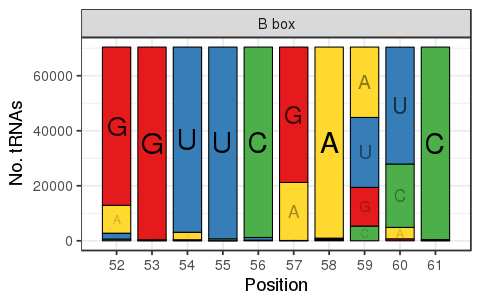

In [27]:
options(repr.plot.width=8, repr.plot.height=2.5)
df %>% filter(feature == "A box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 1:22, labels = c('7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '22', '23', '24', '25')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=4, repr.plot.height=2.5)
df %>% filter(feature == "B box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 23:32, labels = c('52', '53', '54', '55', '56', '57', '58', '59', '60', '61')) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

# Identity stories

## 18:55

In [28]:
identities %>% select(clade, isotype, anticodon) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, anticodon) %>%
  summarize(count=n())

identities %>% select(clade, isotype, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, X47) %>%
  summarize(count=n()) %>%
  spread(X47, count)

identities %>% select(clade, species, species_long, seqname, isotype, score, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi" & X47 == "-")

clade isotype anticodon count
1 Fungi     Pro       AGG   228
2 Fungi     Pro       CGG    35
3 Fungi     Pro       TGG   256

clade isotype -   C   U
1 Fungi     Pro 2 193 324

clade            species                            species_long
1 Fungi enceHell_ATCC50504       Encephalitozoon hellem ATCC 50504
2 Fungi enceInte_ATCC50506 Encephalitozoon intestinalis ATCC 50506
                               seqname isotype score X47
1 enceHell_ATCC50504_chrX.trna2-ProCGG     Pro  60.7   -
2 enceInte_ATCC50506_chrX.trna2-ProCGG     Pro  63.4   -

## 11:24

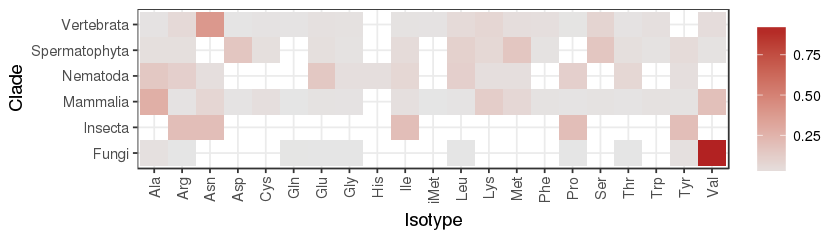

In [29]:
options(repr.plot.width=7, repr.plot.height=2)
identities %>% select(clade, isotype, X11.24) %>%
  filter(!(X11.24 %in% c("C:G", "U:A"))) %>%
  group_by(clade, isotype) %>%
  summarize(count = n()) %>%
  group_by(clade) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_tile(aes(x = isotype, y = clade, fill = freq)) +
    scale_fill_continuous(low = 'gray90', high = 'firebrick') +
    labs(x = 'Isotype', y = 'Clade', fill = '') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))

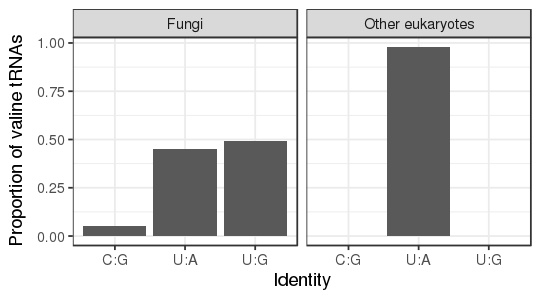

In [30]:
options(repr.plot.width=4.5, repr.plot.height=2.5)
identities %>% select(clade, isotype, X11.24) %>%
  filter(isotype == "Val") %>%
  mutate(clade=ifelse(clade == "Fungi", "Fungi", "Other eukaryotes")) %>%
  group_by(clade) %>%
  mutate(total=n()) %>%
  group_by(clade, total, X11.24) %>%
  summarize(count=n()) %>%
  mutate(freq=count/total) %>%
  filter(freq >= 0.01) %>%
  ggplot() + geom_bar(aes(x = X11.24, y = freq), stat = 'identity') + 
    labs(x = 'Identity', y = 'Proportion of valine tRNAs') + facet_wrap(~ clade)